# Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries for Feature Variance
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

In [4]:
# Import Libraries for PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# Import Libraries for MCA
import prince

In [6]:
# Import Libraries for Elbow Score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from scipy.spatial.distance import cdist

In [7]:
# Import Libraries for Silhouette Score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [8]:
# Import plotly for Clustering
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import seaborn as sns

In [9]:
# We read in the preprocessed csv's into a dataframe
df = pd.read_csv('df.csv')
df_employed = pd.read_csv('df_employed.csv')
df_employed_condition = pd.read_csv('df_employed_condition.csv')
df_self_employed_condition = pd.read_csv('df_self_employed_condition.csv')

# DF (All)

# Feature Selection

## Remove Features with Low Variance

In [24]:
# We assign a threshold to the data and fit the df to the threshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [25]:
# We check the columns which fullfill the criteria of variance = 0 (True = Not Variance 0, False = Variance 0)
var_thres.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [26]:
# We drop all columns which have the variance 0
df = df.drop([column for column in df.columns if column not in df.columns[var_thres.get_support()]], axis = 1)

In [27]:
df = df.drop(['Unnamed: 0'], axis=1)

In [28]:
df.head()

Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       0   
4                       0   

   How many employees does your company or organization have?  \
0                                                  3            
1                                                  2            
2                                                  2            
3                                                  2            
4                                                  6            

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     
1                                                  0                                                                                     
2                                                  0                                                                                     
3                                                  0                                                                                     
4                                                  1                                                                                     

   Do you know local or online resources to seek help for a mental health disorder?  \
0                                                  0                                  
1                                                  0                                  
2                                                  0                                  
3                                                  0                                  
4                                                  0                                  

   Do you have previous employers?  \
0                                1   
1                                1   
2                                1   
3                                1   
4                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  0                                           
1                                                  1                                           
2                                                  0                                           
3                                                  0                                           
4                                                  1                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   
1                                                  0                                                                                   
2                                                  0                                                                                   
3                                                  1                                                                                   
4                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              
1                                                  1                                                              
2                                                  1                                                              
3 

In [29]:
with pd.option_context("display.max_columns", None):
    display(df.head(1))

Are you self-employed?  \
0                       0   

   How many employees does your company or organization have?  \
0                                                  3            

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     

   Do you know local or online resources to seek help for a mental health disorder?  \
0                                                  0                                  

   Do you have previous employers?  \
0                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  0                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              

   Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
0                                                  1                                                                 

   Do you think that discussing a physical health issue with previous employers would have negative consequences?  \
0                                                  0                                                                

   Would you have been willing to discuss a mental health issue with your previous co-workers?  \
0                                                  1                                             

   Would you have been willing to discuss a mental health issue with your direct supervisor(s)  \
0                                                  1                                             

   Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?  \
0                                                  0                                                                        

   Would you bring up a mental health issue with a potential employer in an interview?  \
0                                                  0                                     

   How willing would you be to share with friends and family that you have a mental illness?  \
0                                                  3                                           

   Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?  \
0                                                  0                                                                                            

   Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?  \
0                                                  0                                                                                                                                  

   Do you have a family history of mental illness?  \
0                                                0   

   Have you had a mental health disorder in the past?  \
0                                                  0    

   Do you currently have a mental health disorder?  \
0                                                0   

   Have you been diagnosed with a mental health condition by a medical professional?  \
0                

# Renaming of Columns

In [30]:
with pd.option_context("display.max_columns", None):
    display(df.head(1))

Are you self-employed?  \
0                       0   

   How many employees does your company or organization have?  \
0                                                  3            

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     

   Do you know local or online resources to seek help for a mental health disorder?  \
0                                                  0                                  

   Do you have previous employers?  \
0                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  0                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              

   Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
0                                                  1                                                                 

   Do you think that discussing a physical health issue with previous employers would have negative consequences?  \
0                                                  0                                                                

   Would you have been willing to discuss a mental health issue with your previous co-workers?  \
0                                                  1                                             

   Would you have been willing to discuss a mental health issue with your direct supervisor(s)  \
0                                                  1                                             

   Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?  \
0                                                  0                                                                        

   Would you bring up a mental health issue with a potential employer in an interview?  \
0                                                  0                                     

   How willing would you be to share with friends and family that you have a mental illness?  \
0                                                  3                                           

   Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?  \
0                                                  0                                                                                            

   Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?  \
0                                                  0                                                                                                                                  

   Do you have a family history of mental illness?  \
0                                                0   

   Have you had a mental health disorder in the past?  \
0                                                  0    

   Do you currently have a mental health disorder?  \
0                                                0   

   Have you been diagnosed with a mental health condition by a medical professional?  \
0                

In [31]:
# Column rename
old_names = df.columns
renamed_columns = ['self_employed', 'number_of_employees', 'company_mental_health_observation_co','mental_health_online_resources',  
                   'previous_companies', 'previous_companies_mental_health_benefits_awareness','previous_companies_mental_health_discussion', 
                   'previous_companies_mental_health_resources', 'previous_companies_mental_health_discussion_negative_impact', 
                   'previous_companies_physical_health_discussion_negative_impact',
                  'previous_companies_mental_coworkers_health_discussion', 'previous_companies_mental_supervisor_health_discussion', 
                'previous_company_mental_health_coworker_discussion_negative_impact','future_company_mental_health_interview',
                  'mental_health_reveal_family&friends', 'company_mental_health_bad_response_experienced', 
                   'company_mental_health_bad_response_experienced_others', 'mental_health_family_history',
                  'mental_health_disorder_past', 'mental_health_disorder_current',
                   'mental_health_disorder_diagnosis', 'mental_health_proffesional_treatment','age', 'remote_work', 'back_end_developer',
                   'front_end_developer', 'dev_ops_sys_admin', 'dev_evangelist_advocate', 'work_america',
                   'live_america', 'mental_condition_believed', 'male', 'female','other', 'mental_condition']
    
df.columns = renamed_columns

In [32]:
with pd.option_context("display.max_columns", None):
    display(df.head(1))

self_employed  number_of_employees  company_mental_health_observation_co  \
0              0                    3                                     0   

   mental_health_online_resources  previous_companies  \
0                               0                   1   

   previous_companies_mental_health_benefits_awareness  \
0                                                  0     

   previous_companies_mental_health_discussion  \
0                                            0   

   previous_companies_mental_health_resources  \
0                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
0                                                  1             

   previous_companies_physical_health_discussion_negative_impact  \
0                                                  0               

   previous_companies_mental_coworkers_health_discussion  \
0                                                  1       

   previous_companies_mental_supervisor_health_discussion  \
0                                                  1        

   previous_company_mental_health_coworker_discussion_negative_impact  \
0                                                  0                    

   future_company_mental_health_interview  \
0                                       0   

   mental_health_reveal_family&friends  \
0                                    3   

   company_mental_health_bad_response_experienced  \
0                                               0   

   company_mental_health_bad_response_experienced_others  \
0                                                  0       

   mental_health_family_history  mental_health_disorder_past  \
0                             0                            0   

   mental_health_disorder_current  mental_health_disorder_diagnosis  \
0                               0                                 1   

   mental_health_proffesional_treatment   age  remote_work  \
0                                     0  39.0            1   

   back_end_developer  front_end_developer  dev_ops_sys_admin  \
0                   1                    0                  0   

   dev_evangelist_advocate  work_america  live_america  \
0                        0             0             0   

   mental_condition_believed  male  female  other  mental_condition  
0                          0     1       0      0                 1

# Dimensionality Reduction

## PCA

### Believed and Diagnosed Mental Condition

In [33]:
# We split the dataframe into an X and y component
X = df.drop('mental_condition', axis=1)
y = df['mental_condition']
X.head()

self_employed  number_of_employees  company_mental_health_observation_co  \
0              0                    3                                     0   
1              0                    2                                     0   
2              0                    2                                     0   
3              0                    2                                     0   
4              0                    6                                     1   

   mental_health_online_resources  previous_companies  \
0                               0                   1   
1                               0                   1   
2                               0                   1   
3                               0                   1   
4                               0                   1   

   previous_companies_mental_health_benefits_awareness  \
0                                                  0     
1                                                  1     
2                                                  0     
3                                                  0     
4                                                  1     

   previous_companies_mental_health_discussion  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

   previous_companies_mental_health_resources  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
0                                                  1             
1                                                  0             
2                                                  1             
3                                                  1             
4                                                  1             

   previous_companies_physical_health_discussion_negative_impact  ...  \
0                                                  0              ...   
1                                                  0              ...   
2                                                  1              ...   
3                                                  1              ...   
4                                                  1              ...   

   back_end_developer  front_end_developer  dev_ops_sys_admin  \
0                   1                    0                  0   
1                   1                    1                  0   
2                   1                    0                  0   
3                   1                    1                  1   
4                   1                    1                  1   

   dev_evangelist_advocate  work_america  live_america  \
0                        0             0             0   
1                        0             1             1   
2                        0             0             0   
3                        1             1             1   
4                        0             0             0   

   mental_condition_believed  male  female  other  
0                          0     1       0      0  
1                          0     1       0      0  
2                          0     1       0      0  
3                          0     0       1      0  
4                          0     1       0      0  

[5 rows x 34 columns]

In [34]:
# We standardize the variables
X_std = StandardScaler().fit_transform(X)

In [35]:
pca = PCA().fit(X_std)

In [36]:
var_exp = pca.explained_variance_ratio_

In [37]:
print(var_exp)

[1.27170424e-01 8.31443817e-02 6.78944029e-02 6.71114660e-02
 5.74607681e-02 4.81825481e-02 4.48168632e-02 4.17450625e-02
 3.56122160e-02 3.40233271e-02 3.29491757e-02 3.04742898e-02
 2.90647458e-02 2.71031932e-02 2.54564242e-02 2.49227194e-02
 2.43200481e-02 2.36740255e-02 2.23817903e-02 2.04998784e-02
 1.91355424e-02 1.85099902e-02 1.62473723e-02 1.41312956e-02
 1.39823762e-02 1.28630938e-02 1.02899357e-02 9.77481369e-03
 7.50225596e-03 4.00860440e-03 3.61544306e-03 1.26739741e-03
 6.64129274e-04 3.62118014e-32]


In [38]:
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[0.12717042 0.21031481 0.27820921 0.34532067 0.40278144 0.45096399
 0.49578085 0.53752592 0.57313813 0.60716146 0.64011064 0.67058492
 0.69964967 0.72675286 0.75220929 0.77713201 0.80145206 0.82512608
 0.84750787 0.86800775 0.88714329 0.90565328 0.92190065 0.93603195
 0.95001433 0.96287742 0.97316736 0.98294217 0.99044443 0.99445303
 0.99806847 0.99933587 1.         1.        ]


In [39]:
eig_vecs = pca.components_

In [40]:
Y = PCA(n_components=2).fit(X_std).transform(X_std)

Text(0, 0.5, 'Second Principal Component')

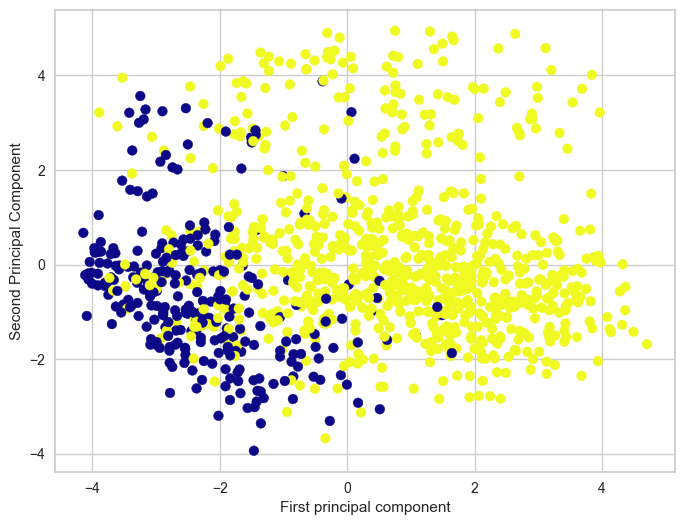

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(Y[:,0],Y[:,1],c=df['mental_condition'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

### Only Diagnosed Mental Condition

In [42]:
X = df
X.head()

self_employed  number_of_employees  company_mental_health_observation_co  \
0              0                    3                                     0   
1              0                    2                                     0   
2              0                    2                                     0   
3              0                    2                                     0   
4              0                    6                                     1   

   mental_health_online_resources  previous_companies  \
0                               0                   1   
1                               0                   1   
2                               0                   1   
3                               0                   1   
4                               0                   1   

   previous_companies_mental_health_benefits_awareness  \
0                                                  0     
1                                                  1     
2                                                  0     
3                                                  0     
4                                                  1     

   previous_companies_mental_health_discussion  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

   previous_companies_mental_health_resources  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
0                                                  1             
1                                                  0             
2                                                  1             
3                                                  1             
4                                                  1             

   previous_companies_physical_health_discussion_negative_impact  ...  \
0                                                  0              ...   
1                                                  0              ...   
2                                                  1              ...   
3                                                  1              ...   
4                                                  1              ...   

   front_end_developer  dev_ops_sys_admin  dev_evangelist_advocate  \
0                    0                  0                        0   
1                    1                  0                        0   
2                    0                  0                        0   
3                    1                  1                        1   
4                    1                  1                        0   

   work_america  live_america  mental_condition_believed  male  female  other  \
0             0             0                          0     1       0      0   
1             1             1                          0     1       0      0   
2             0             0                          0     1       0      0   
3             1             1                          0     0       1      0   
4             0             0                          0     1       0      0   

   mental_condition  
0                 1  
1                 1  
2                 0  
3                 1  
4                 0  

[5 rows x 35 columns]

In [43]:
# We standardize the variables
X_std = StandardScaler().fit_transform(X)

In [44]:
pca = PCA().fit(X_std)

In [45]:
print(pca)

PCA()


In [46]:
var_exp = pca.explained_variance_ratio_

In [47]:
print(var_exp)

[1.36866428e-01 8.21585727e-02 6.70699239e-02 6.59349033e-02
 5.68104485e-02 4.68546655e-02 4.35393993e-02 4.05770419e-02
 3.45947254e-02 3.30517786e-02 3.20201665e-02 3.05460500e-02
 2.85602285e-02 2.71165029e-02 2.53139200e-02 2.47283188e-02
 2.36695985e-02 2.32774510e-02 2.19267639e-02 1.99938618e-02
 1.85991602e-02 1.80057490e-02 1.57833119e-02 1.37327487e-02
 1.35832019e-02 1.26344620e-02 9.99680252e-03 9.49868085e-03
 8.92854578e-03 5.72201455e-03 3.55768249e-03 3.48717609e-03
 1.21642764e-03 6.43287644e-04 3.58827166e-32]


In [48]:
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[0.13686643 0.219025   0.28609492 0.35202983 0.40884028 0.45569494
 0.49923434 0.53981138 0.57440611 0.60745789 0.63947805 0.6700241
 0.69858433 0.72570083 0.75101475 0.77574307 0.79941267 0.82269012
 0.84461689 0.86461075 0.88320991 0.90121566 0.91699897 0.93073172
 0.94431492 0.95694938 0.96694618 0.97644487 0.98537341 0.99109543
 0.99465311 0.99814028 0.99935671 1.         1.        ]


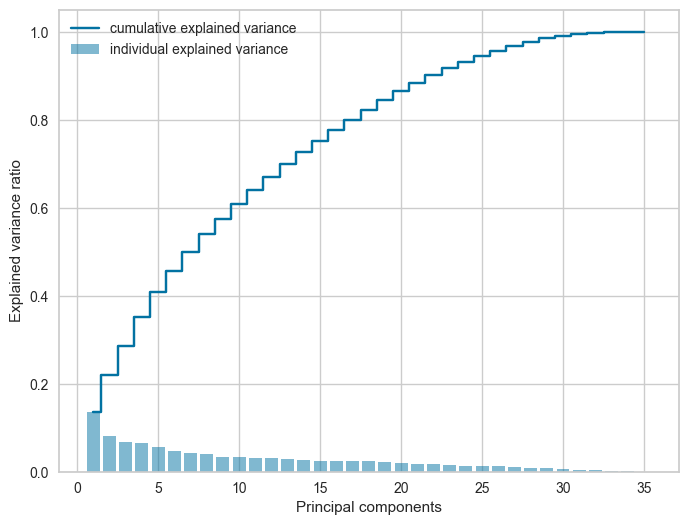

In [49]:
# We plot the cumulative variance
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [50]:
eig_vecs = pca.components_

In [51]:
Y = PCA(n_components=2).fit(X_std).transform(X_std)

In [52]:
print(Y)

[[ 2.49133146  0.21768049]
 [-1.50212291 -1.40276269]
 [ 2.00077984  0.43610052]
 ...
 [ 0.05986227  0.10111477]
 [-3.24892456 -0.69662103]
 [-1.95912373 -0.64509967]]


In [53]:
X_std.shape

(1106, 35)

In [54]:
Y[:,0]

array([ 2.49133146, -1.50212291,  2.00077984, ...,  0.05986227,
       -3.24892456, -1.95912373])

Text(0, 0.5, 'Second Principal Component')

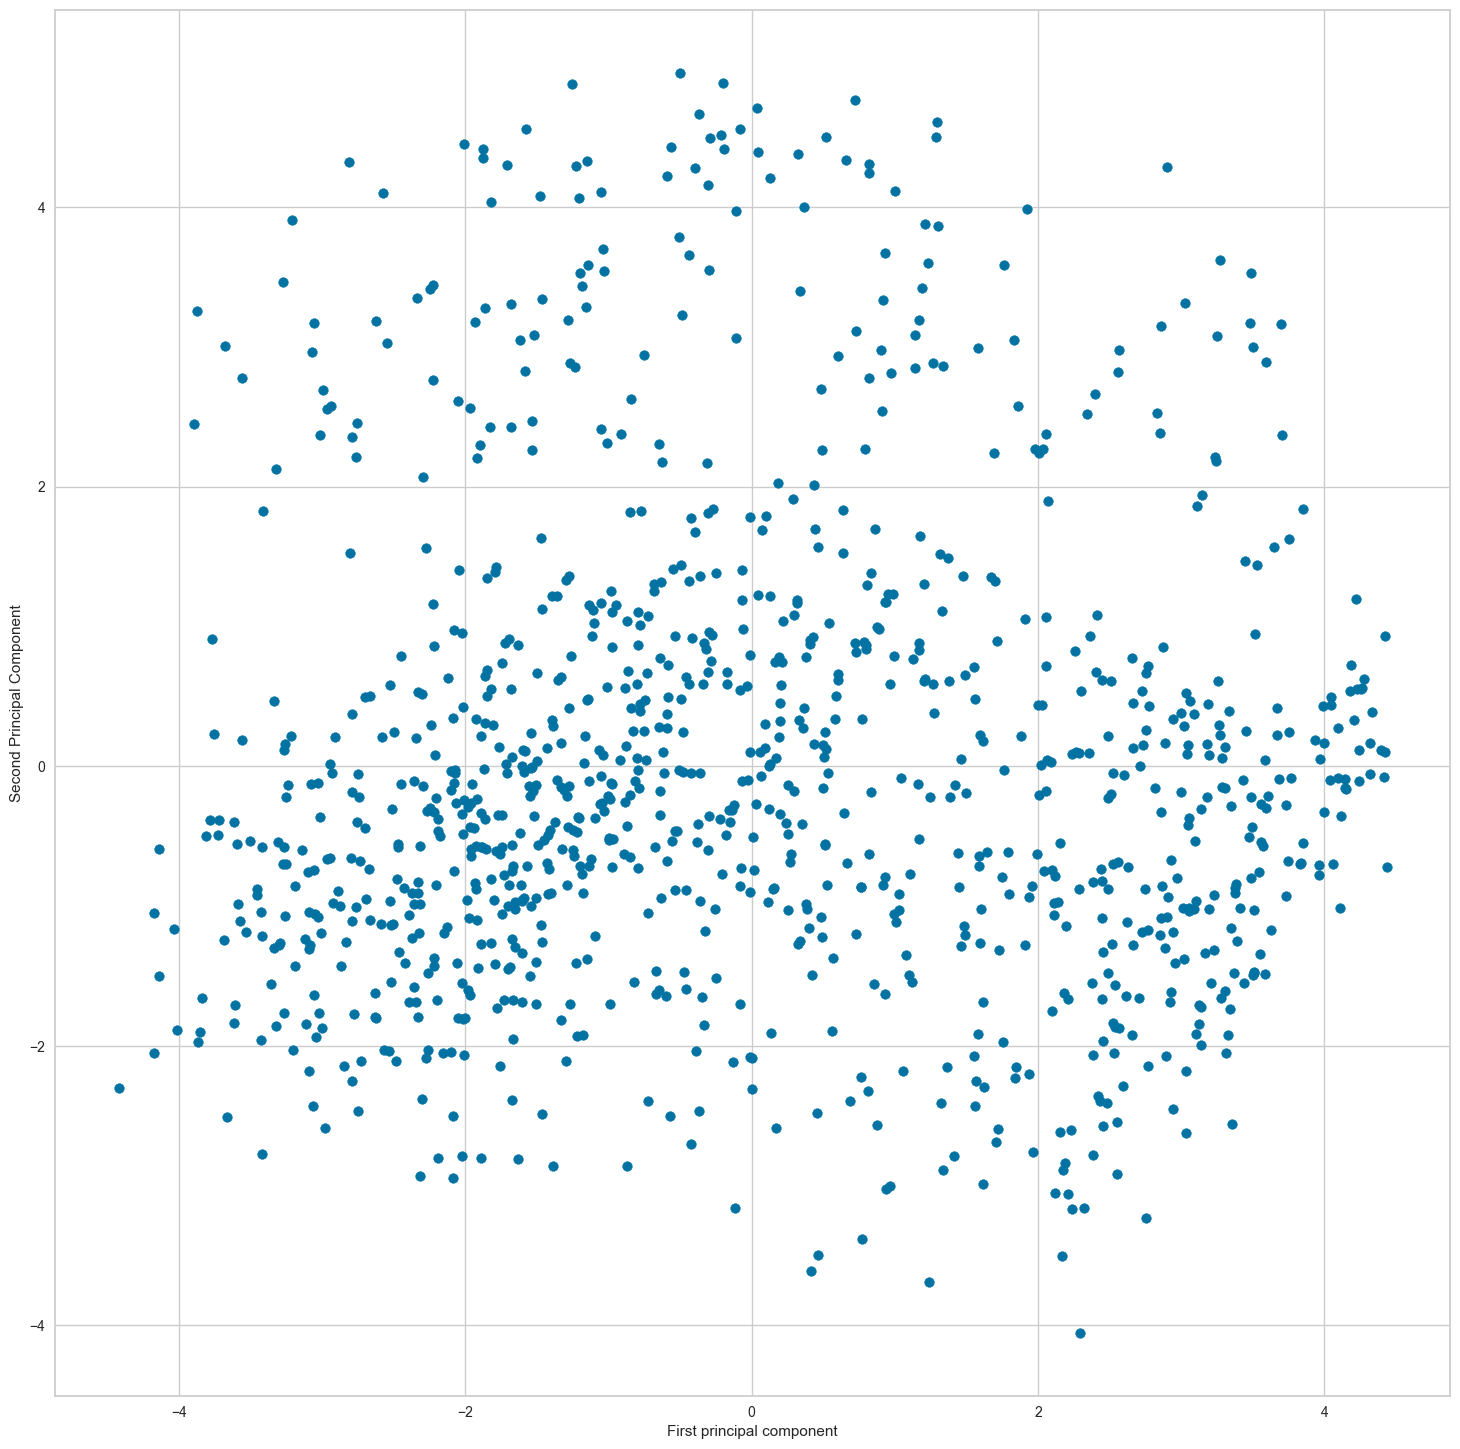

In [55]:
plt.figure(figsize=(18,18))
plt.scatter(Y[:,0],Y[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

## MCA

### Only Diagnosed Mental Condition

In [56]:
# We load the dataframe into X
X = df
X.head()

self_employed  number_of_employees  company_mental_health_observation_co  \
0              0                    3                                     0   
1              0                    2                                     0   
2              0                    2                                     0   
3              0                    2                                     0   
4              0                    6                                     1   

   mental_health_online_resources  previous_companies  \
0                               0                   1   
1                               0                   1   
2                               0                   1   
3                               0                   1   
4                               0                   1   

   previous_companies_mental_health_benefits_awareness  \
0                                                  0     
1                                                  1     
2                                                  0     
3                                                  0     
4                                                  1     

   previous_companies_mental_health_discussion  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

   previous_companies_mental_health_resources  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
0                                                  1             
1                                                  0             
2                                                  1             
3                                                  1             
4                                                  1             

   previous_companies_physical_health_discussion_negative_impact  ...  \
0                                                  0              ...   
1                                                  0              ...   
2                                                  1              ...   
3                                                  1              ...   
4                                                  1              ...   

   front_end_developer  dev_ops_sys_admin  dev_evangelist_advocate  \
0                    0                  0                        0   
1                    1                  0                        0   
2                    0                  0                        0   
3                    1                  1                        1   
4                    1                  1                        0   

   work_america  live_america  mental_condition_believed  male  female  other  \
0             0             0                          0     1       0      0   
1             1             1                          0     1       0      0   
2             0             0                          0     1       0      0   
3             1             1                          0     0       1      0   
4             0             0                          0     1       0      0   

   mental_condition  
0                 1  
1                 1  
2                 0  
3                 1  
4                 0  

[5 rows x 35 columns]

In [57]:
# We create a variable from the MCA class
mca = prince.MCA(n_components=35).fit(X)

In [58]:
mca.eigenvalues_

[0.041183493287342575,
 0.0397208865449985,
 0.026404893781204808,
 0.024369857123539628,
 0.021594731536369705,
 0.01879500136121238,
 0.018325774111630895,
 0.016757998579076547,
 0.015081716263229725,
 0.014240149983657325,
 0.013686736389842512,
 0.012770582521881518,
 0.0121420041153861,
 0.010241153278006728,
 0.0094051705457958,
 0.008934436542863643,
 0.008506682641059601,
 0.00789434862659843,
 0.006981182272531745,
 0.006507567036509662,
 0.006000869183337142,
 0.005785634488635211,
 0.0047437775178894815,
 0.004374165892535852,
 0.0025999268205458646,
 0.0024679129563695045,
 0.0021060462493214054,
 0.0019159212724187947,
 0.0015213565168650457,
 0.001382954932158862,
 0.0008950154532415766,
 0.0003260475618381641,
 0.0002658460504898369,
 0.0001760704540388234,
 2.0988572391153875e-32]

In [59]:
# We calculate the sum of mca.eigenvalues_
sum(mca.eigenvalues_)

0.36810591189242337

In [60]:
mca.total_inertia_ = sum(mca.eigenvalues_)

In [61]:
mca.total_inertia_

0.36810591189242337

In [62]:
mca.explained_inertia_

[0.11187946717731116,
 0.10790613587484757,
 0.0717317840549148,
 0.06620338423323548,
 0.05866445182950669,
 0.051058678369460965,
 0.0497839711875817,
 0.04552493735545863,
 0.04097113297011448,
 0.03868492605959265,
 0.03718151745914468,
 0.03469268520092022,
 0.032985083159801365,
 0.02782121380598647,
 0.02555017521300881,
 0.024271374770733583,
 0.023109334477479475,
 0.02144586210532121,
 0.018965145755583387,
 0.017678518128259397,
 0.016302017950450245,
 0.01571730934418143,
 0.012886990848644182,
 0.011882900413221764,
 0.007062985778141148,
 0.006704355666775427,
 0.005721305149635533,
 0.005204809840105775,
 0.004132931495296529,
 0.003756948441955537,
 0.0024314074409735077,
 0.0008857438886595482,
 0.0007221998938379689,
 0.00047831465985876065,
 5.701775416551216e-32]

Text(0, 0.5, 'Explained Inertia')

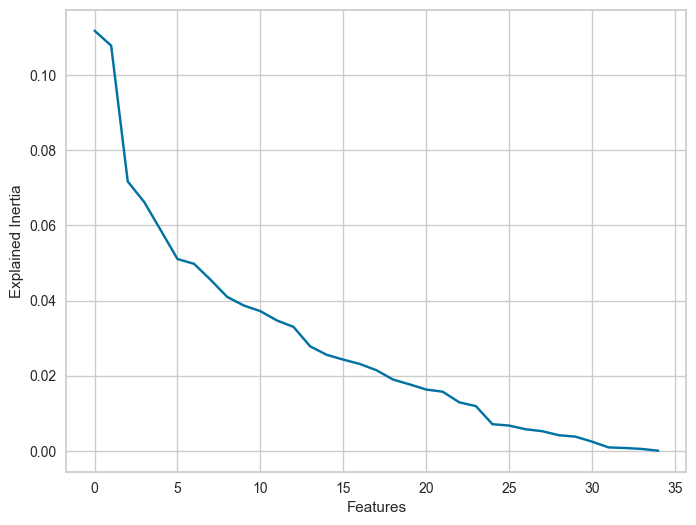

In [63]:
# We plot the mca.explained_intertia_
plt.figure(figsize=(8,6))
plt.plot(mca.explained_inertia_)
plt.xlabel('Features')
plt.ylabel('Explained Inertia')

In [64]:
# We calculate the sum of mca.explained_inertia_ that reaches above the value 0.9
sum(mca.explained_inertia_[0:20]) # We can explain about 90% of our data with 20 features

0.9061097791882625

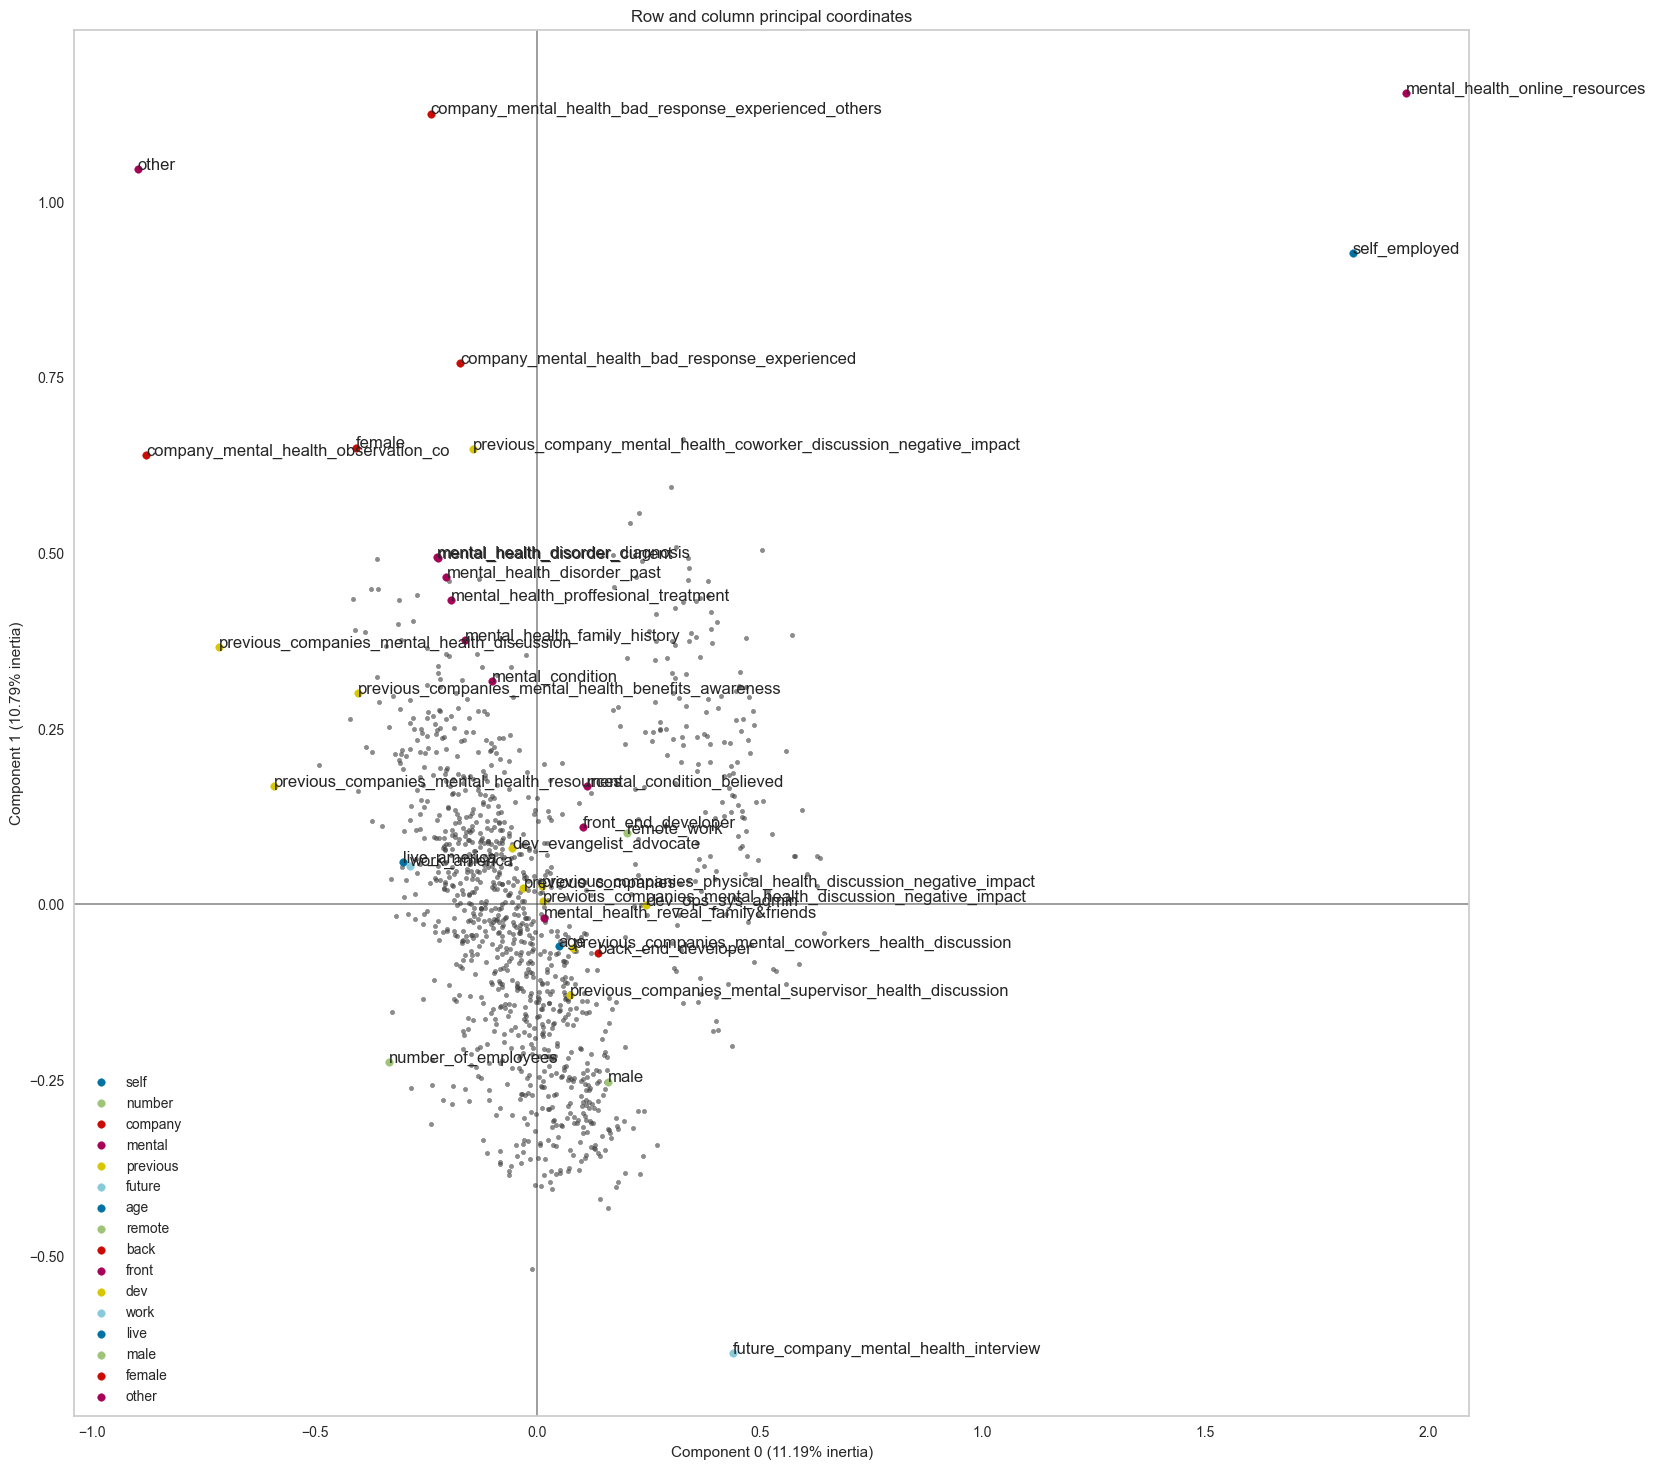

In [65]:
ax = mca.plot_coordinates(X=X,
...     ax=None,
...     figsize=(18, 18),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=True,
...     legend_n_cols=1
... )

In [66]:
# We create a new mca variable from the MCA class with only 20 features
mca = prince.MCA(n_components=20).fit(X)

In [67]:
# We create a new dataframe from the mca variable
df_mca = mca.transform(X)

df_mca.head()

0         1         2         3         4         5         6   \
0  0.112488 -0.246235  0.035727  0.047333 -0.038499 -0.015821  0.065048   
1 -0.148094  0.060667 -0.260953 -0.028453  0.023301 -0.049701 -0.041003   
2  0.098237 -0.046986  0.302196 -0.204971  0.115591  0.339631  0.033610   
3 -0.086360  0.236747  0.097633 -0.063012 -0.032844  0.074248  0.034836   
4 -0.068035 -0.094123  0.416280 -0.040010 -0.021832 -0.008883  0.037890   

         7         8         9         10        11        12        13  \
0 -0.037279  0.064202 -0.098128  0.109306 -0.016365  0.025537 -0.067977   
1 -0.135604  0.085114 -0.037753  0.033115 -0.115703 -0.055184  0.124997   
2 -0.142693 -0.187756 -0.185789 -0.069095  0.064880  0.049612  0.033386   
3  0.324505  0.000533  0.000627 -0.026866  0.158562 -0.098158  0.124954   
4 -0.066887  0.240784  0.113230  0.088503  0.043997 -0.178607  0.027015   

         14        15        16        17        18        19  
0  0.046584 -0.126273  0.092762  0.044477 -0.058848 -0.011520  
1  0.114784  0.026244  0.131115  0.030564  0.102535  0.102943  
2 -0.039170 -0.119388 -0.004420  0.087879 -0.096974 -0.007315  
3 -0.081475 -0.028147  0.102837  0.169036 -0.017936 -0.053461  
4  0.122657  0.075888 -0.127591 -0.168184 -0.047811  0.090525

In [68]:
mca.total_inertia_ = sum(mca.eigenvalues_)

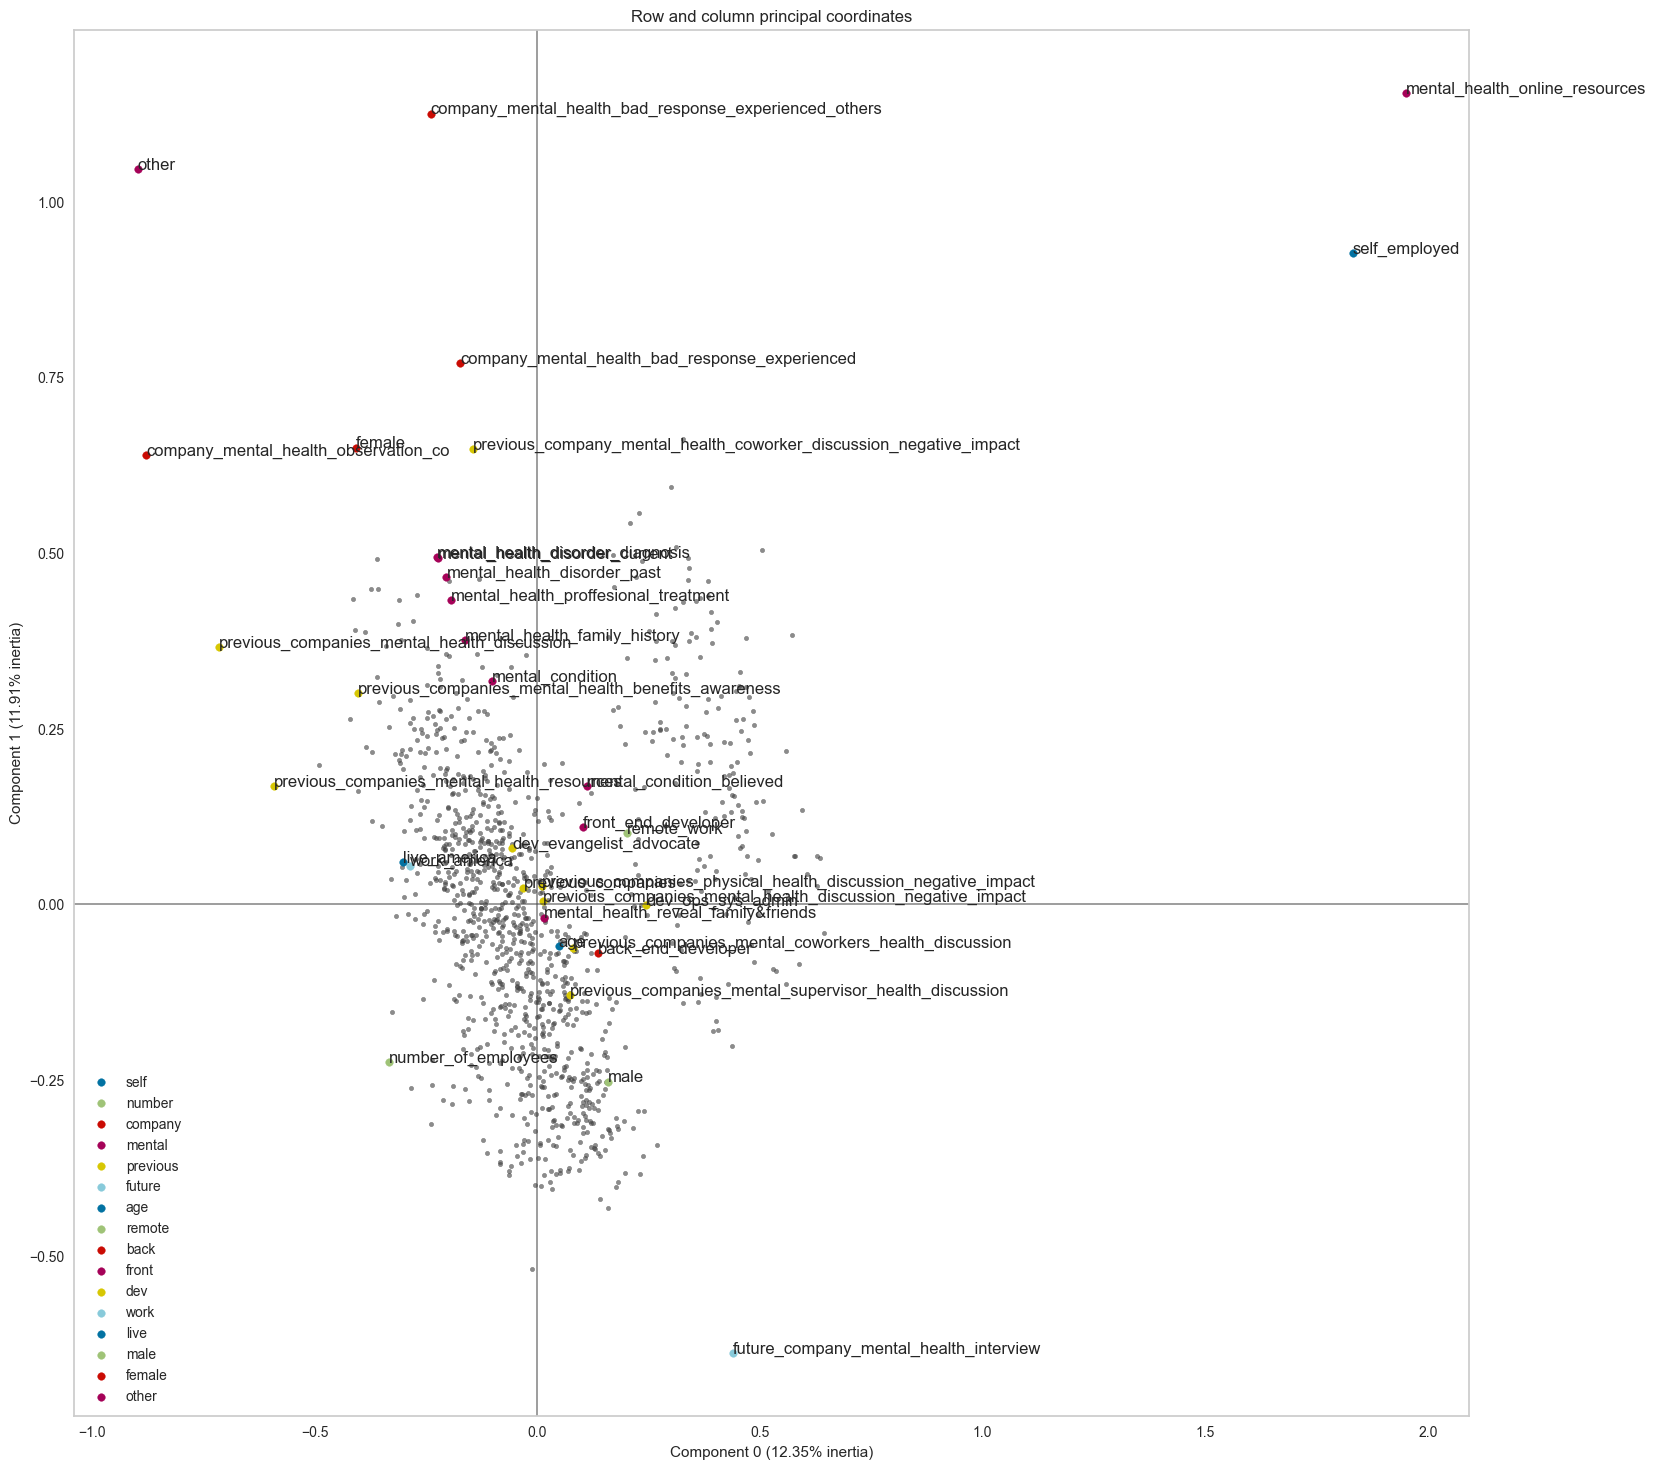

In [69]:
ax = mca.plot_coordinates(X=X,
...     ax=None,
...     figsize=(18, 18),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=True,
...     legend_n_cols=1
... )

In [70]:
# The features that have the greatest impact on Component 0 are: 
    # self_employment, mental health online resource, company mental health observation cowerkers

In [71]:
# The features that have the greatest impact on Component 1 are: 
    # company mental health bad response experience others, company mental health bad response experience, female 
    # future company mental health interview and mental health online resource

In [72]:
# We get all coordinates of ax and store them in a df
coordinates = ax.get_children()[2].get_offsets()

coordinates = pd.DataFrame(coordinates, columns=['x', 'y'])

coordinates.head()

x         y
0  0.112488 -0.246235
1 -0.148094  0.060667
2  0.098237 -0.046986
3 -0.086360  0.236747
4 -0.068035 -0.094123

Text(0, 0.5, 'Second Principal Component')

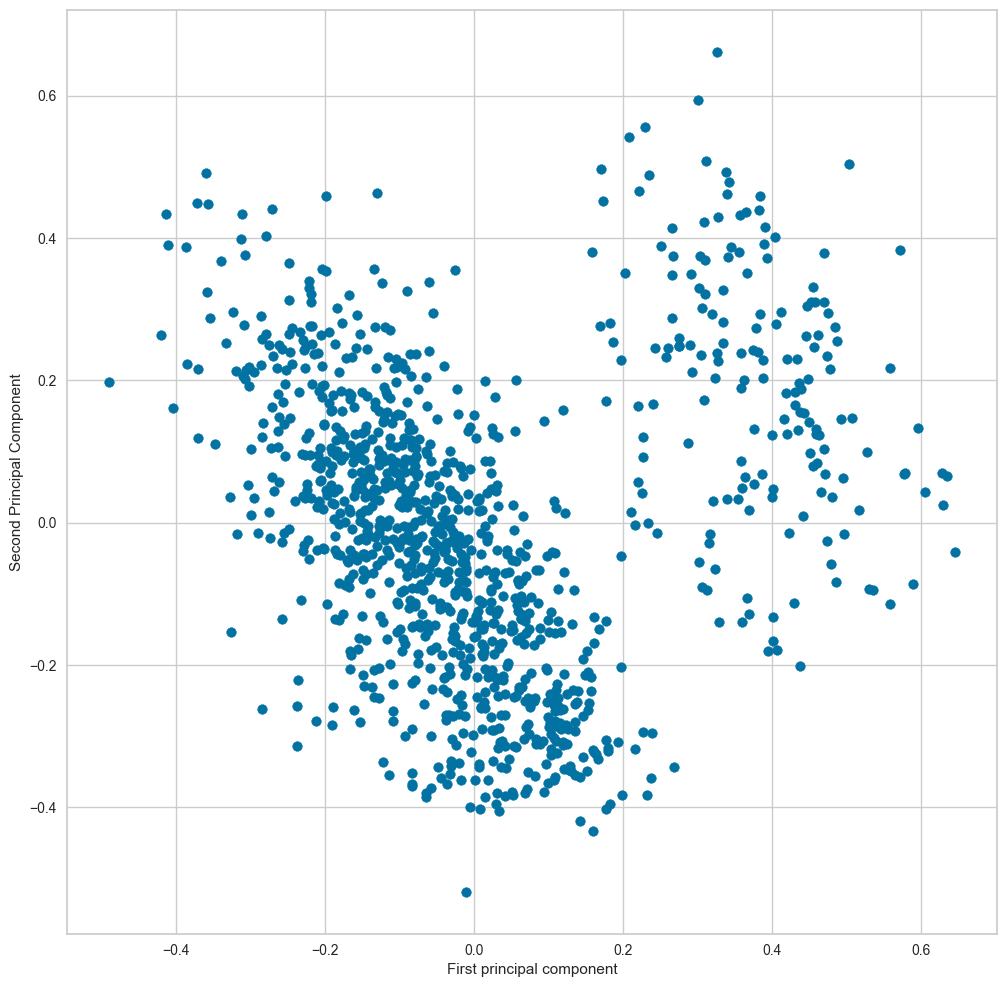

In [73]:
# We plot the coordinates variable on 2 dimensions
plt.figure(figsize=(12,12))
plt.scatter(coordinates['x'],coordinates['y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Clustering

# Cluster Selection

## Elbow Method

In [74]:
# create a k-Means model an Elbow-Visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8), timings=False)

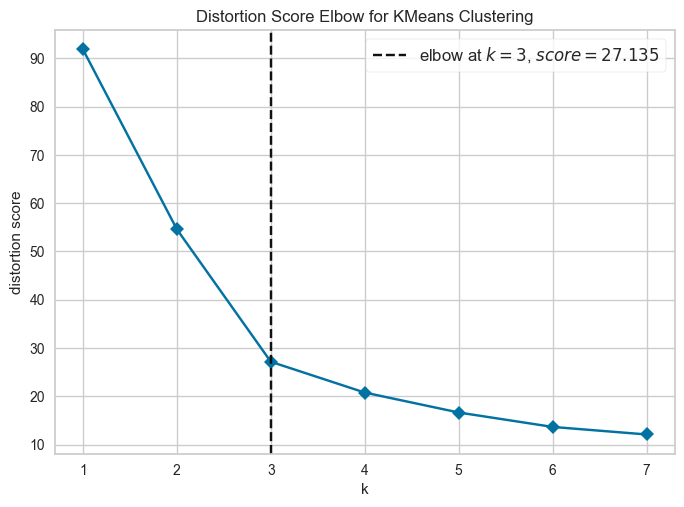

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
# fit the visualizer and show the plot
visualizer.fit(coordinates)
visualizer.show() 

## Silhouette Score

In [76]:
# We appyl k-Means clustering
model = KMeans(n_clusters=3, random_state=0).fit(coordinates)

In [77]:
# extract labels, i.e. cluster associations
lab=model.labels_

In [78]:
# calculate the overall Silhouette score
S = silhouette_score(coordinates, lab)
print(S)

0.4785811326709536


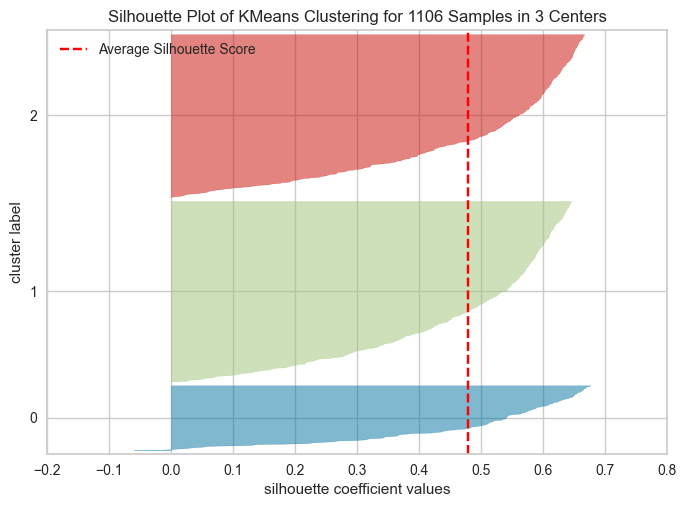

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 1106 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
# generate, fit and show a Silhouette visualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(coordinates) 
visualizer.show()

In [80]:
# We get the best results when using 3 clusters and 20 features

## K-Means Clustering

### Cluster Visualization

In [81]:
# clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(coordinates)

In [82]:
print(kmeans.inertia_)

27.13471849548105


In [83]:
# extract centroids of clusters into a dataframe
centers = kmeans.cluster_centers_
centroids = pd.DataFrame(centers,columns=['xpt','ypt'])

In [84]:
# extract cluster labels
lab = kmeans.labels_

In [85]:
lab

array([2, 1, 2, ..., 1, 1, 1])

In [86]:
coordinates['lab'] = lab

In [87]:
coordinates

x         y  lab
0     0.112488 -0.246235    2
1    -0.148094  0.060667    1
2     0.098237 -0.046986    2
3    -0.086360  0.236747    1
4    -0.068035 -0.094123    2
...        ...       ...  ...
1101  0.070550 -0.374858    2
1102 -0.270741  0.162804    1
1103 -0.126722 -0.005502    1
1104 -0.129109  0.126674    1
1105 -0.147362  0.105082    1

[1106 rows x 3 columns]

In [88]:
radii = [cdist(coordinates[lab == i].iloc[:,[0,1]], [center]).max() for i, center in enumerate(centers)]

In [89]:
print(radii)

[0.47522041137156285, 0.445453267505861, 0.3189308000937282]


Text(0, 0.5, 'Second Principal Component')

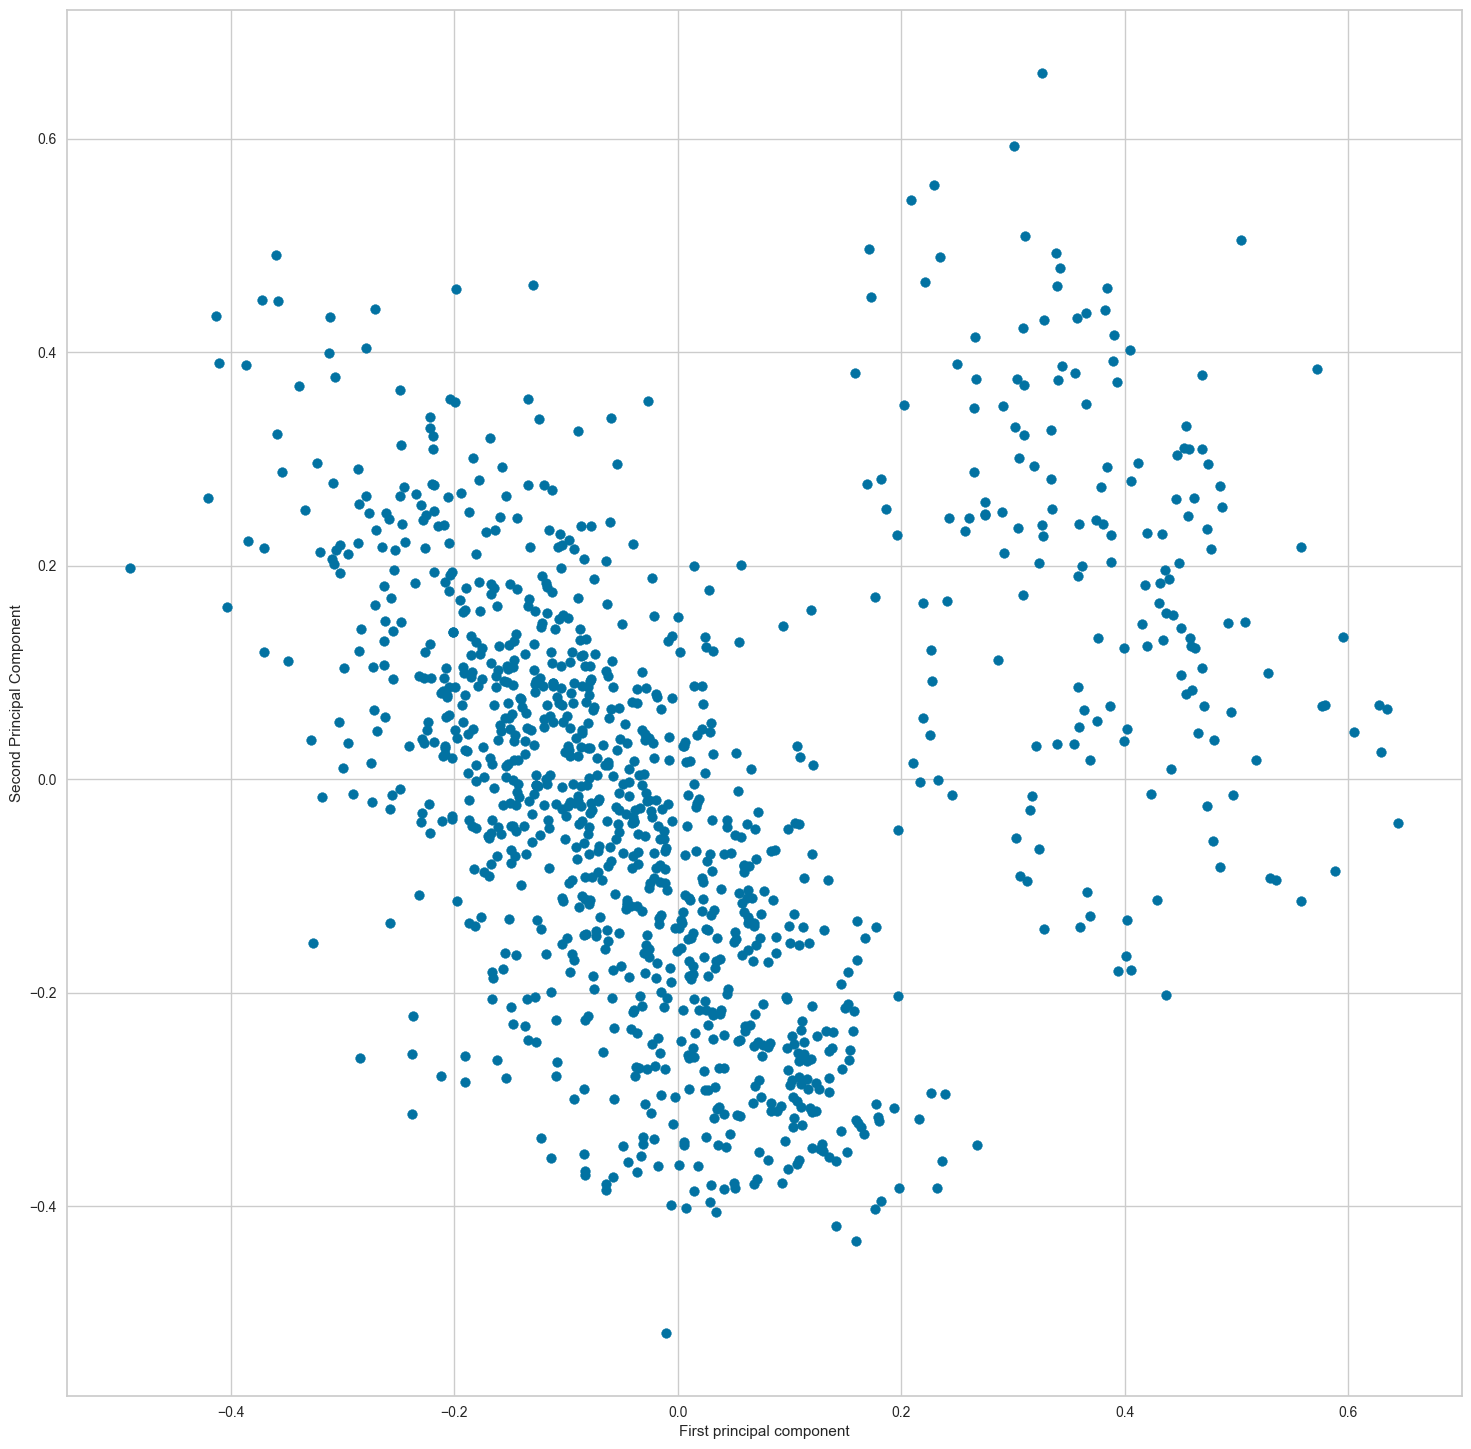

In [90]:
# We plot the coordinates variable on 2 dimensions
plt.figure(figsize=(18,18))
plt.scatter(coordinates['x'],coordinates['y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

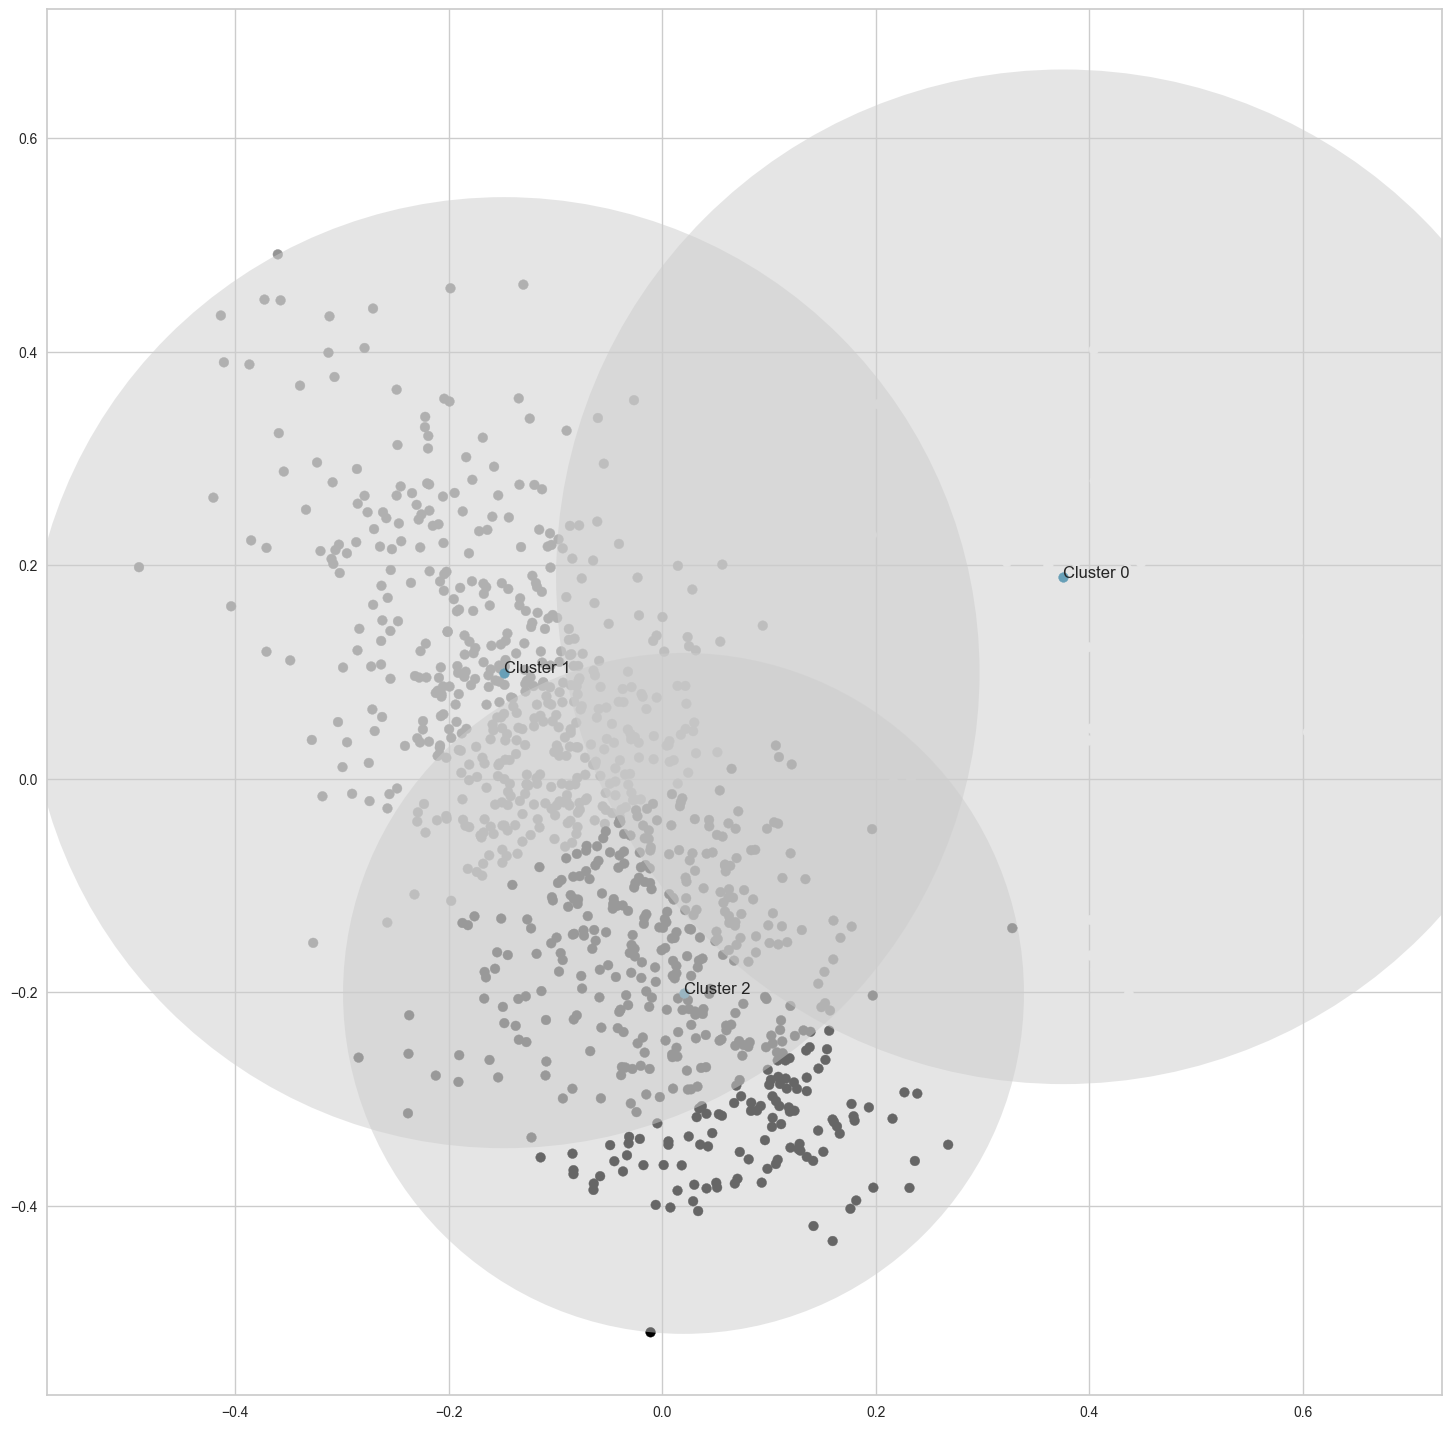

In [91]:
# create a figure and axes
fig, ax = plt.subplots(figsize=(18,18))
# add data points
ax.scatter(x=coordinates['x'], y=coordinates['y'], c=coordinates['lab'])
# add cluster centroids
ax.scatter(centroids['xpt'], centroids['ypt'])
# set the axis scale on both axes equally
ax.axis('equal')
# draw a circle around each cluster centroid
for c, r in zip(centers, radii):
 ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', \
 lw=3, alpha=0.5)) 
# we assign a name to the cluster based on their index
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
# We plot the clusters with their name
for i, txt in enumerate(labels):
    ax.annotate(txt, (centroids['xpt'][i], centroids['ypt'][i]))
# show the plot 
plt.show()

### Number of Data points in Cluster

Text(0, 0.5, 'Number of rows')

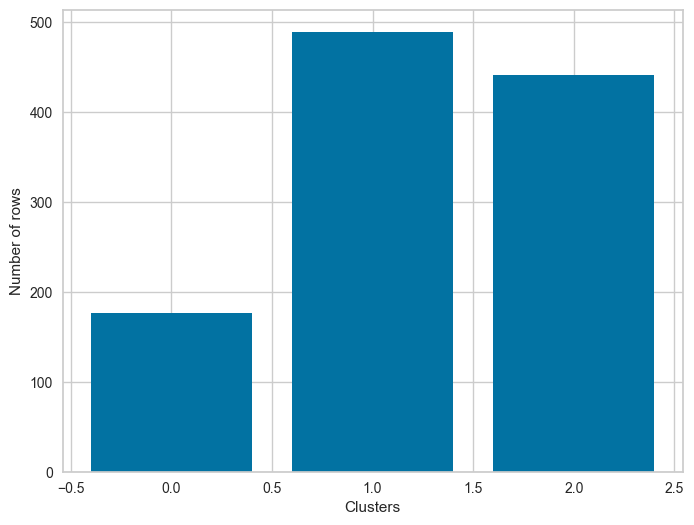

In [92]:
# We create a bar graph for the df where the Y axis is the number of rows belonging to a cluster and the X axis are the clusters
plt.figure(figsize=(8,6))
plt.bar(coordinates['lab'].value_counts().index, coordinates['lab'].value_counts())
plt.xlabel('Clusters')
plt.ylabel('Number of rows')

### Feature Importance

In [93]:
X = df.copy()
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [94]:
### Cluster Analysis
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)


clusters=pd.DataFrame(X,columns=df.columns)
clusters['label']=lab
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

## Interpreting Results

In [95]:
df['Cluster'] = lab
df.head()

self_employed  number_of_employees  company_mental_health_observation_co  \
0              0                    3                                     0   
1              0                    2                                     0   
2              0                    2                                     0   
3              0                    2                                     0   
4              0                    6                                     1   

   mental_health_online_resources  previous_companies  \
0                               0                   1   
1                               0                   1   
2                               0                   1   
3                               0                   1   
4                               0                   1   

   previous_companies_mental_health_benefits_awareness  \
0                                                  0     
1                                                  1     
2                                                  0     
3                                                  0     
4                                                  1     

   previous_companies_mental_health_discussion  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

   previous_companies_mental_health_resources  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
0                                                  1             
1                                                  0             
2                                                  1             
3                                                  1             
4                                                  1             

   previous_companies_physical_health_discussion_negative_impact  ...  \
0                                                  0              ...   
1                                                  0              ...   
2                                                  1              ...   
3                                                  1              ...   
4                                                  1              ...   

   dev_ops_sys_admin  dev_evangelist_advocate  work_america  live_america  \
0                  0                        0             0             0   
1                  0                        0             1             1   
2                  0                        0             0             0   
3                  1                        1             1             1   
4                  1                        0             0             0   

   mental_condition_believed  male  female  other  mental_condition  Cluster  
0                          0     1       0      0                 1        2  
1                          0     1       0      0                 1        1  
2                          0     1       0      0                 0        2  
3                          0     0       1      0                 1        1  
4                          0     1       0      0                 0        2  

[5 rows x 36 columns]

In [96]:
df['Cluster'].value_counts()

1    489
2    441
0    176
Name: Cluster, dtype: int64

In [97]:
df.describe()

self_employed  number_of_employees  \
count    1106.000000          1106.000000   
mean        0.162749             3.296564   
std         0.369303             1.741359   
min         0.000000             1.000000   
25%         0.000000             2.000000   
50%         0.000000             3.000000   
75%         0.000000             4.000000   
max         1.000000             6.000000   

       company_mental_health_observation_co  mental_health_online_resources  \
count                           1106.000000                     1106.000000   
mean                               0.061483                        0.126582   
std                                0.240322                        0.332655   
min                                0.000000                        0.000000   
25%                                0.000000                        0.000000   
50%                                0.000000                        0.000000   
75%                                0.000000                        0.000000   
max                                1.000000                        1.000000   

       previous_companies  \
count         1106.000000   
mean             0.877939   
std              0.327505   
min              0.000000   
25%              1.000000   
50%              1.000000   
75%              1.000000   
max              1.000000   

       previous_companies_mental_health_benefits_awareness  \
count                                        1106.000000     
mean                                            0.384268     
std                                             0.486642     
min                                             0.000000     
25%                                             0.000000     
50%                                             0.000000     
75%                                             1.000000     
max                                             1.000000     

       previous_companies_mental_health_discussion  \
count                                  1106.000000   
mean                                      0.200723   
std                                       0.400723   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       1.000000   

       previous_companies_mental_health_resources  \
count                                 1106.000000   
mean                                     0.281193   
std                                      0.449785   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      1.000000   
max                                      1.000000   

       previous_companies_mental_health_discussion_negative_impact  \
count                                        1106.000000             
mean                                            0.918626             
std                                             0.273533             
min                                             0.000000             
25%                                             1.000000             
50%                                             1.000000             
75%                                             1.000000             
max                                             1.000000             

       previous_companies_physical_health_discussion_negative_impact  ...  \
count                                        1106.000000              ...   
mean                                            0.603074              ...   
std                                             0.489482              ...   
min                                             0.000000              ...   
25%                                             0.000000              ...   
50%       

In [98]:
# We get all data records that belong to Cluster 0
df_cluster_0 = df[df['Cluster'] == 0]
df_cluster_0.head()

self_employed  number_of_employees  company_mental_health_observation_co  \
8               1                    1                                     0   
28              1                    1                                     0   
34              1                    1                                     0   
35              1                    1                                     0   
40              1                    1                                     0   

    mental_health_online_resources  previous_companies  \
8                                1                   1   
28                               0                   1   
34                               1                   1   
35                               1                   1   
40                               0                   1   

    previous_companies_mental_health_benefits_awareness  \
8                                                   1     
28                                                  0     
34                                                  0     
35                                                  0     
40                                                  1     

    previous_companies_mental_health_discussion  \
8                                             0   
28                                            0   
34                                            0   
35                                            0   
40                                            0   

    previous_companies_mental_health_resources  \
8                                            0   
28                                           0   
34                                           1   
35                                           0   
40                                           0   

    previous_companies_mental_health_discussion_negative_impact  \
8                                                   1             
28                                                  1             
34                                                  1             
35                                                  1             
40                                                  1             

    previous_companies_physical_health_discussion_negative_impact  ...  \
8                                                   1              ...   
28                                                  1              ...   
34                                                  1              ...   
35                                                  0              ...   
40                                                  1              ...   

    dev_ops_sys_admin  dev_evangelist_advocate  work_america  live_america  \
8                   0                        0             1             1   
28                  0                        0             0             0   
34                  1                        0             1             1   
35                  1                        0             0             0   
40                  0                        0             0             0   

    mental_condition_believed  male  female  other  mental_condition  Cluster  
8                           0     1       0      0                 1        0  
28                          0     1       0      0                 0        0  
34                          0     1       0      0                 1        0  
35                          0     1       0      0                 1        0  
40                          0     1       0      0                 0        0  

[5 rows x 36 columns]

In [99]:
with pd.option_context("display.max_columns", None):
    display(df_cluster_0.head(1))

self_employed  number_of_employees  company_mental_health_observation_co  \
8              1                    1                                     0   

   mental_health_online_resources  previous_companies  \
8                               1                   1   

   previous_companies_mental_health_benefits_awareness  \
8                                                  1     

   previous_companies_mental_health_discussion  \
8                                            0   

   previous_companies_mental_health_resources  \
8                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
8                                                  1             

   previous_companies_physical_health_discussion_negative_impact  \
8                                                  1               

   previous_companies_mental_coworkers_health_discussion  \
8                                                  1       

   previous_companies_mental_supervisor_health_discussion  \
8                                                  1        

   previous_company_mental_health_coworker_discussion_negative_impact  \
8                                                  0                    

   future_company_mental_health_interview  \
8                                       0   

   mental_health_reveal_family&friends  \
8                                    4   

   company_mental_health_bad_response_experienced  \
8                                               0   

   company_mental_health_bad_response_experienced_others  \
8                                                  0       

   mental_health_family_history  mental_health_disorder_past  \
8                             1                            1   

   mental_health_disorder_current  mental_health_disorder_diagnosis  \
8                               1                                 1   

   mental_health_proffesional_treatment   age  remote_work  \
8                                     1  30.0            2   

   back_end_developer  front_end_developer  dev_ops_sys_admin  \
8                   1                    1                  0   

   dev_evangelist_advocate  work_america  live_america  \
8                        0             1             1   

   mental_condition_believed  male  female  other  mental_condition  Cluster  
8                          0     1       0      0                 1        0

In [100]:
# We get all categories from self_employed from df_cluster_0
df_cluster_0['self_employed'].unique()

array([1], dtype=int64)

In [101]:
# We get all categories from self_employed from df_cluster_0
df_cluster_0['mental_health_disorder_diagnosis'].unique()

array([1, 0], dtype=int64)

In [102]:
print("No :",df_cluster_0[df_cluster_0['mental_health_disorder_diagnosis'] == 0].shape[0],"Yes :", df_cluster_0[df_cluster_0['mental_health_disorder_diagnosis'] == 1].shape[0])

No : 84 Yes : 92


In [103]:
# Cluster 0 consists of exclusively self employed individuals

In [104]:
# We get all data records that belong to Cluster 1
df_cluster_1 = df[df['Cluster'] == 1]
df_cluster_1.head()

self_employed  number_of_employees  company_mental_health_observation_co  \
1              0                    2                                     0   
3              0                    2                                     0   
6              0                    6                                     0   
7              0                    3                                     0   
9              0                    3                                     0   

   mental_health_online_resources  previous_companies  \
1                               0                   1   
3                               0                   1   
6                               0                   1   
7                               0                   1   
9                               0                   1   

   previous_companies_mental_health_benefits_awareness  \
1                                                  1     
3                                                  0     
6                                                  1     
7                                                  0     
9                                                  0     

   previous_companies_mental_health_discussion  \
1                                            0   
3                                            1   
6                                            1   
7                                            1   
9                                            0   

   previous_companies_mental_health_resources  \
1                                           1   
3                                           0   
6                                           1   
7                                           0   
9                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
1                                                  0             
3                                                  1             
6                                                  1             
7                                                  1             
9                                                  1             

   previous_companies_physical_health_discussion_negative_impact  ...  \
1                                                  0              ...   
3                                                  1              ...   
6                                                  1              ...   
7                                                  1              ...   
9                                                  1              ...   

   dev_ops_sys_admin  dev_evangelist_advocate  work_america  live_america  \
1                  0                        0             1             1   
3                  1                        1             1             1   
6                  0                        1             1             1   
7                  0                        0             1             1   
9                  0                        0             1             1   

   mental_condition_believed  male  female  other  mental_condition  Cluster  
1                          0     1       0      0                 1        1  
3                          0     0       1      0                 1        1  
6                          0     0       1      0                 1        1  
7                          0     0       1      0                 1        1  
9                          0     1       0      0                 1        1  

[5 rows x 36 columns]

In [105]:
with pd.option_context("display.max_columns", None):
    display(df_cluster_1.head(1))

self_employed  number_of_employees  company_mental_health_observation_co  \
1              0                    2                                     0   

   mental_health_online_resources  previous_companies  \
1                               0                   1   

   previous_companies_mental_health_benefits_awareness  \
1                                                  1     

   previous_companies_mental_health_discussion  \
1                                            0   

   previous_companies_mental_health_resources  \
1                                           1   

   previous_companies_mental_health_discussion_negative_impact  \
1                                                  0             

   previous_companies_physical_health_discussion_negative_impact  \
1                                                  0               

   previous_companies_mental_coworkers_health_discussion  \
1                                                  0       

   previous_companies_mental_supervisor_health_discussion  \
1                                                  1        

   previous_company_mental_health_coworker_discussion_negative_impact  \
1                                                  0                    

   future_company_mental_health_interview  \
1                                       0   

   mental_health_reveal_family&friends  \
1                                    3   

   company_mental_health_bad_response_experienced  \
1                                               0   

   company_mental_health_bad_response_experienced_others  \
1                                                  0       

   mental_health_family_history  mental_health_disorder_past  \
1                             1                            1   

   mental_health_disorder_current  mental_health_disorder_diagnosis  \
1                               1                                 1   

   mental_health_proffesional_treatment   age  remote_work  \
1                                     1  29.0            0   

   back_end_developer  front_end_developer  dev_ops_sys_admin  \
1                   1                    1                  0   

   dev_evangelist_advocate  work_america  live_america  \
1                        0             1             1   

   mental_condition_believed  male  female  other  mental_condition  Cluster  
1                          0     1       0      0                 1        1

In [106]:
# We get all categories from self_employed from df_cluster_1
df_cluster_1['self_employed'].unique()

array([0, 1], dtype=int64)

In [107]:
print("employed :",df_cluster_1[df_cluster_1['self_employed'] == 0].shape[0],"self-employed :", df_cluster_1[df_cluster_1['self_employed'] == 1].shape[0])

employed : 488 self-employed : 1


In [108]:
# Cluster 1 consists of almost exclusively employed individuals

In [109]:
# We get all data records that belong to Cluster 2
df_cluster_2 = df[df['Cluster'] == 2]
df_cluster_2.head()

self_employed  number_of_employees  company_mental_health_observation_co  \
0               0                    3                                     0   
2               0                    2                                     0   
4               0                    6                                     1   
5               0                    3                                     0   
12              0                    4                                     0   

    mental_health_online_resources  previous_companies  \
0                                0                   1   
2                                0                   1   
4                                0                   1   
5                                0                   1   
12                               0                   1   

    previous_companies_mental_health_benefits_awareness  \
0                                                   0     
2                                                   0     
4                                                   1     
5                                                   1     
12                                                  0     

    previous_companies_mental_health_discussion  \
0                                             0   
2                                             0   
4                                             0   
5                                             0   
12                                            0   

    previous_companies_mental_health_resources  \
0                                            0   
2                                            1   
4                                            0   
5                                            1   
12                                           0   

    previous_companies_mental_health_discussion_negative_impact  \
0                                                   1             
2                                                   1             
4                                                   1             
5                                                   0             
12                                                  1             

    previous_companies_physical_health_discussion_negative_impact  ...  \
0                                                   0              ...   
2                                                   1              ...   
4                                                   1              ...   
5                                                   0              ...   
12                                                  1              ...   

    dev_ops_sys_admin  dev_evangelist_advocate  work_america  live_america  \
0                   0                        0             0             0   
2                   0                        0             0             0   
4                   1                        0             0             0   
5                   0                        0             1             1   
12                  1                        0             0             0   

    mental_condition_believed  male  female  other  mental_condition  Cluster  
0                           0     1       0      0                 1        2  
2                           0     1       0      0                 0        2  
4                           0     1       0      0                 0        2  
5                           0     1       0      0                 0        2  
12                          1     1       0      0                 1        2  

[5 rows x 36 columns]

In [110]:
with pd.option_context("display.max_columns", None):
    display(df_cluster_2.head(1))

self_employed  number_of_employees  company_mental_health_observation_co  \
0              0                    3                                     0   

   mental_health_online_resources  previous_companies  \
0                               0                   1   

   previous_companies_mental_health_benefits_awareness  \
0                                                  0     

   previous_companies_mental_health_discussion  \
0                                            0   

   previous_companies_mental_health_resources  \
0                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
0                                                  1             

   previous_companies_physical_health_discussion_negative_impact  \
0                                                  0               

   previous_companies_mental_coworkers_health_discussion  \
0                                                  1       

   previous_companies_mental_supervisor_health_discussion  \
0                                                  1        

   previous_company_mental_health_coworker_discussion_negative_impact  \
0                                                  0                    

   future_company_mental_health_interview  \
0                                       0   

   mental_health_reveal_family&friends  \
0                                    3   

   company_mental_health_bad_response_experienced  \
0                                               0   

   company_mental_health_bad_response_experienced_others  \
0                                                  0       

   mental_health_family_history  mental_health_disorder_past  \
0                             0                            0   

   mental_health_disorder_current  mental_health_disorder_diagnosis  \
0                               0                                 1   

   mental_health_proffesional_treatment   age  remote_work  \
0                                     0  39.0            1   

   back_end_developer  front_end_developer  dev_ops_sys_admin  \
0                   1                    0                  0   

   dev_evangelist_advocate  work_america  live_america  \
0                        0             0             0   

   mental_condition_believed  male  female  other  mental_condition  Cluster  
0                          0     1       0      0                 1        2

In [111]:
# We get all categories from self_employed from df_cluster_1
df_cluster_2['self_employed'].unique()

array([0, 1], dtype=int64)

In [112]:
print("employed :",df_cluster_2[df_cluster_2['self_employed'] == 0].shape[0],"self-employed :", df_cluster_2[df_cluster_2['self_employed'] == 1].shape[0])

employed : 438 self-employed : 3


In [113]:
# Cluster 2 consists of almost exclusively employed individuals
# We can deduce from this that the main seperation between the clusters is their status of employment and their mental state

# DF (employed)

# Feature Selection

## Remove Features with Low Variance

In [114]:
df_employed.head()

Unnamed: 0  Are you self-employed?  \
0           0                       0   
1           1                       0   
2           2                       0   
3           4                       0   
4           5                       0   

   How many employees does your company or organization have?  \
0                                                  3            
1                                                  2            
2                                                  2            
3                                                  2            
4                                                  6            

   Is your employer primarily a tech company/organization?  \
0                                                  1         
1                                                  1         
2                                                  1         
3                                                  0         
4                                                  1         

   Is your primary role within your company related to tech/IT?  \
0                                                  1              
1                                                  1              
2                                                  1              
3                                                  1              
4                                                  1              

   Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                  1                                   
1                                                  0                                   
2                                                  0                                   
3                                                  1                                   
4                                                  1                                   

   Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                  0                                                 
1                                                  1                                                 
2                                                  0                                                 
3                                                  1                                                 
4                                                  0                                                 

   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                        
1                                                  1                                                                                        
2                                                  0                                                                                        
3                                                  0                                                                                        
4                                                  0                                                                                        

   Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                  0                                                             
1                                                  1                                                             
2                                                  0                                                             
3                                                  0                                                             
4                             

In [115]:
with pd.option_context("display.max_columns", None):
    display(df_employed.head(1))

Unnamed: 0  Are you self-employed?  \
0           0                       0   

   How many employees does your company or organization have?  \
0                                                  3            

   Is your employer primarily a tech company/organization?  \
0                                                  1         

   Is your primary role within your company related to tech/IT?  \
0                                                  1              

   Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                  1                                   

   Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                  0                                                 

   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                        

   Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                  0                                                             

   If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
0                                                  4                                                             

   Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
0                                                  0                                                            

   Do you think that discussing a physical health issue with your employer would have negative consequences?  \
0                                                  0                                                           

   Do you feel that your employer takes mental health as seriously as physical health?  \
0                                                  1                                     

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     

   Do you know local or online resources to seek help for a mental health disorder?  \
0                                                  0                                  

   Do you have previous employers?  \
0                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  0                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              

   Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
0                                                  1                                                                 

   Do you think that discussing a physical health issue with previous employers would have negative consequences?  \
0                                                  0                                                                

   Would you have been willing to discuss a mental health issue with your p

In [116]:
# We assign a threshold to the data and fit the df to the threshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df_employed)

VarianceThreshold(threshold=0)

In [117]:
# We check the columns which fullfill the criteria of variance = 0 (True = Not Variance 0, False = Variance 0)
var_thres.get_support()

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [118]:
# We drop all columns which have the variance 0
df_employed = df_employed.drop([column for column in df_employed.columns if column not in df_employed.columns[var_thres.get_support()]], axis = 1)

In [119]:
with pd.option_context("display.max_columns", None):
    display(df_employed.head(1))

Unnamed: 0  How many employees does your company or organization have?  \
0           0                                                  3            

   Is your employer primarily a tech company/organization?  \
0                                                  1         

   Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                  1                                   

   Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                  0                                                 

   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                        

   Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                  0                                                             

   If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
0                                                  4                                                             

   Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
0                                                  0                                                            

   Do you think that discussing a physical health issue with your employer would have negative consequences?  \
0                                                  0                                                           

   Do you feel that your employer takes mental health as seriously as physical health?  \
0                                                  1                                     

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     

   Do you have previous employers?  \
0                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  0                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              

   Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
0                                                  1                                                                 

   Do you think that discussing a physical health issue with previous employers would have negative consequences?  \
0                                                  0                                                                

   Would you have been willing to discuss a mental health issue with your previous co-workers?  \
0                                                  1                                             

   Would you have been willing to discuss a mental health issue with your direct supervisor(s)  \
0                                                  1                                             

   Did you hear of or observe negative consequence

In [120]:
df_employed.head(1)

Unnamed: 0  How many employees does your company or organization have?  \
0           0                                                  3            

   Is your employer primarily a tech company/organization?  \
0                                                  1         

   Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                  1                                   

   Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                  0                                                 

   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                        

   Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                  0                                                             

   If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
0                                                  4                                                             

   Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
0                                                  0                                                            

   Do you think that discussing a physical health issue with your employer would have negative consequences?  \
0                                                  0                                                           

   ...  Front-end Developer  DevOps/SysAdmin  Dev Evangelist/Advocate  \
0  ...                    0                0                        0   

   Working in America  Living in America  Believed Mental Conditions  Male  \
0                   0                  0                           0     1   

   Female  Other  Mental Condition  
0       0      0                 1  

[1 rows x 43 columns]

In [121]:
df_employed = df_employed.drop(['Unnamed: 0'], axis=1)

# Renaming of Columns

In [122]:
with pd.option_context("display.max_columns", None):
    display(df_employed.head(1))

How many employees does your company or organization have?  \
0                                                  3            

   Is your employer primarily a tech company/organization?  \
0                                                  1         

   Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                  1                                   

   Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                  0                                                 

   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                        

   Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                  0                                                             

   If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
0                                                  4                                                             

   Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
0                                                  0                                                            

   Do you think that discussing a physical health issue with your employer would have negative consequences?  \
0                                                  0                                                           

   Do you feel that your employer takes mental health as seriously as physical health?  \
0                                                  1                                     

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     

   Do you have previous employers?  \
0                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  0                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              

   Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
0                                                  1                                                                 

   Do you think that discussing a physical health issue with previous employers would have negative consequences?  \
0                                                  0                                                                

   Would you have been willing to discuss a mental health issue with your previous co-workers?  \
0                                                  1                                             

   Would you have been willing to discuss a mental health issue with your direct supervisor(s)  \
0                                                  1                                             

   Did you hear of or observe negative consequences for co-workers with me

In [123]:
# Column rename
old_names_employed = df_employed.columns
renamed_columns = ['number_of_employees', 'employer_tech', 'mental_health_benefits', 'options_mental_health_benefits','mental_health_discussion_employer', 
                   'resources_mental_health_employer', 'leave_mental_concern','mental_health_discussion_employer_negative','physical_health_discussion_employer_negative',
                   'mental_physical_health_serious_employer', 'company_mental_health_observation_co', 'previous_companies', 'previous_companies_mental_health_benefits_awareness','previous_companies_mental_health_discussion', 
                   'previous_companies_mental_health_resources', 'previous_companies_mental_health_discussion_negative_impact', 
                   'previous_companies_physical_health_discussion_negative_impact',
                  'previous_companies_mental_coworkers_health_discussion', 'previous_companies_mental_supervisor_health_discussion', 
                'previous_company_mental_health_coworker_discussion_negative_impact','future_company_mental_health_interview',
                  'mental_health_reveal_family&friends', 'company_mental_health_bad_response_experienced', 
                   'company_mental_health_bad_response_experienced_others', 'mental_health_family_history',
                  'mental_health_disorder_past', 'mental_health_disorder_current',
                   'mental_health_disorder_diagnosis', 'mental_health_proffesional_treatment','age', 'remote_work', 'back_end_developer',
                   'front_end_developer', 'dev_ops_sys_admin', 'dev_evangelist_advocate', 'work_america',
                   'live_america', 'mental_condition_believed', 'male', 'female','other', 'mental_condition']
    
df_employed.columns = renamed_columns

In [124]:
with pd.option_context("display.max_columns", None):
    display(df_employed.head(1))

number_of_employees  employer_tech  mental_health_benefits  \
0                    3              1                       1   

   options_mental_health_benefits  mental_health_discussion_employer  \
0                               0                                  0   

   resources_mental_health_employer  leave_mental_concern  \
0                                 0                     4   

   mental_health_discussion_employer_negative  \
0                                           0   

   physical_health_discussion_employer_negative  \
0                                             0   

   mental_physical_health_serious_employer  \
0                                        1   

   company_mental_health_observation_co  previous_companies  \
0                                     0                   1   

   previous_companies_mental_health_benefits_awareness  \
0                                                  0     

   previous_companies_mental_health_discussion  \
0                                            0   

   previous_companies_mental_health_resources  \
0                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
0                                                  1             

   previous_companies_physical_health_discussion_negative_impact  \
0                                                  0               

   previous_companies_mental_coworkers_health_discussion  \
0                                                  1       

   previous_companies_mental_supervisor_health_discussion  \
0                                                  1        

   previous_company_mental_health_coworker_discussion_negative_impact  \
0                                                  0                    

   future_company_mental_health_interview  \
0                                       0   

   mental_health_reveal_family&friends  \
0                                    3   

   company_mental_health_bad_response_experienced  \
0                                               0   

   company_mental_health_bad_response_experienced_others  \
0                                                  0       

   mental_health_family_history  mental_health_disorder_past  \
0                             0                            0   

   mental_health_disorder_current  mental_health_disorder_diagnosis  \
0                               0                                 1   

   mental_health_proffesional_treatment   age  remote_work  \
0                                     0  39.0            1   

   back_end_developer  front_end_developer  dev_ops_sys_admin  \
0                   1                    0                  0   

   dev_evangelist_advocate  work_america  live_america  \
0                        0             0             0   

   mental_condition_believed  male  female  other  mental_condition  
0                          0     1       0      0                 1

# Dimensionality Reduction

## MCA

In [125]:
# We load the dataframe into X
X = df_employed
X.head()

number_of_employees  employer_tech  mental_health_benefits  \
0                    3              1                       1   
1                    2              1                       0   
2                    2              1                       0   
3                    2              0                       1   
4                    6              1                       1   

   options_mental_health_benefits  mental_health_discussion_employer  \
0                               0                                  0   
1                               1                                  1   
2                               0                                  0   
3                               1                                  0   
4                               0                                  0   

   resources_mental_health_employer  leave_mental_concern  \
0                                 0                     4   
1                                 1                     3   
2                                 0                     2   
3                                 0                     2   
4                                 1                     3   

   mental_health_discussion_employer_negative  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           1   

   physical_health_discussion_employer_negative  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             1   

   mental_physical_health_serious_employer  ...  front_end_developer  \
0                                        1  ...                    0   
1                                        1  ...                    1   
2                                        1  ...                    0   
3                                        0  ...                    1   
4                                        0  ...                    1   

   dev_ops_sys_admin  dev_evangelist_advocate  work_america  live_america  \
0                  0                        0             0             0   
1                  0                        0             1             1   
2                  0                        0             0             0   
3                  1                        1             1             1   
4                  1                        0             0             0   

   mental_condition_believed  male  female  other  mental_condition  
0                          0     1       0      0                 1  
1                          0     1       0      0                 1  
2                          0     1       0      0                 0  
3                          0     0       1      0                 1  
4                          0     1       0      0                 0  

[5 rows x 42 columns]

In [126]:
# We create a variable from the MCA class
mca = prince.MCA(n_components=42).fit(X)

In [127]:
mca.eigenvalues_

[0.04459742719766151,
 0.03079803928256529,
 0.023648588375044938,
 0.021132370549377954,
 0.020812899075494853,
 0.0177689758105471,
 0.016987596320153082,
 0.016288951128589052,
 0.014763506377616288,
 0.014627772791748246,
 0.014123422813664493,
 0.013076285838881306,
 0.012623125049041256,
 0.011544116237532431,
 0.010603910330852609,
 0.01017629085504577,
 0.009274815252591951,
 0.009004837031625468,
 0.00822292038557935,
 0.007680668270778308,
 0.007342747640618981,
 0.006579267325446472,
 0.006437095763437495,
 0.006242183379029007,
 0.005672317179206535,
 0.005530717600661942,
 0.00491480871773998,
 0.0042746000897627345,
 0.0038727196455714927,
 0.003542732602751994,
 0.0029034322350520985,
 0.002557010841806871,
 0.002270989427256577,
 0.0020104759127244844,
 0.0015996746597340104,
 0.0013775591629121662,
 0.0012402800484568328,
 0.0008101985696921921,
 0.00030188879554136525,
 0.0002009239683233267,
 0.00011828312403245448,
 3.354292467524785e-32]

In [128]:
# We calculate the sum of mca.eigenvalues_
sum(mca.eigenvalues_)

0.3975564256641501

In [129]:
mca.total_inertia_ = sum(mca.eigenvalues_)

In [130]:
mca.total_inertia_

0.3975564256641501

In [131]:
mca.explained_inertia_

[0.1121788614613835,
 0.07746834737009892,
 0.05948486013158525,
 0.05315565083390269,
 0.05235206308318429,
 0.0446954813542822,
 0.042730025786336945,
 0.04097267727814245,
 0.03713562509511111,
 0.03679420541954861,
 0.035525580526261584,
 0.03289164756181796,
 0.03175178222299717,
 0.0290376799173779,
 0.026672717748525684,
 0.025597098168003332,
 0.023329556897735016,
 0.022650462803065402,
 0.020683656091942917,
 0.019319693444640296,
 0.018469699309607002,
 0.016549266722215027,
 0.016191653179001713,
 0.015701377153195136,
 0.01426795496948759,
 0.013911780174153723,
 0.012362543781123385,
 0.010752184630450055,
 0.009741308140352158,
 0.008911269882843858,
 0.007303195339382782,
 0.006431818672117242,
 0.0057123700703936705,
 0.0050570831784842165,
 0.004023767587359769,
 0.003465065771760178,
 0.003119758525811386,
 0.0020379461062381018,
 0.0007593608757223221,
 0.000505397360859322,
 0.00029752537349849893,
 8.437273933935715e-32]

Text(0, 0.5, 'Explained Inertia')

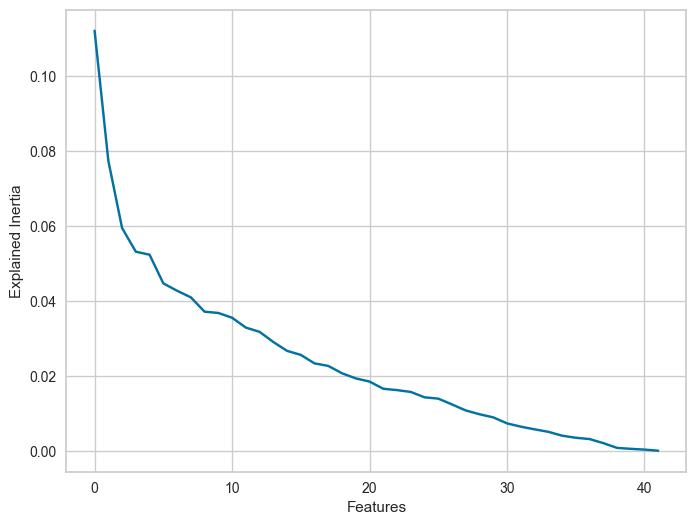

In [132]:
# We plot the mca.explained_intertia_
plt.figure(figsize=(8,6))
plt.plot(mca.explained_inertia_)
plt.xlabel('Features')
plt.ylabel('Explained Inertia')

In [133]:
# We calculate the sum of mca.explained_inertia_ that reaches above the value 0.9
sum(mca.explained_inertia_[0:25]) # We can explain about 90% of our data with 25 features

0.9056076245294494

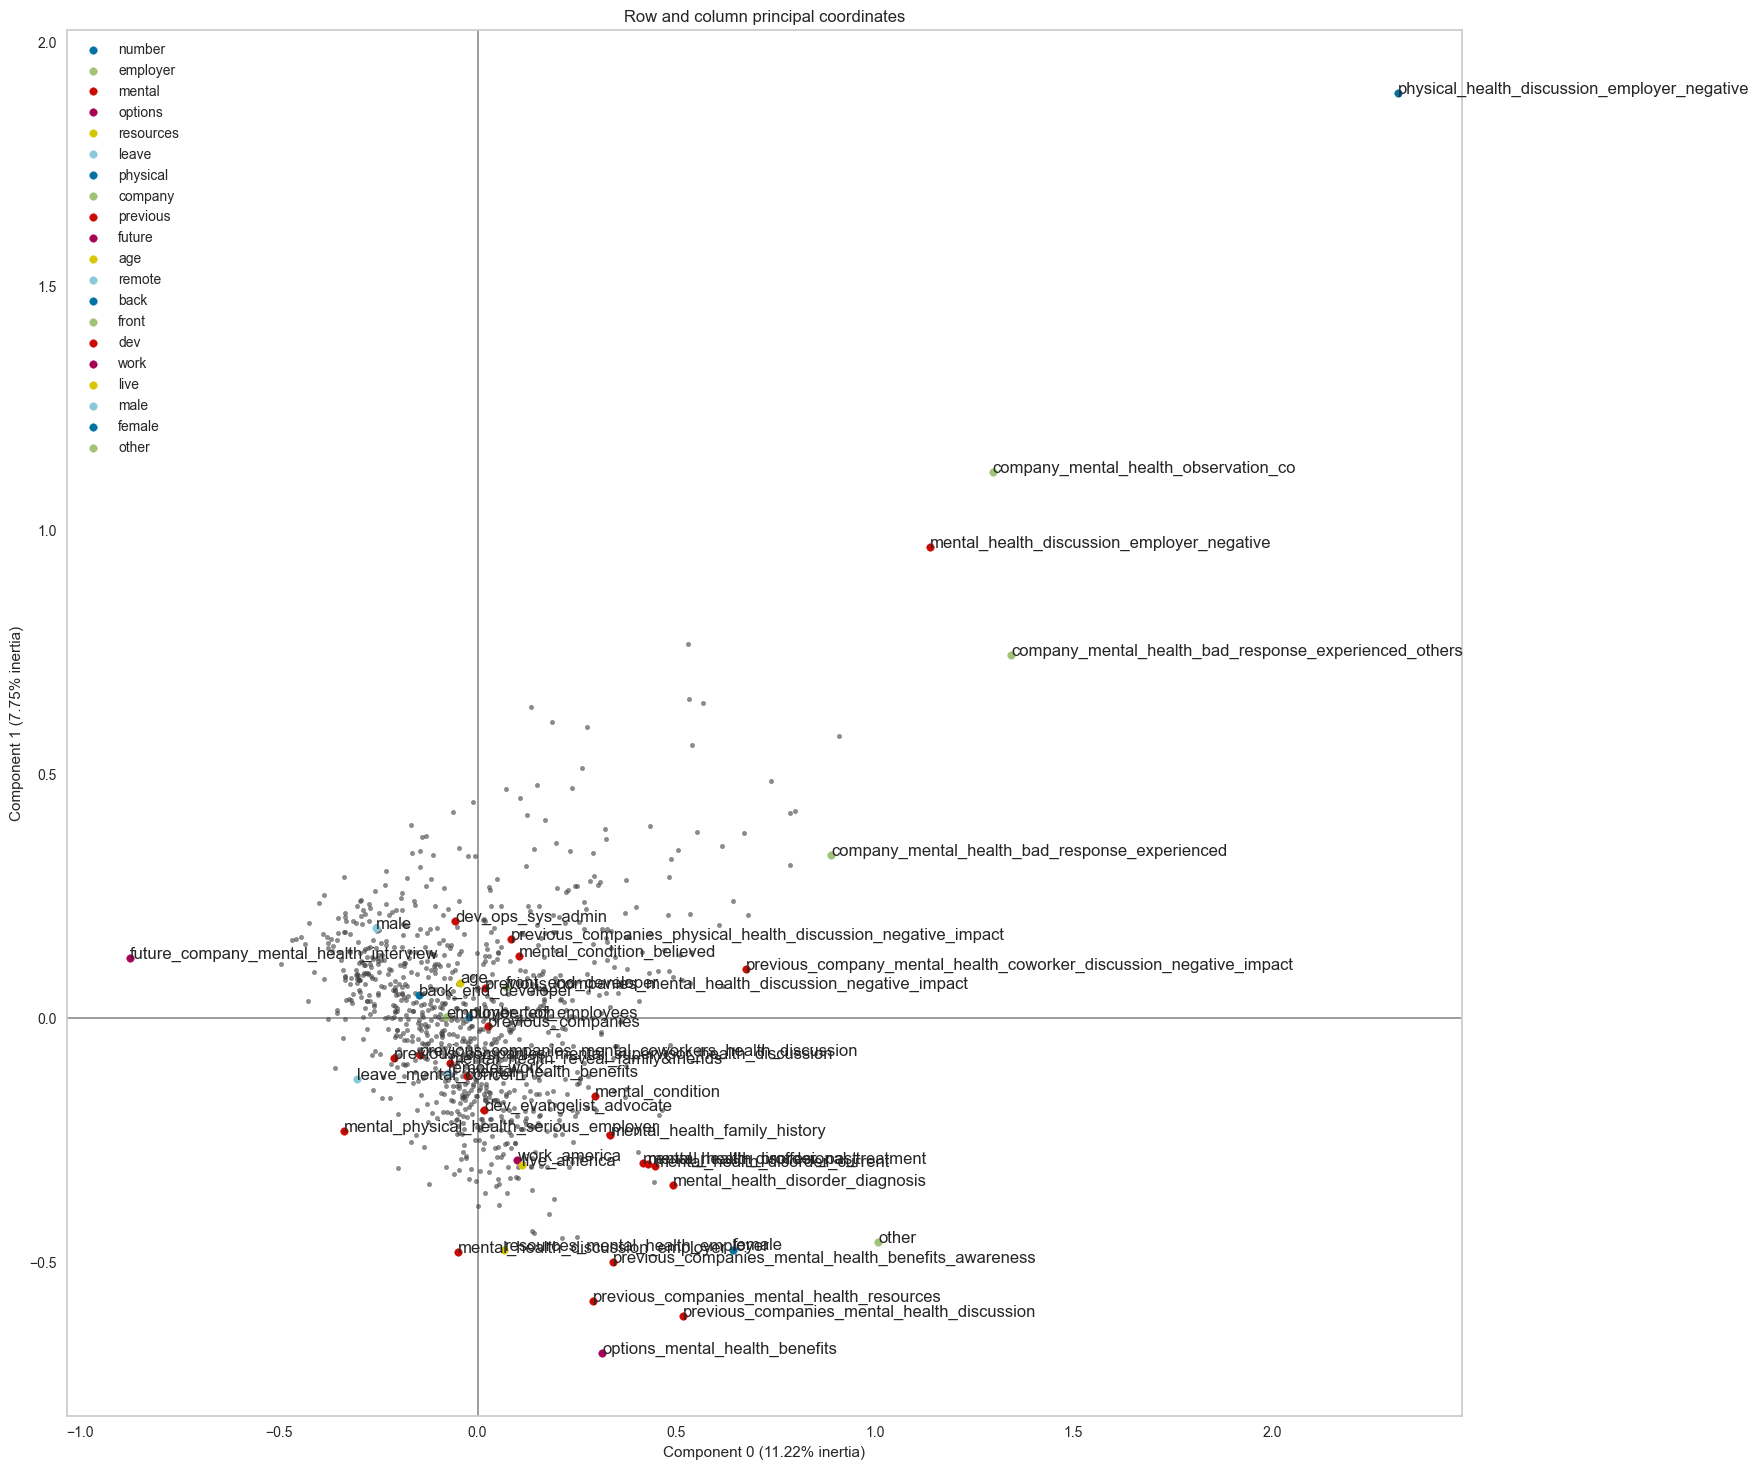

In [134]:
ax = mca.plot_coordinates(X=X,
...     ax=None,
...     figsize=(18, 18),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=True,
...     legend_n_cols=1
... )

In [135]:
# We create a new mca variable from the MCA class with only 20 features
mca = prince.MCA(n_components=25).fit(X)

In [136]:
# We create a new dataframe from the mca variable
df_mca = mca.transform(X)

df_mca.head()

0         1         2         3         4         5         6   \
0 -0.282261  0.107527 -0.045105  0.003335  0.012614 -0.041467 -0.058394   
1  0.018919 -0.359096  0.014178  0.081955 -0.045753  0.094664  0.053789   
2 -0.073338  0.222287  0.248961 -0.017257  0.282478 -0.295218 -0.014100   
3  0.322888  0.050836  0.043998 -0.024287  0.005739 -0.063141  0.048122   
4  0.239039  0.470522  0.186934  0.138154 -0.053090  0.014410  0.252691   

         7         8         9   ...        15        16        17        18  \
0  0.065211 -0.047853  0.010125  ... -0.031052  0.103585  0.056446  0.030121   
1 -0.080400 -0.144581  0.092832  ... -0.144313 -0.104756  0.006759  0.149654   
2 -0.012151 -0.157299 -0.223363  ... -0.020843  0.046117  0.100380  0.028062   
3  0.050710  0.175514 -0.247542  ... -0.080701 -0.046181  0.019165  0.002618   
4  0.129830 -0.003466  0.294022  ...  0.016800  0.003871 -0.168048 -0.082044   

         19        20        21        22        23        24  
0  0.007063  0.084315  0.073340  0.075978 -0.042961  0.045349  
1  0.027074 -0.059005  0.066322  0.150207 -0.001295 -0.099388  
2  0.043642 -0.022191  0.061231 -0.110332 -0.020855 -0.001140  
3  0.180553 -0.048089  0.050021  0.087671  0.047387  0.104753  
4 -0.154777  0.142336 -0.038571 -0.010630 -0.098828 -0.088817  

[5 rows x 25 columns]

In [137]:
mca.total_inertia_ = sum(mca.eigenvalues_)

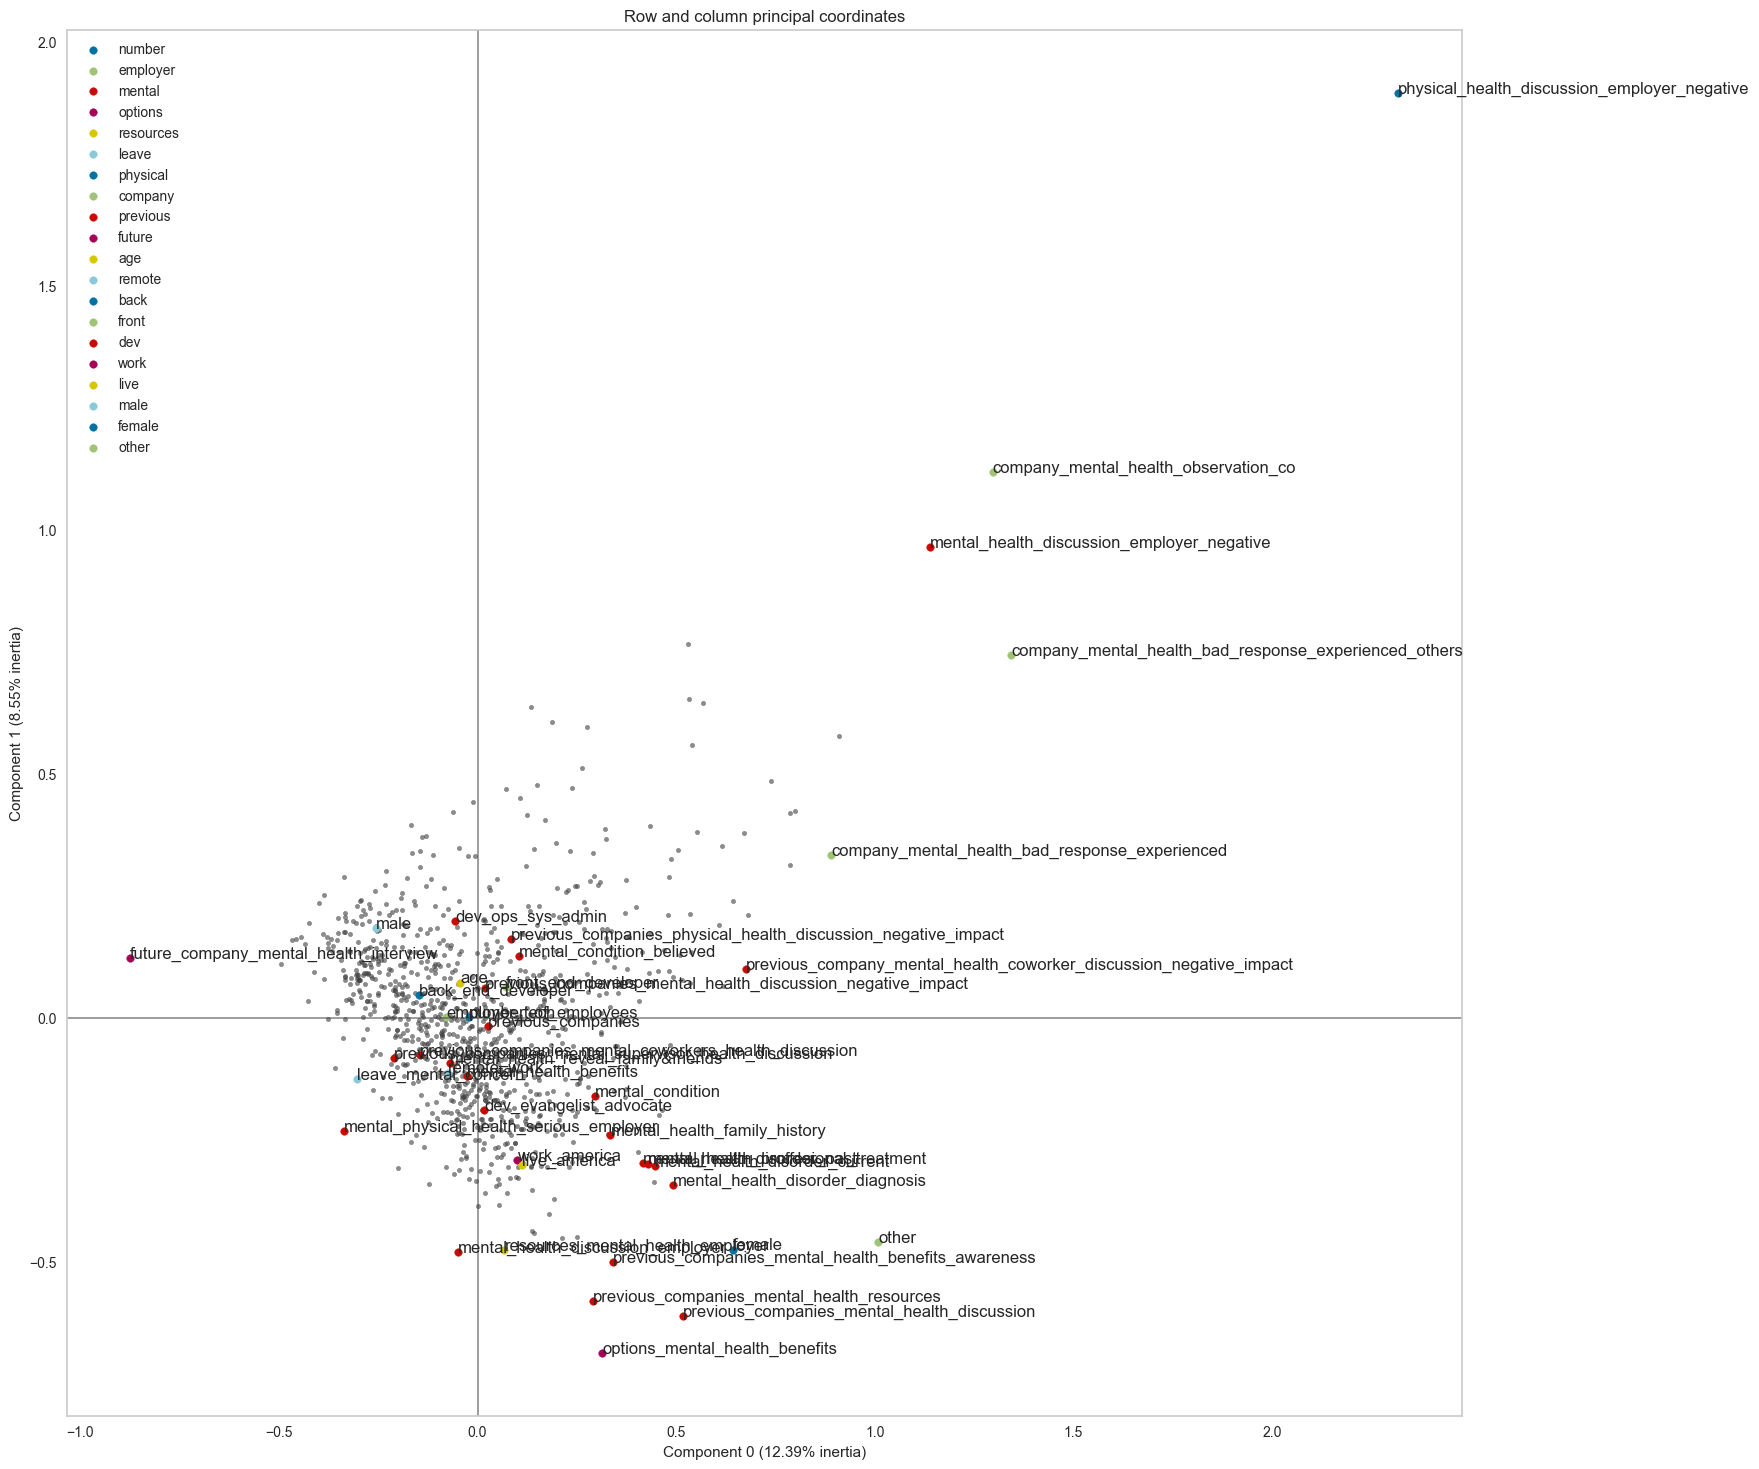

In [138]:
ax = mca.plot_coordinates(X=X,
...     ax=None,
...     figsize=(18, 18),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=True,
...     legend_n_cols=1
... )

In [139]:
# We get all coordinates of ax and store them in a df
coordinates = ax.get_children()[2].get_offsets()

coordinates = pd.DataFrame(coordinates, columns=['x', 'y'])

coordinates.head()

x         y
0 -0.282261  0.107527
1  0.018919 -0.359096
2 -0.073338  0.222287
3  0.322888  0.050836
4  0.239039  0.470522

Text(0, 0.5, 'Second Principal Component')

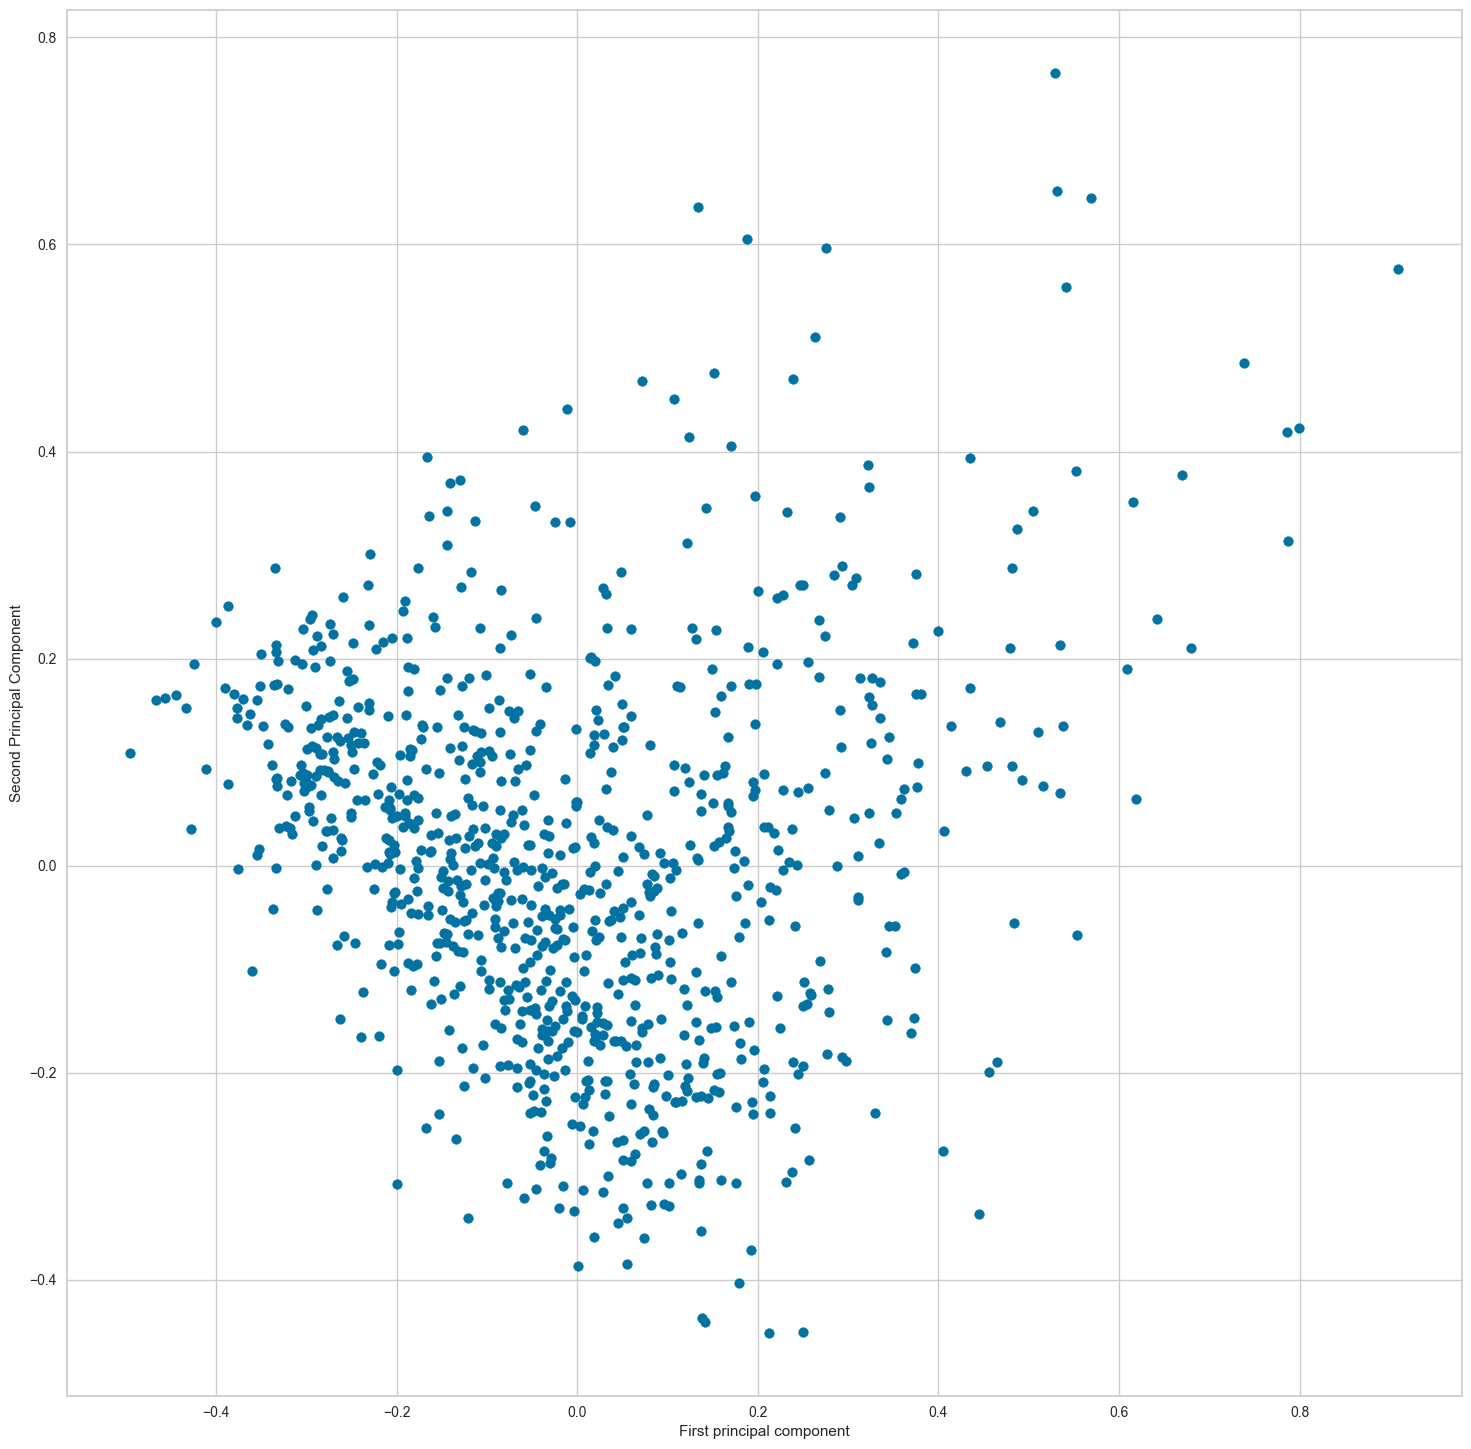

In [140]:
# We plot the coordinates variable on 2 dimensions
plt.figure(figsize=(18,18))
plt.scatter(coordinates['x'],coordinates['y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Clustering

# Cluster Selection

## Elbow Method

In [141]:
# create a k-Means model an Elbow-Visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8), timings=False)

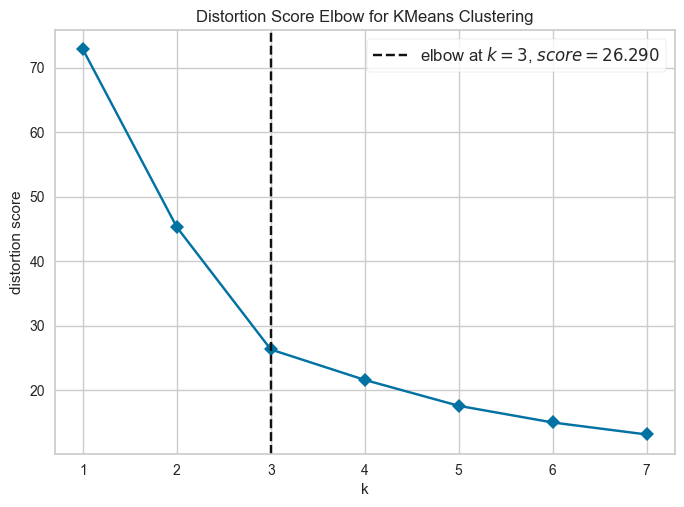

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [142]:
# fit the visualizer and show the plot
visualizer.fit(coordinates)
visualizer.show() 

## Silhouette Score

In [143]:
# We appyl k-Means clustering
model = KMeans(n_clusters=3, random_state=0).fit(coordinates)

In [144]:
# extract labels, i.e. cluster associations
lab=model.labels_

In [145]:
# calculate the overall Silhouette score
S = silhouette_score(coordinates, lab)
print(S)

0.42276984196048406


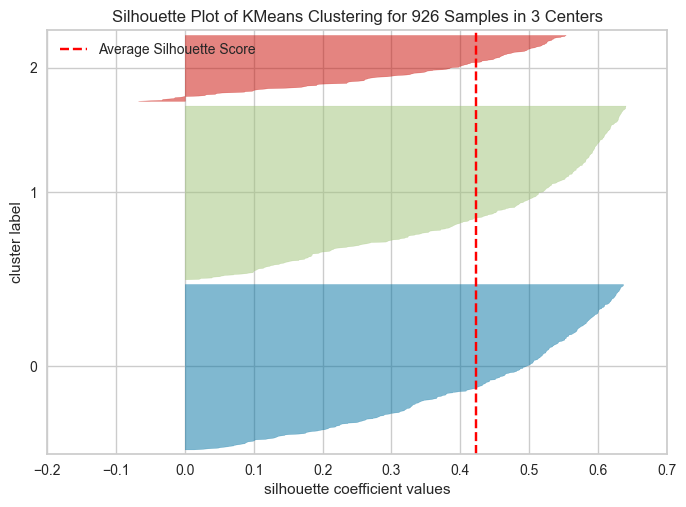

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 926 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [146]:
# generate, fit and show a Silhouette visualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(coordinates) 
visualizer.show()

In [147]:
# We get the "best" results when using 3 clusters and 25 features

## K-Means Clustering

### Cluster Visualization

In [148]:
# clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(coordinates)

In [149]:
print(kmeans.inertia_)

26.29092516923229


In [150]:
# extract centroids of clusters into a dataframe
centers = kmeans.cluster_centers_
centroids = pd.DataFrame(centers,columns=['xpt','ypt'])

In [151]:
# extract cluster labels
lab = kmeans.labels_

In [152]:
lab

array([1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1,
       2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1,

In [153]:
coordinates['lab'] = lab

In [154]:
coordinates

x         y  lab
0   -0.282261  0.107527    1
1    0.018919 -0.359096    0
2   -0.073338  0.222287    1
3    0.322888  0.050836    2
4    0.239039  0.470522    2
..        ...       ...  ...
921 -0.338155  0.097282    1
922  0.135288 -0.304219    0
923 -0.052082 -0.191473    0
924  0.206589  0.036853    2
925  0.158809 -0.087185    0

[926 rows x 3 columns]

In [155]:
radii = [cdist(coordinates[lab == i].iloc[:,[0,1]], [center]).max() for i, center in enumerate(centers)]

In [156]:
print(radii)

[0.43366423691413536, 0.3962388235812539, 0.707755874742479]


Text(0, 0.5, 'Second Principal Component')

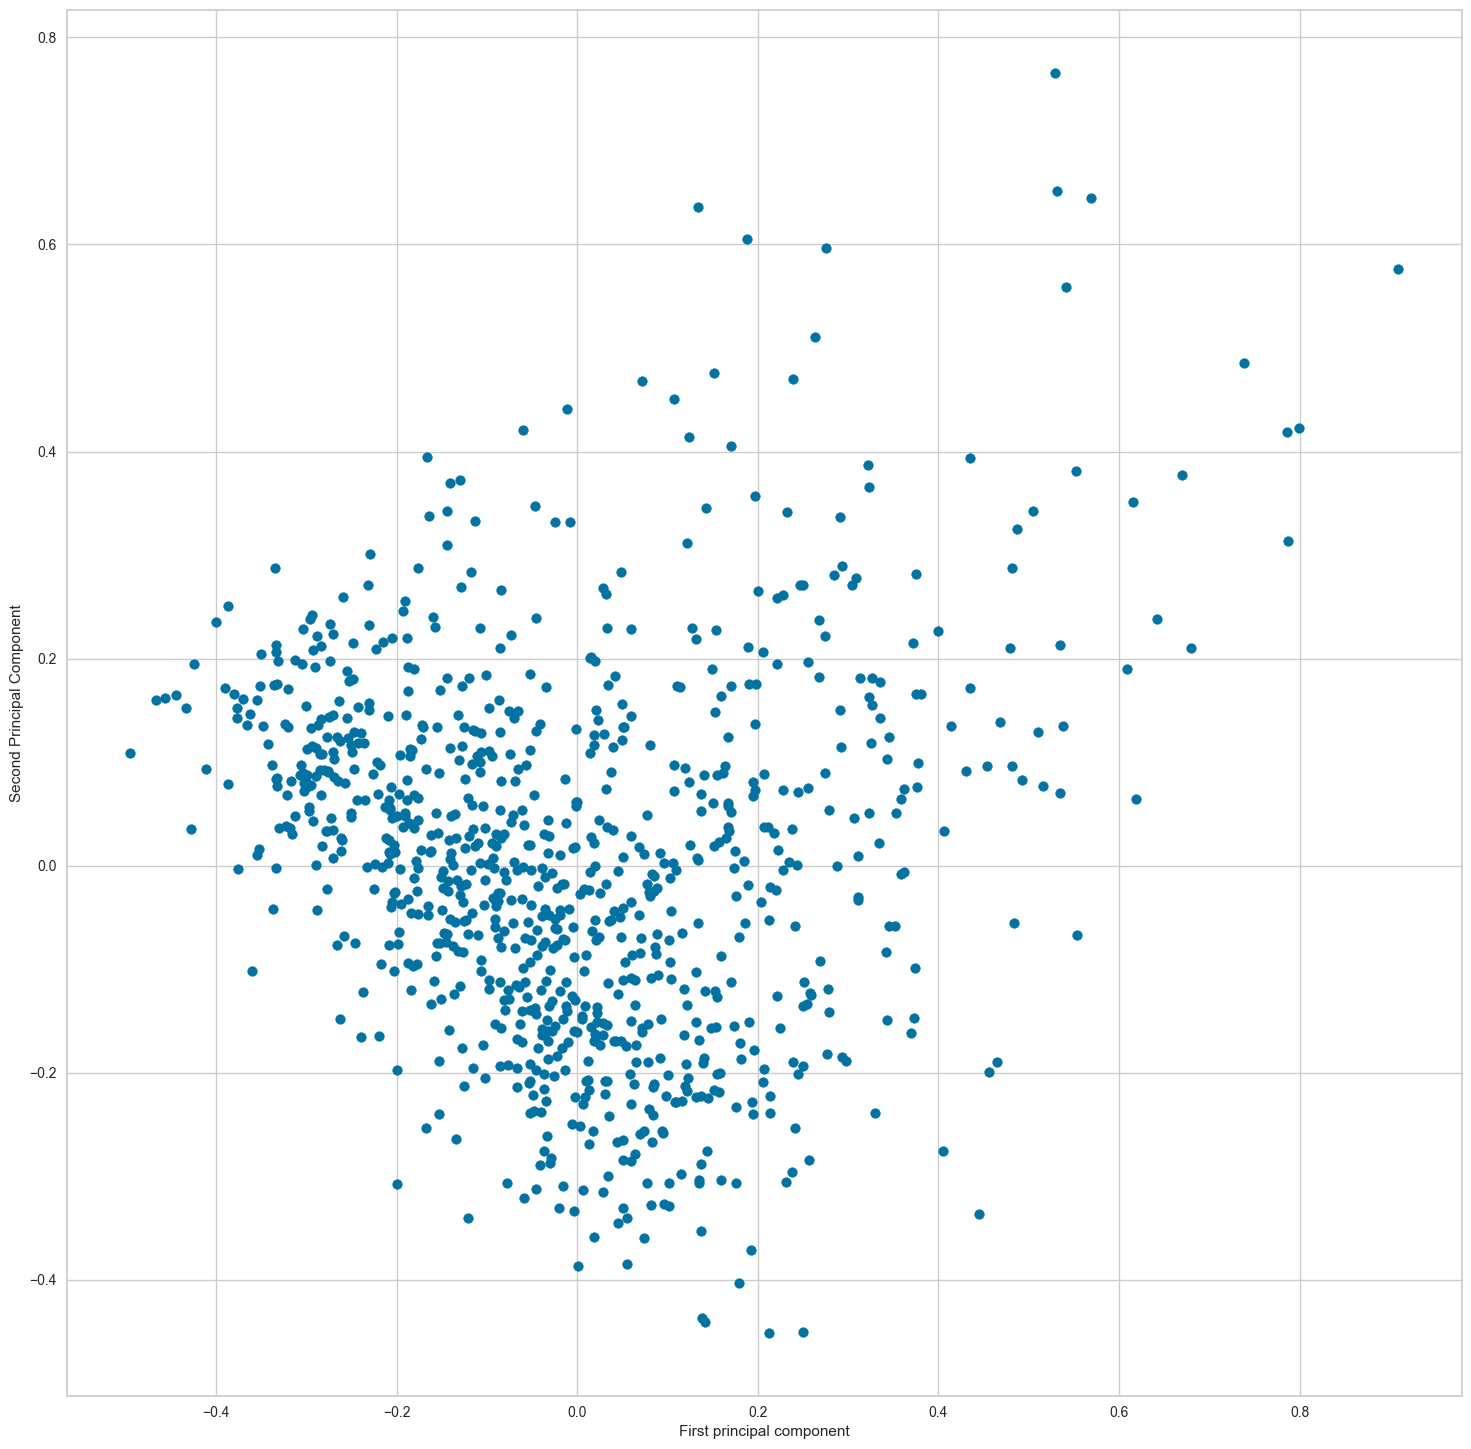

In [157]:
# We plot the coordinates variable on 2 dimensions
plt.figure(figsize=(18,18))
plt.scatter(coordinates['x'],coordinates['y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

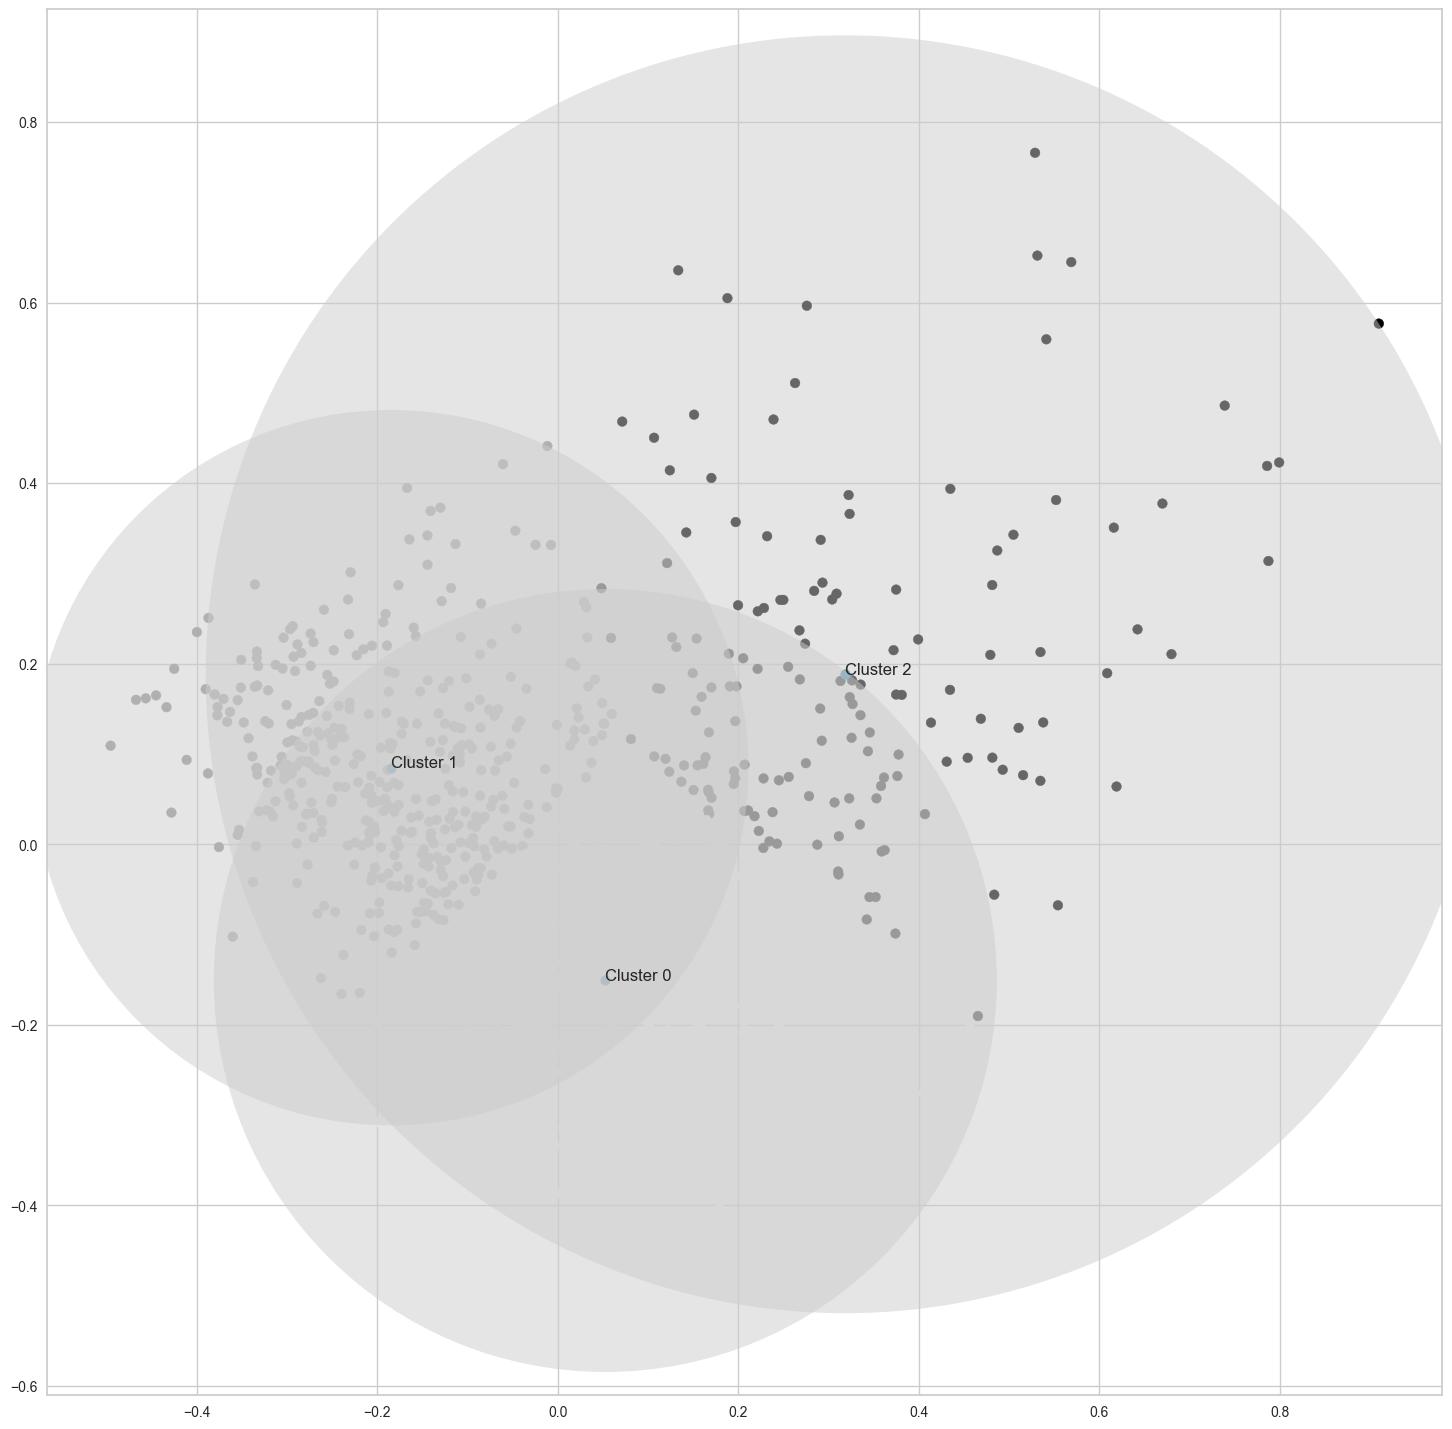

In [158]:
# create a figure and axes
fig, ax = plt.subplots(figsize=(18,18))
# add data points
ax.scatter(x=coordinates['x'], y=coordinates['y'], c=coordinates['lab'])
# add cluster centroids
ax.scatter(centroids['xpt'], centroids['ypt'])
# set the axis scale on both axes equally
ax.axis('equal')
# draw a circle around each cluster centroid
for c, r in zip(centers, radii):
 ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', \
 lw=3, alpha=0.5)) 
# we assign a name to the cluster based on their index
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
# We plot the clusters with their name
for i, txt in enumerate(labels):
    ax.annotate(txt, (centroids['xpt'][i], centroids['ypt'][i]))
# show the plot 
plt.show()

### Number of Data points in Cluster

Text(0, 0.5, 'Number of rows')

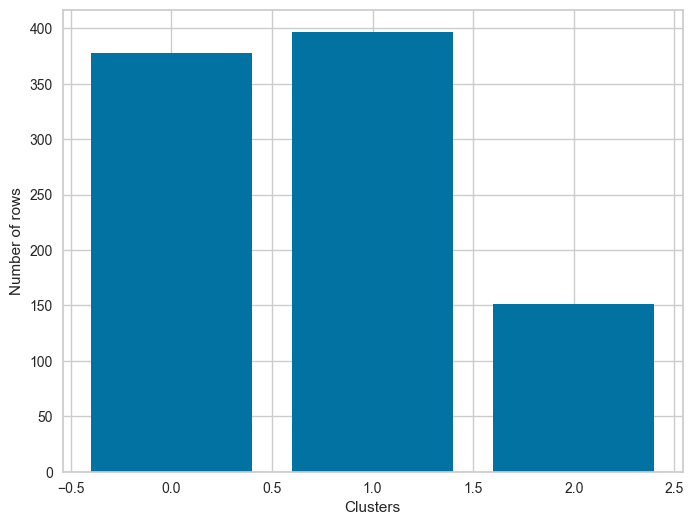

In [159]:
# We create a bar graph for the df where the Y axis is the number of rows belonging to a cluster and the X axis are the clusters
plt.figure(figsize=(8,6))
plt.bar(coordinates['lab'].value_counts().index, coordinates['lab'].value_counts())
plt.xlabel('Clusters')
plt.ylabel('Number of rows')

### Feature Importance

In [160]:
X = df_employed.copy()
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [161]:
### Cluster Analysis
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)


clusters=pd.DataFrame(X,columns=df_employed.columns)
clusters['label']=lab
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

# DF (employed, condition)

# Feature Selection

## Remove Features with Low Variance

In [162]:
df_employed_condition.head()

Unnamed: 0  Are you self-employed?  \
0           0                       0   
1           1                       0   
2           4                       0   
3           7                       0   
4           8                       0   

   How many employees does your company or organization have?  \
0                                                  3            
1                                                  2            
2                                                  2            
3                                                  6            
4                                                  3            

   Is your employer primarily a tech company/organization?  \
0                                                  1         
1                                                  1         
2                                                  0         
3                                                  1         
4                                                  0         

   Is your primary role within your company related to tech/IT?  \
0                                                  1              
1                                                  1              
2                                                  1              
3                                                  1              
4                                                  1              

   Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                  1                                   
1                                                  0                                   
2                                                  1                                   
3                                                  1                                   
4                                                  1                                   

   Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                  0                                                 
1                                                  1                                                 
2                                                  1                                                 
3                                                  1                                                 
4                                                  0                                                 

   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                        
1                                                  1                                                                                        
2                                                  0                                                                                        
3                                                  0                                                                                        
4                                                  0                                                                                        

   Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                  0                                                             
1                                                  1                                                             
2                                                  0                                                             
3                                                  1                                                             
4                             

In [163]:
with pd.option_context("display.max_columns", None):
    display(df_employed_condition.head(1))

Unnamed: 0  Are you self-employed?  \
0           0                       0   

   How many employees does your company or organization have?  \
0                                                  3            

   Is your employer primarily a tech company/organization?  \
0                                                  1         

   Is your primary role within your company related to tech/IT?  \
0                                                  1              

   Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                  1                                   

   Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                  0                                                 

   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                        

   Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                  0                                                             

   If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
0                                                  4                                                             

   Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
0                                                  0                                                            

   Do you think that discussing a physical health issue with your employer would have negative consequences?  \
0                                                  0                                                           

   Do you feel that your employer takes mental health as seriously as physical health?  \
0                                                  1                                     

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     

   Do you know local or online resources to seek help for a mental health disorder?  \
0                                                  0                                  

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?  \
0                                                  0                                                                              

   If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?  \
0                                                  0                                                                              

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?  \
0                                                  0                                                                        

   If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?  \
0                                                  0                                                                        

   Do you believe your productivity is ever affected by a mental health issue?  \
0                                                  0                             

   If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health

In [164]:
# We assign a threshold to the data and fit the df to the threshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df_employed_condition)

VarianceThreshold(threshold=0)

In [165]:
# We check the columns which fullfill the criteria of variance = 0 (True = Not Variance 0, False = Variance 0)
var_thres.get_support()

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

In [166]:
# We drop all columns which have the variance 0
df_employed_condition = df_employed_condition.drop([column for column in df_employed_condition.columns if column not in df_employed_condition.columns[var_thres.get_support()]], axis = 1)

In [167]:
with pd.option_context("display.max_columns", None):
    display(df_employed_condition.head(1))

Unnamed: 0  How many employees does your company or organization have?  \
0           0                                                  3            

   Is your employer primarily a tech company/organization?  \
0                                                  1         

   Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                  1                                   

   Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                  0                                                 

   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                        

   Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                  0                                                             

   If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
0                                                  4                                                             

   Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
0                                                  0                                                            

   Do you think that discussing a physical health issue with your employer would have negative consequences?  \
0                                                  0                                                           

   Do you feel that your employer takes mental health as seriously as physical health?  \
0                                                  1                                     

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     

   Do you have previous employers?  \
0                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  0                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              

   Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
0                                                  1                                                                 

   Do you think that discussing a physical health issue with previous employers would have negative consequences?  \
0                                                  0                                                                

   Would you have been willing to discuss a mental health issue with your previous co-workers?  \
0                                                  1                                             

   Would you have been willing to discuss a mental health issue with your direct supervisor(s)  \
0                                                  1                                             

   Did you hear of or observe negative consequence

In [168]:
df_employed_condition = df_employed_condition.drop(['Unnamed: 0'], axis=1)

In [169]:
df_employed_condition.head()

How many employees does your company or organization have?  \
0                                                  3            
1                                                  2            
2                                                  2            
3                                                  6            
4                                                  3            

   Is your employer primarily a tech company/organization?  \
0                                                  1         
1                                                  1         
2                                                  0         
3                                                  1         
4                                                  0         

   Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                  1                                   
1                                                  0                                   
2                                                  1                                   
3                                                  1                                   
4                                                  1                                   

   Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                  0                                                 
1                                                  1                                                 
2                                                  1                                                 
3                                                  1                                                 
4                                                  0                                                 

   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                        
1                                                  1                                                                                        
2                                                  0                                                                                        
3                                                  0                                                                                        
4                                                  0                                                                                        

   Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                  0                                                             
1                                                  1                                                             
2                                                  0                                                             
3                                                  1                                                             
4                                                  0                                                             

   If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
0                                                  4                                                             
1                                                  3                                                             
2                                                  2                                                             
3                                                  4                                                         

# Renaming of Columns

In [170]:
with pd.option_context("display.max_columns", None):
    display(df_employed_condition.head(1))

How many employees does your company or organization have?  \
0                                                  3            

   Is your employer primarily a tech company/organization?  \
0                                                  1         

   Does your employer provide mental health benefits as part of healthcare coverage?  \
0                                                  1                                   

   Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                  0                                                 

   Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                        

   Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                  0                                                             

   If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
0                                                  4                                                             

   Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
0                                                  0                                                            

   Do you think that discussing a physical health issue with your employer would have negative consequences?  \
0                                                  0                                                           

   Do you feel that your employer takes mental health as seriously as physical health?  \
0                                                  1                                     

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     

   Do you have previous employers?  \
0                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  0                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              

   Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
0                                                  1                                                                 

   Do you think that discussing a physical health issue with previous employers would have negative consequences?  \
0                                                  0                                                                

   Would you have been willing to discuss a mental health issue with your previous co-workers?  \
0                                                  1                                             

   Would you have been willing to discuss a mental health issue with your direct supervisor(s)  \
0                                                  1                                             

   Did you hear of or observe negative consequences for co-workers with me

In [171]:
# Column rename
old_names_employed = df_employed_condition.columns
renamed_columns = ['number_of_employees', 'employer_tech', 'mental_health_benefits', 'options_mental_health_benefits','mental_health_discussion_employer', 
                   'resources_mental_health_employer', 'leave_mental_concern','mental_health_discussion_employer_negative','physical_health_discussion_employer_negative',
                   'mental_physical_health_serious_employer', 'company_mental_health_observation_co', 'previous_companies', 'previous_companies_mental_health_benefits_awareness','previous_companies_mental_health_discussion', 
                   'previous_companies_mental_health_resources', 'previous_companies_mental_health_discussion_negative_impact', 
                   'previous_companies_physical_health_discussion_negative_impact',
                  'previous_companies_mental_coworkers_health_discussion', 'previous_companies_mental_supervisor_health_discussion', 
                'previous_company_mental_health_coworker_discussion_negative_impact','future_company_mental_health_interview',
                  'mental_health_reveal_family&friends', 'company_mental_health_bad_response_experienced', 
                   'company_mental_health_bad_response_experienced_others', 'mental_health_family_history',
                  'mental_health_disorder_past', 'mental_health_disorder_current',
                   'mental_health_disorder_diagnosis', 'mental_health_proffesional_treatment', 'mental_health_interference_treatment','mental_health_interference_no_treatment','age', 'remote_work', 'back_end_developer',
                   'front_end_developer', 'dev_ops_sys_admin', 'dev_evangelist_advocate', 'work_america',
                   'live_america', 'mental_condition_believed', 'male', 'female','other']
    
df_employed_condition.columns = renamed_columns

In [172]:
with pd.option_context("display.max_columns", None):
    display(df_employed_condition.head(1))

number_of_employees  employer_tech  mental_health_benefits  \
0                    3              1                       1   

   options_mental_health_benefits  mental_health_discussion_employer  \
0                               0                                  0   

   resources_mental_health_employer  leave_mental_concern  \
0                                 0                     4   

   mental_health_discussion_employer_negative  \
0                                           0   

   physical_health_discussion_employer_negative  \
0                                             0   

   mental_physical_health_serious_employer  \
0                                        1   

   company_mental_health_observation_co  previous_companies  \
0                                     0                   1   

   previous_companies_mental_health_benefits_awareness  \
0                                                  0     

   previous_companies_mental_health_discussion  \
0                                            0   

   previous_companies_mental_health_resources  \
0                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
0                                                  1             

   previous_companies_physical_health_discussion_negative_impact  \
0                                                  0               

   previous_companies_mental_coworkers_health_discussion  \
0                                                  1       

   previous_companies_mental_supervisor_health_discussion  \
0                                                  1        

   previous_company_mental_health_coworker_discussion_negative_impact  \
0                                                  0                    

   future_company_mental_health_interview  \
0                                       0   

   mental_health_reveal_family&friends  \
0                                    3   

   company_mental_health_bad_response_experienced  \
0                                               0   

   company_mental_health_bad_response_experienced_others  \
0                                                  0       

   mental_health_family_history  mental_health_disorder_past  \
0                             0                            0   

   mental_health_disorder_current  mental_health_disorder_diagnosis  \
0                               0                                 1   

   mental_health_proffesional_treatment  mental_health_interference_treatment  \
0                                     0                                     2   

   mental_health_interference_no_treatment   age  remote_work  \
0                                        3  39.0            1   

   back_end_developer  front_end_developer  dev_ops_sys_admin  \
0                   1                    0                  0   

   dev_evangelist_advocate  work_america  live_america  \
0                        0             0             0   

   mental_condition_believed  male  female  other  
0                          0     1       0      0

# Dimensionality Reduction

## MCA

In [173]:
# We load the dataframe into X
X = df_employed_condition
X.head()

number_of_employees  employer_tech  mental_health_benefits  \
0                    3              1                       1   
1                    2              1                       0   
2                    2              0                       1   
3                    6              1                       1   
4                    3              0                       1   

   options_mental_health_benefits  mental_health_discussion_employer  \
0                               0                                  0   
1                               1                                  1   
2                               1                                  0   
3                               1                                  0   
4                               0                                  0   

   resources_mental_health_employer  leave_mental_concern  \
0                                 0                     4   
1                                 1                     3   
2                                 0                     2   
3                                 1                     4   
4                                 0                     0   

   mental_health_discussion_employer_negative  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           1   

   physical_health_discussion_employer_negative  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             1   

   mental_physical_health_serious_employer  ...  back_end_developer  \
0                                        1  ...                   1   
1                                        1  ...                   1   
2                                        0  ...                   1   
3                                        1  ...                   1   
4                                        0  ...                   1   

   front_end_developer  dev_ops_sys_admin  dev_evangelist_advocate  \
0                    0                  0                        0   
1                    1                  0                        0   
2                    1                  1                        1   
3                    0                  0                        1   
4                    0                  0                        0   

   work_america  live_america  mental_condition_believed  male  female  other  
0             0             0                          0     1       0      0  
1             1             1                          0     1       0      0  
2             1             1                          0     0       1      0  
3             1             1                          0     0       1      0  
4             1             1                          0     0       1      0  

[5 rows x 43 columns]

In [174]:
# We create a variable from the MCA class
mca = prince.MCA(n_components=43).fit(X)

In [175]:
mca.eigenvalues_

[0.03644001390371295,
 0.026971195191273542,
 0.02051306107415091,
 0.019553748397707325,
 0.017793301351278993,
 0.016476133605499654,
 0.015938209436597378,
 0.014946348028332447,
 0.013892541430453549,
 0.013332269457531847,
 0.011879569931185321,
 0.011542659857531602,
 0.010696215068586607,
 0.010180306677925915,
 0.009788466518026458,
 0.008748644023893167,
 0.008114979807222759,
 0.007547626407052574,
 0.00720093681763309,
 0.006864035797190171,
 0.0065474822230825735,
 0.006021510782114156,
 0.005931983771671648,
 0.0055681754028121455,
 0.005502690685435721,
 0.005154892349169381,
 0.004715366520921546,
 0.0045300914288669445,
 0.003746940357728238,
 0.0035744824314756034,
 0.0031612454207912257,
 0.0025071962060783026,
 0.0022761338274458285,
 0.002166174456157653,
 0.001866990713622531,
 0.0013954760402332105,
 0.0011793501851819362,
 0.000990458640209281,
 0.0002666016731186166,
 0.00015616347380870428,
 0.00012645029272672113,
 4.8473821874659104e-05,
 4.1233373894476165e-

In [176]:
# We calculate the sum of mca.eigenvalues_
sum(mca.eigenvalues_)

0.3558545934873129

In [177]:
mca.total_inertia_ = sum(mca.eigenvalues_)

In [178]:
mca.total_inertia_

0.3558545934873129

In [179]:
mca.explained_inertia_

[0.10240141498977764,
 0.07579274143115741,
 0.05764450269736999,
 0.054948703081458085,
 0.05000160649018956,
 0.046300185263976563,
 0.04478854489527789,
 0.042001278898386125,
 0.039039938460001505,
 0.03746549771039326,
 0.03338321367378628,
 0.0324364503614118,
 0.030057824921593864,
 0.028608051896030585,
 0.027506927540547375,
 0.024584884343231268,
 0.02280420136690487,
 0.021209860839752417,
 0.02023561575267349,
 0.01928887788105759,
 0.018399319112108094,
 0.016921267541060526,
 0.01666968441671426,
 0.015647333221822424,
 0.015463312223991022,
 0.014485951406871936,
 0.013250823811804077,
 0.012730175503631523,
 0.01052941405366972,
 0.010044783731597503,
 0.008883531303647291,
 0.007045563699229557,
 0.006396246863473404,
 0.0060872460150915055,
 0.005246498844728539,
 0.003921478226704309,
 0.003314135061808561,
 0.0027833240271060134,
 0.0007491871061884203,
 0.0004388406856809954,
 0.0003553425894760282,
 0.00013621805861665045,
 1.158714111019231e-31]

Text(0, 0.5, 'Explained Inertia')

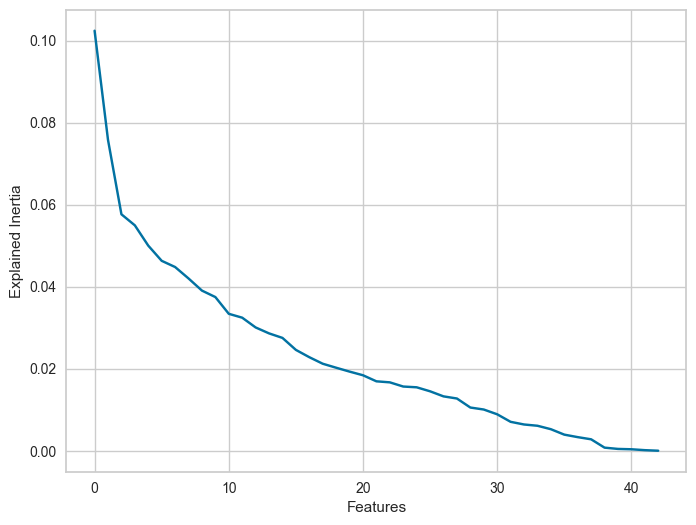

In [180]:
# We plot the mca.explained_intertia_
plt.figure(figsize=(8,6))
plt.plot(mca.explained_inertia_)
plt.xlabel('Features')
plt.ylabel('Explained Inertia')

In [181]:
# We calculate the sum of mca.explained_inertia_ that reaches above the value 0.9
sum(mca.explained_inertia_[0:26]) # We can explain about 90% of our data with 25 features

0.9080871904175458

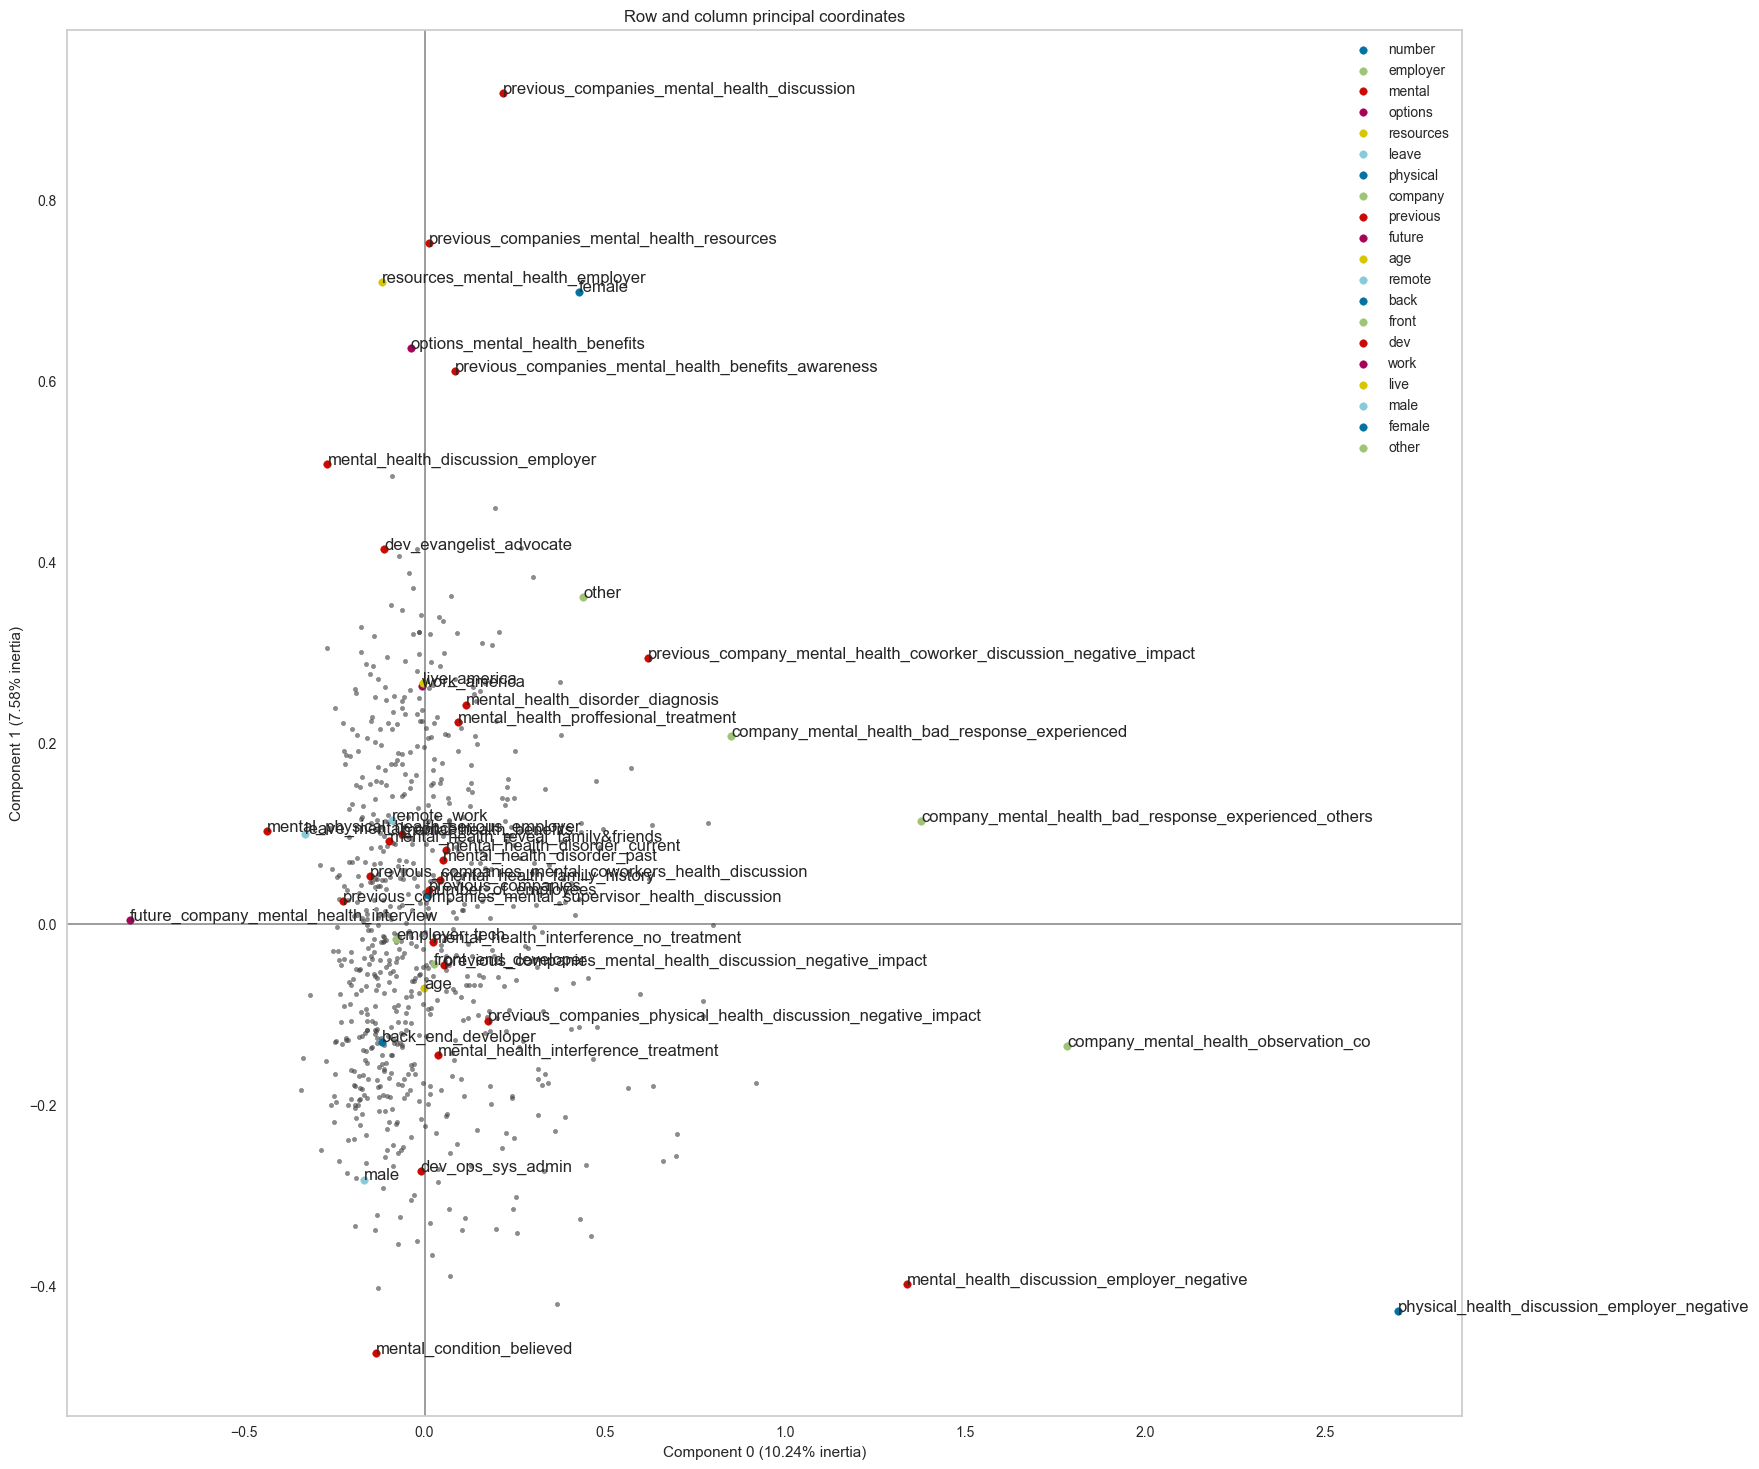

In [182]:
ax = mca.plot_coordinates(X=X,
...     ax=None,
...     figsize=(18, 18),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=True,
...     legend_n_cols=1
... )

In [183]:
# We create a new mca variable from the MCA class with only 20 features
mca = prince.MCA(n_components=26).fit(X)

In [184]:
# We create a new dataframe from the mca variable
df_mca = mca.transform(X)

df_mca.head()

0         1         2         3         4         5         6   \
0 -0.211509 -0.199796 -0.001847  0.021270 -0.029984 -0.035324 -0.031621   
1 -0.192884  0.259134  0.012815  0.005273 -0.115175  0.006518  0.102062   
2  0.265047  0.072652 -0.014093 -0.033361  0.038291  0.041562 -0.070202   
3 -0.010557  0.340893 -0.035658 -0.019761 -0.005464  0.102317 -0.038625   
4  0.412543 -0.065731  0.110096 -0.316001 -0.053326  0.190705  0.142336   

         7         8         9   ...        16        17        18        19  \
0  0.096424 -0.019486 -0.025071  ...  0.076921 -0.058824  0.089536 -0.008051   
1 -0.115159 -0.085692 -0.111650  ... -0.025617  0.109411 -0.048800 -0.001819   
2  0.127622  0.059819  0.266810  ... -0.015466 -0.012091 -0.031703  0.076256   
3  0.092160  0.097486  0.191143  ...  0.025063 -0.149571  0.057446  0.055644   
4  0.182766  0.159570 -0.107295  ...  0.026231 -0.000734 -0.099560 -0.037070   

         20        21        22        23        24        25  
0  0.080288  0.036558  0.047039  0.048301 -0.085234 -0.025793  
1  0.015924 -0.066335  0.022515  0.156217 -0.074425 -0.075055  
2  0.138657  0.013215  0.116747  0.085081 -0.045478  0.103612  
3  0.058969  0.047291 -0.059185 -0.006088 -0.042533 -0.007213  
4  0.048610  0.016450  0.041916  0.010562 -0.034266  0.154307  

[5 rows x 26 columns]

In [185]:
mca.total_inertia_ = sum(mca.eigenvalues_)

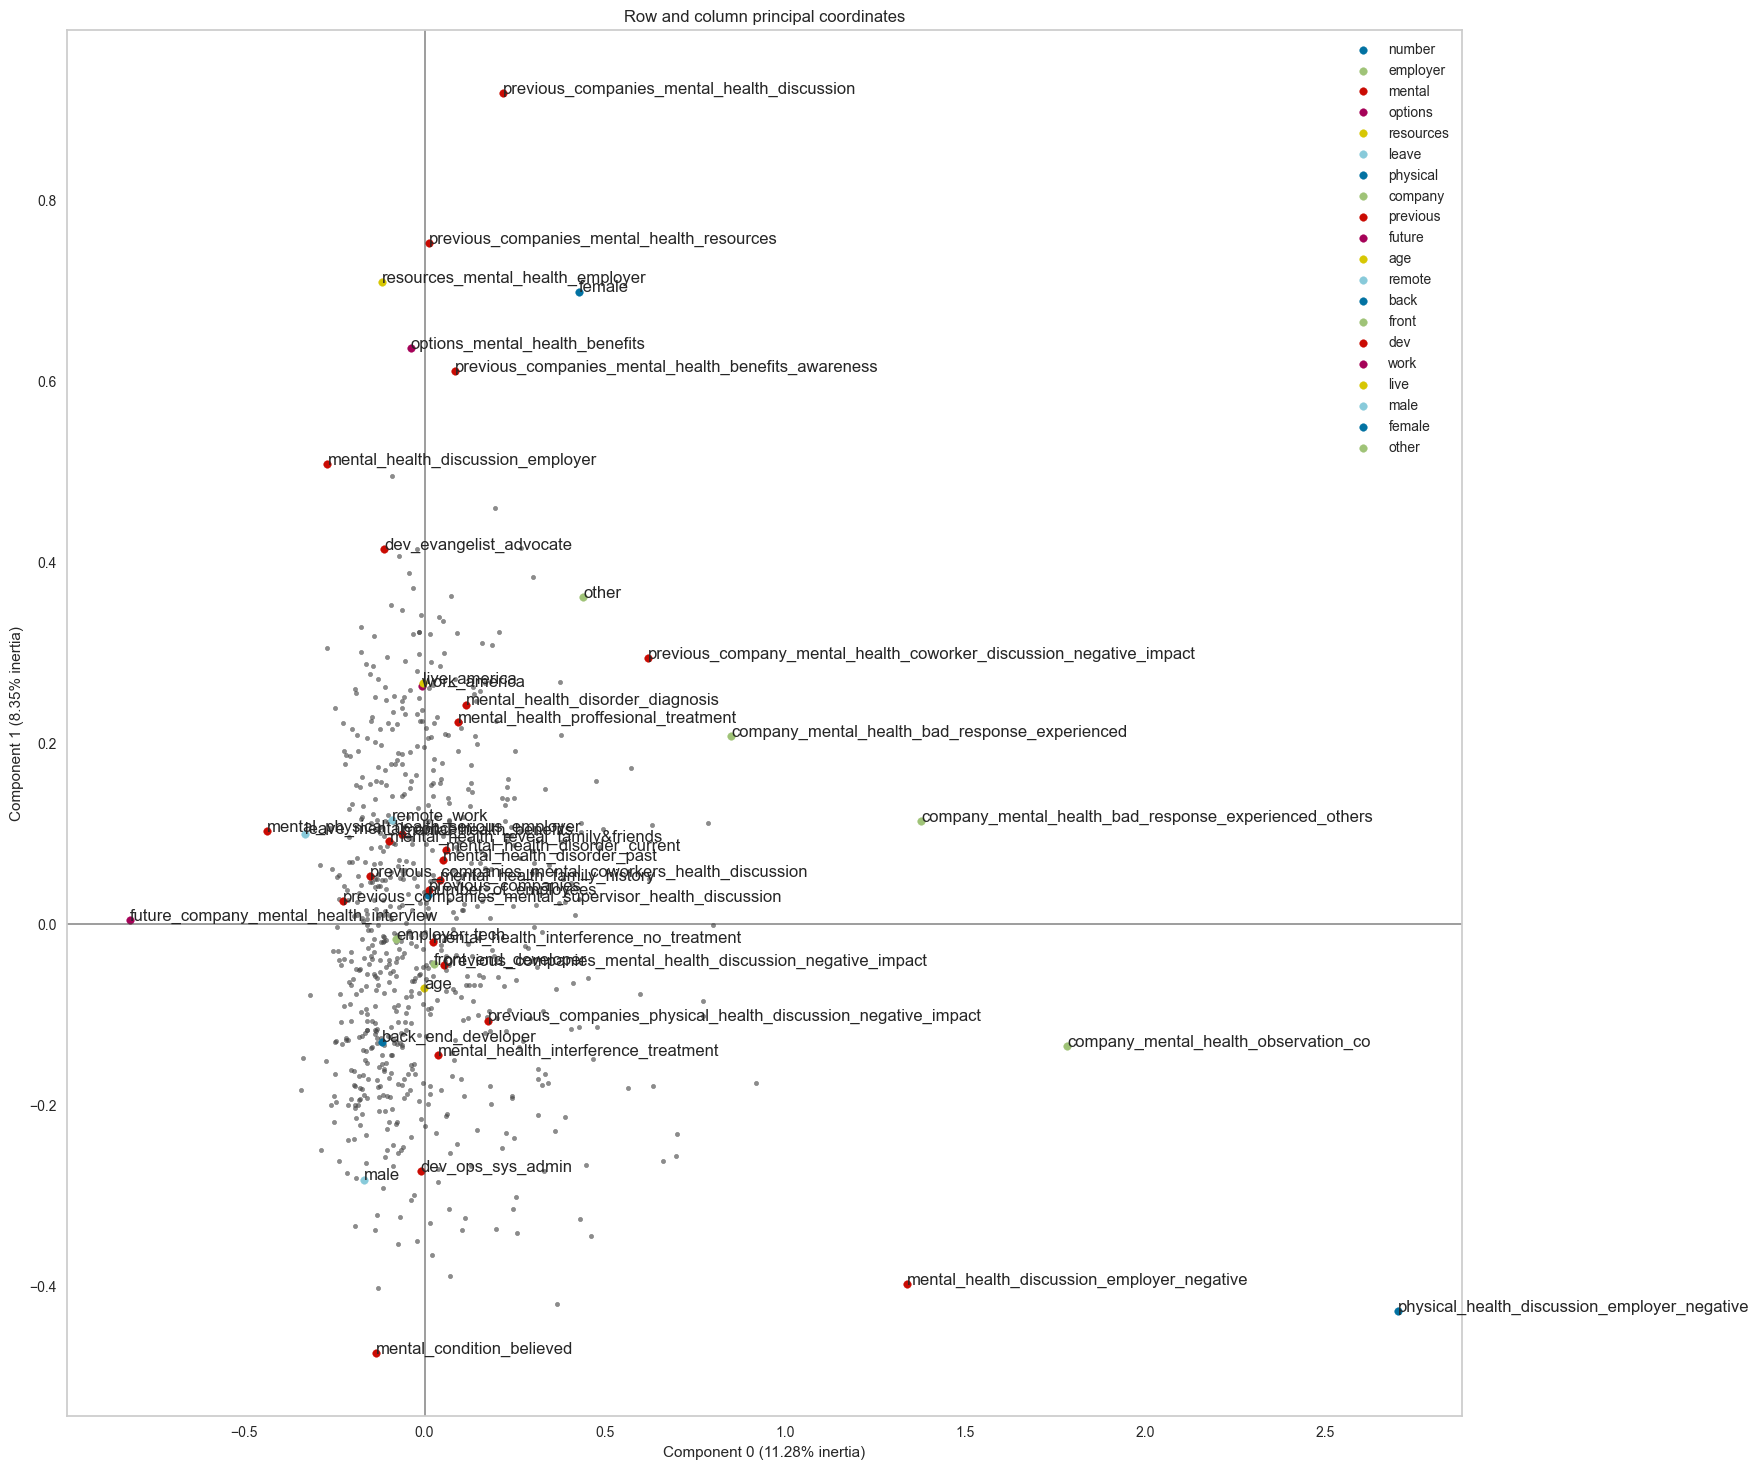

In [186]:
ax = mca.plot_coordinates(X=X,
...     ax=None,
...     figsize=(18, 18),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=True,
...     legend_n_cols=1
... )

In [187]:
# We get all coordinates of ax and store them in a df
coordinates = ax.get_children()[2].get_offsets()

coordinates = pd.DataFrame(coordinates, columns=['x', 'y'])

coordinates.head()

x         y
0 -0.211509 -0.199796
1 -0.192884  0.259134
2  0.265047  0.072652
3 -0.010557  0.340893
4  0.412543 -0.065731

Text(0, 0.5, 'Second Principal Component')

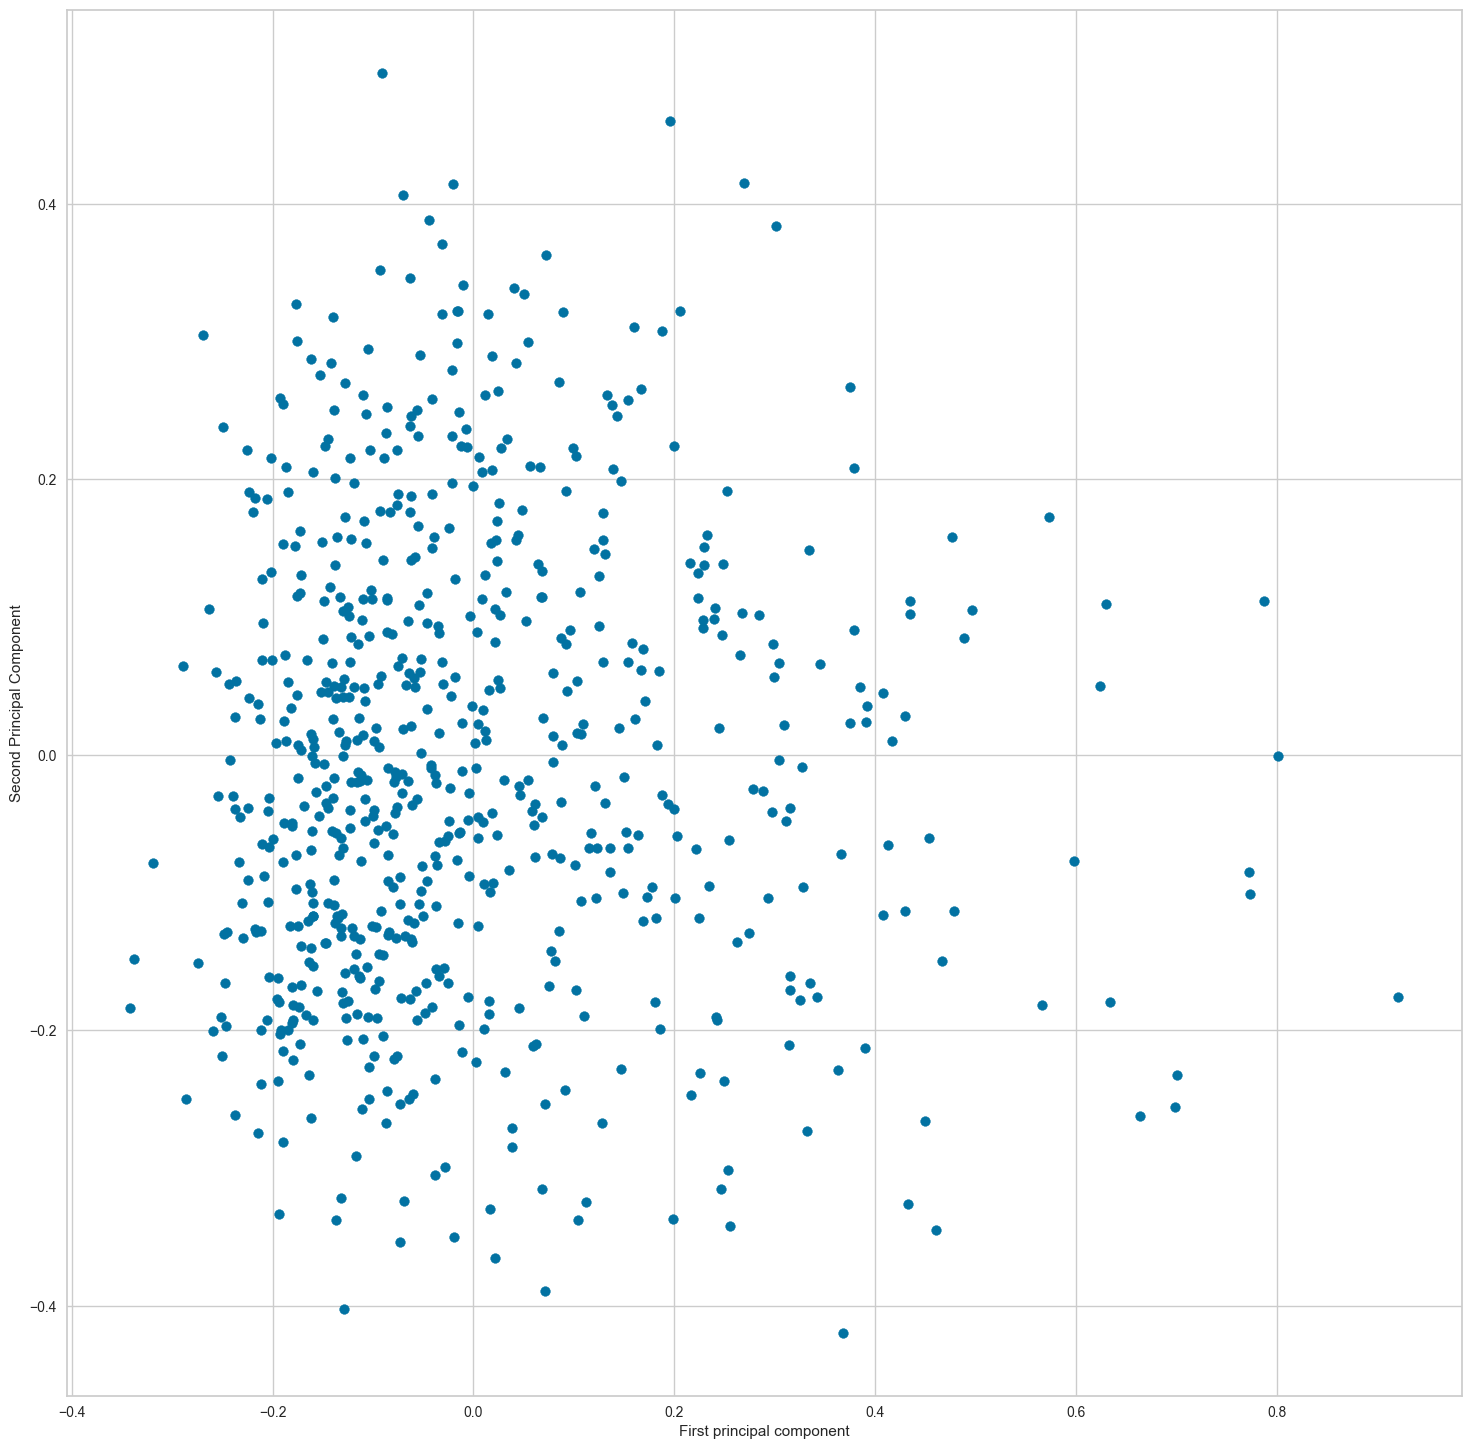

In [188]:
# We plot the coordinates variable on 2 dimensions
plt.figure(figsize=(18,18))
plt.scatter(coordinates['x'],coordinates['y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Clustering

# Cluster Selection

## Elbow Method

In [189]:
# create a k-Means model an Elbow-Visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8), timings=False)

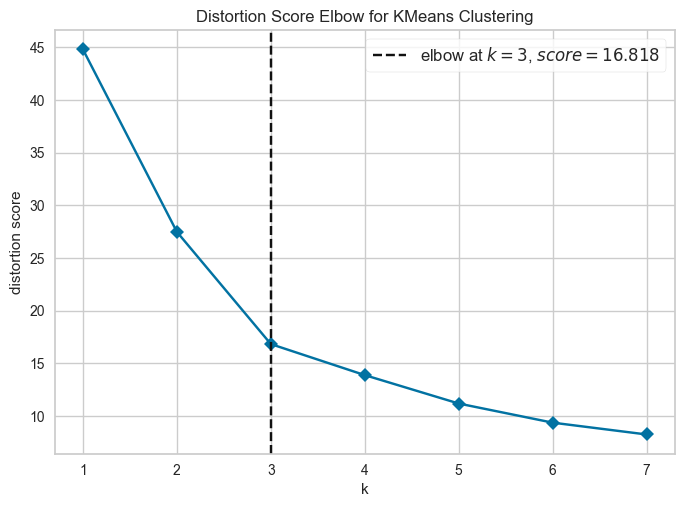

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [190]:
# fit the visualizer and show the plot
visualizer.fit(coordinates)
visualizer.show() 

## Silhouette Score

In [191]:
# We appyl k-Means clustering
model = KMeans(n_clusters=3, random_state=0).fit(coordinates)

In [192]:
# extract labels, i.e. cluster associations
lab=model.labels_

In [193]:
# calculate the overall Silhouette score
S = silhouette_score(coordinates, lab)
print(S)

0.40220925789766104


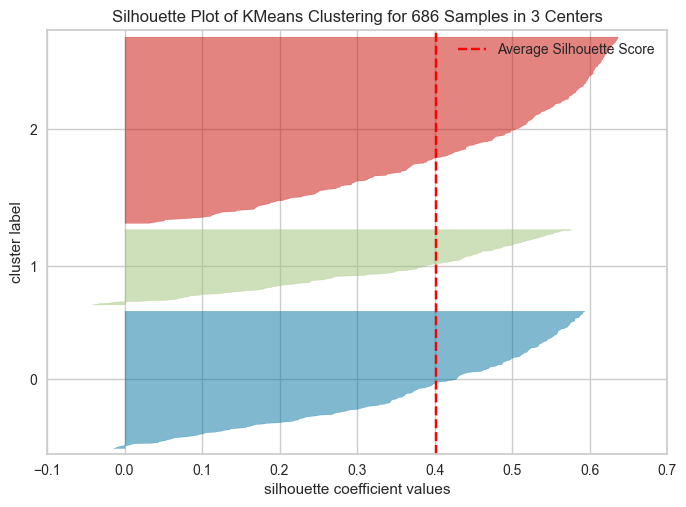

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 686 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [194]:
# generate, fit and show a Silhouette visualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(coordinates) 
visualizer.show()

In [195]:
# We get the "best" results when using 3 clusters and 26 features

## K-Means Clustering

### Cluster Visualization

In [196]:
# clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(coordinates)

In [197]:
print(kmeans.inertia_)

16.81825370033551


In [198]:
# extract centroids of clusters into a dataframe
centers = kmeans.cluster_centers_
centroids = pd.DataFrame(centers,columns=['xpt','ypt'])

In [199]:
# extract cluster labels
lab = kmeans.labels_

In [200]:
lab

array([2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2,
       1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 2,
       0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2,
       0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0,
       0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0,
       2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,

In [201]:
coordinates['lab'] = lab

In [202]:
coordinates

x         y  lab
0   -0.211509 -0.199796    2
1   -0.192884  0.259134    0
2    0.265047  0.072652    1
3   -0.010557  0.340893    0
4    0.412543 -0.065731    1
..        ...       ...  ...
681  0.064123  0.138929    0
682 -0.055422  0.231632    0
683 -0.201442  0.132694    0
684  0.166399  0.061333    1
685  0.078787  0.059487    0

[686 rows x 3 columns]

In [203]:
radii = [cdist(coordinates[lab == i].iloc[:,[0,1]], [center]).max() for i, center in enumerate(centers)]

In [204]:
print(radii)

[0.404834706951607, 0.6142902864557545, 0.32406858151720674]


Text(0, 0.5, 'Second Principal Component')

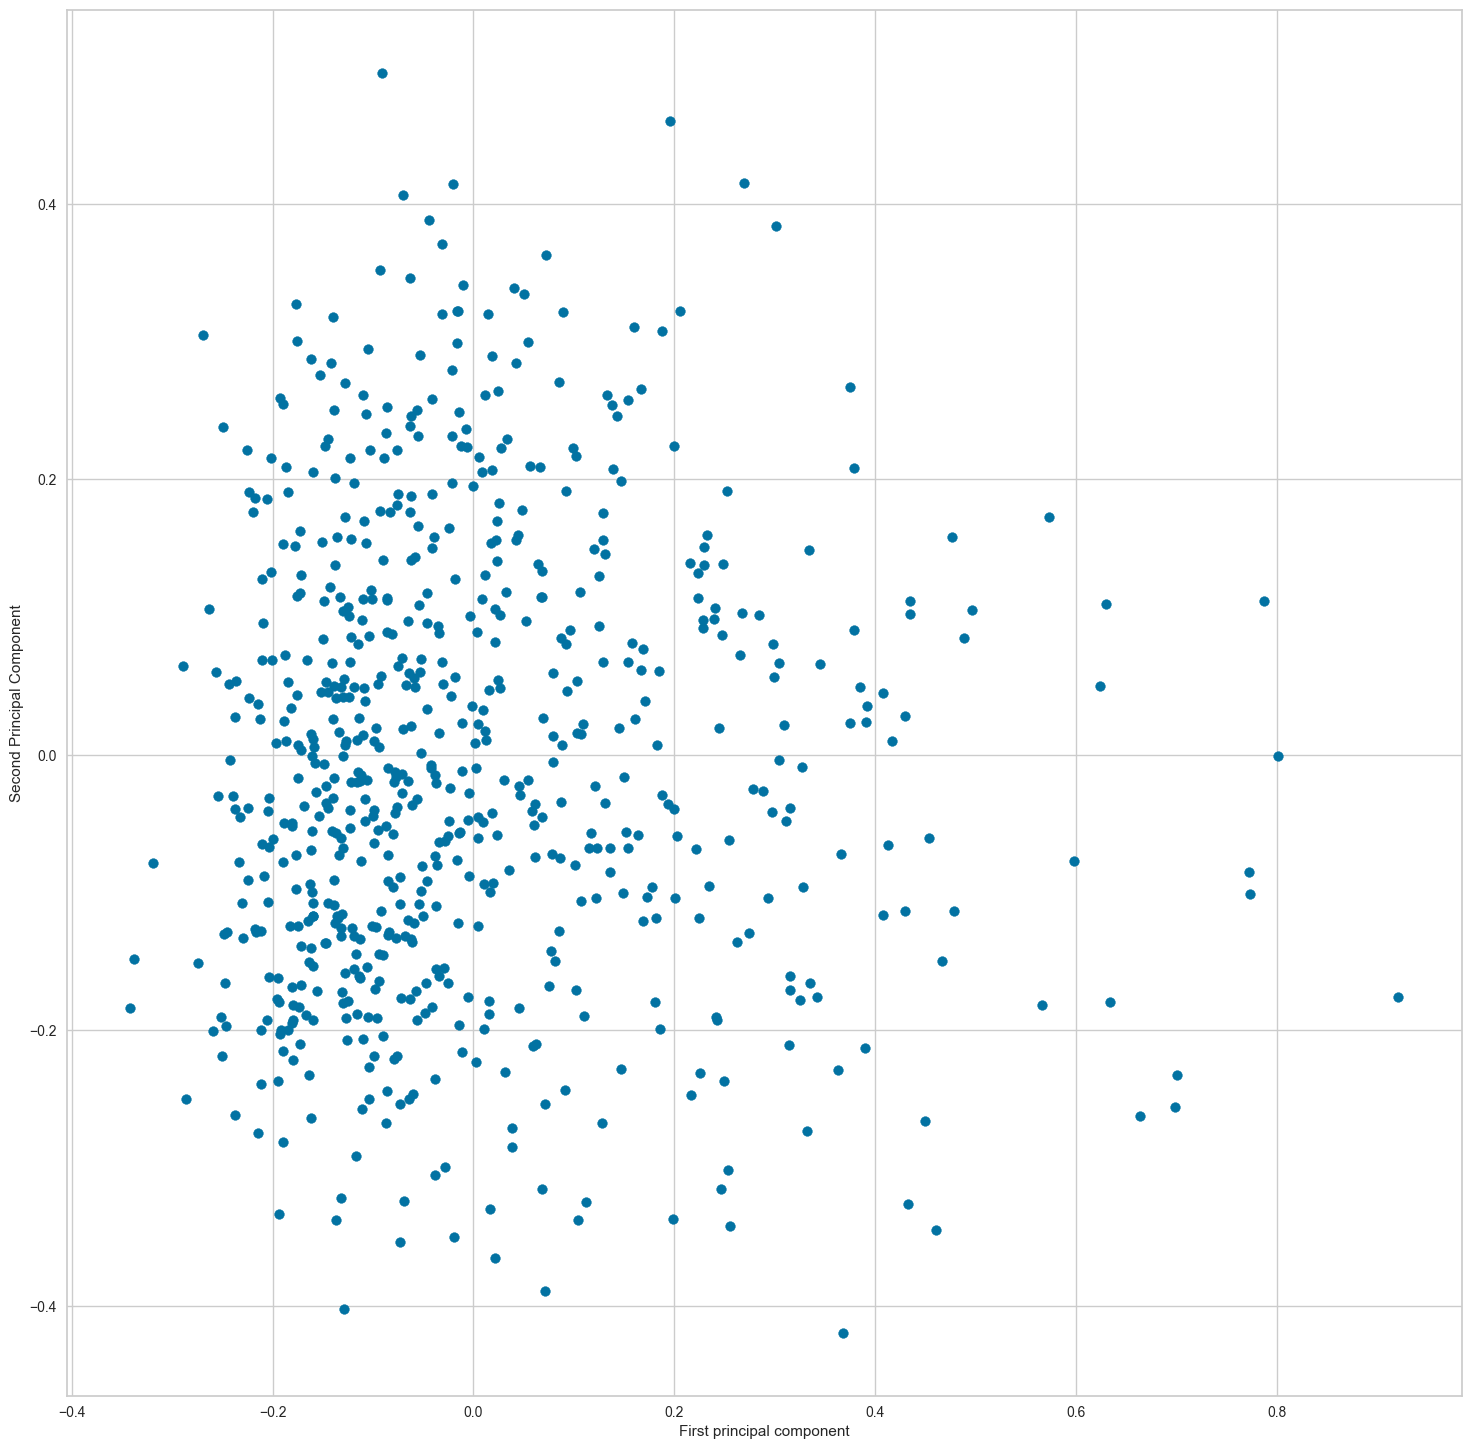

In [205]:
# We plot the coordinates variable on 2 dimensions
plt.figure(figsize=(18,18))
plt.scatter(coordinates['x'],coordinates['y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

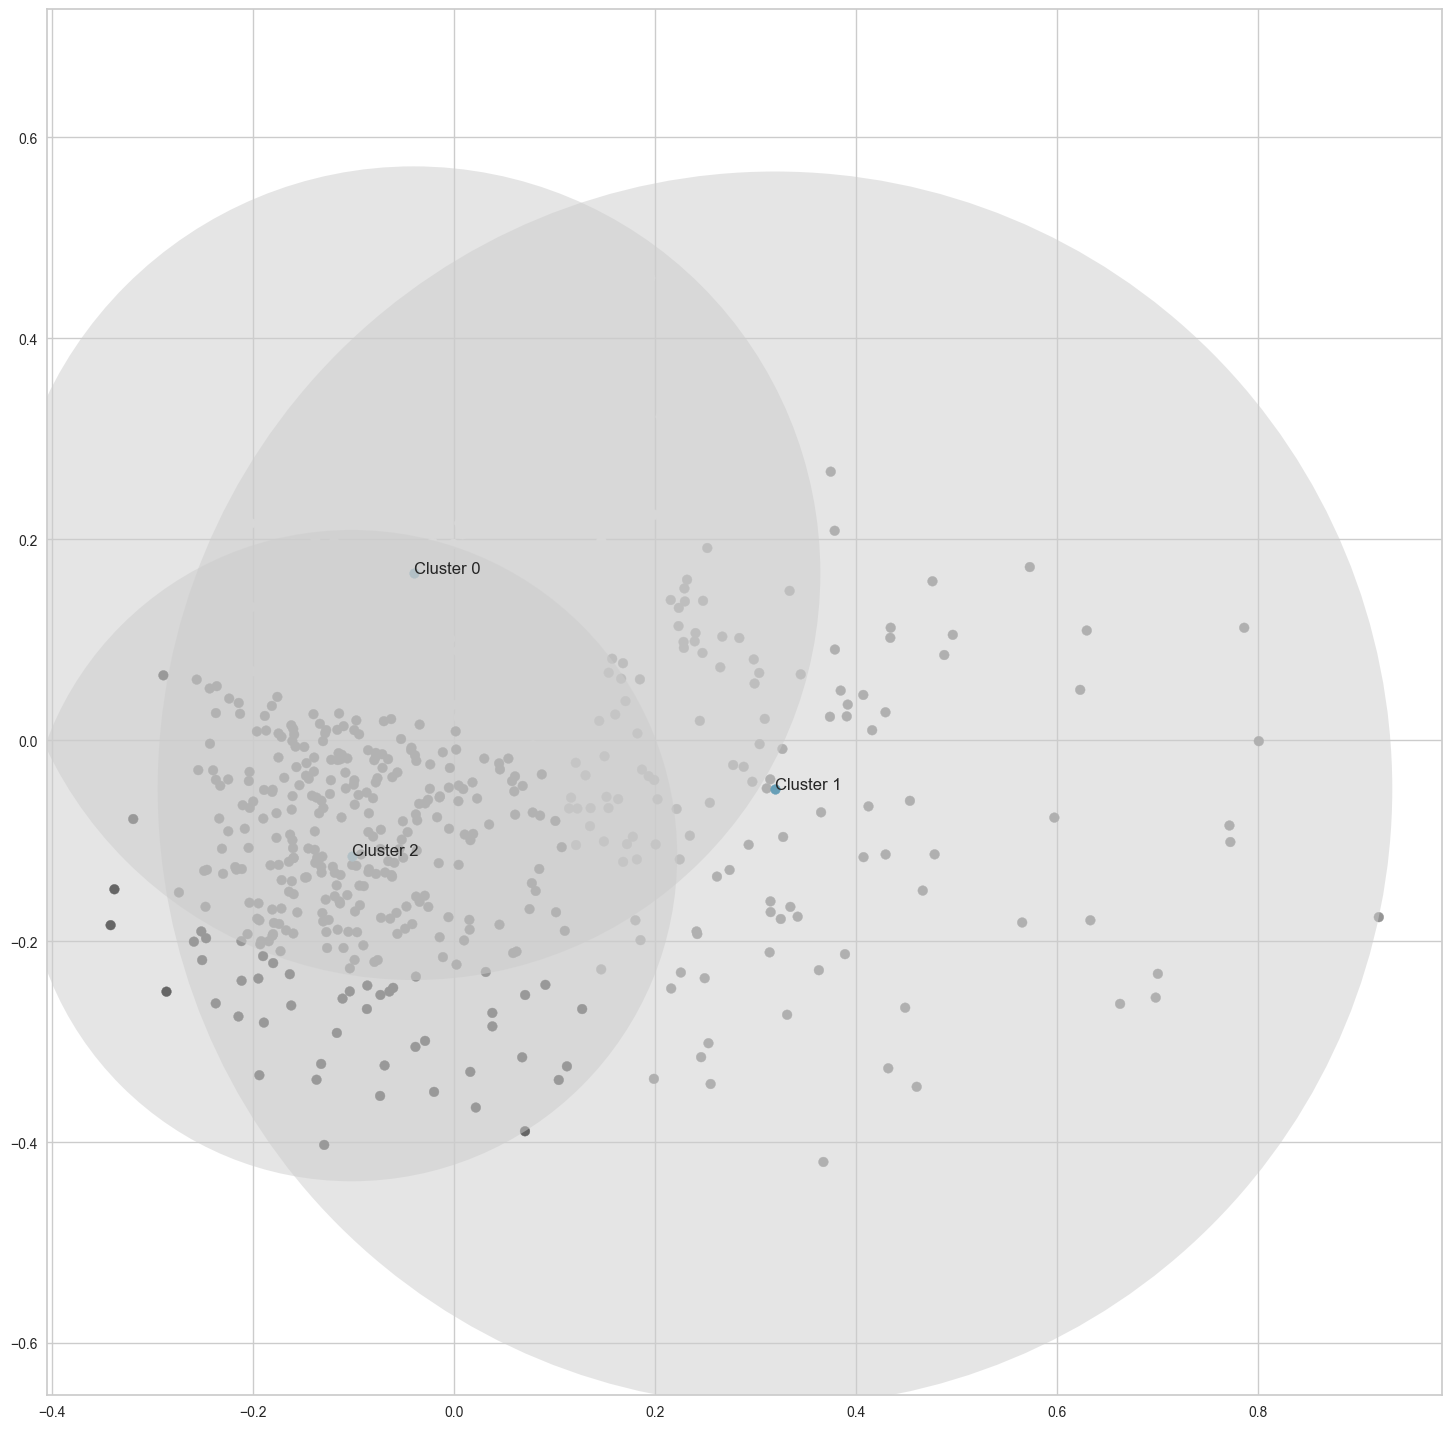

In [206]:
# create a figure and axes
fig, ax = plt.subplots(figsize=(18,18))
# add data points
ax.scatter(x=coordinates['x'], y=coordinates['y'], c=coordinates['lab'])
# add cluster centroids
ax.scatter(centroids['xpt'], centroids['ypt'])
# set the axis scale on both axes equally
ax.axis('equal')
# draw a circle around each cluster centroid
for c, r in zip(centers, radii):
 ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', \
 lw=3, alpha=0.5)) 
# we assign a name to the cluster based on their index
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
# We plot the clusters with their name
for i, txt in enumerate(labels):
    ax.annotate(txt, (centroids['xpt'][i], centroids['ypt'][i]))
# show the plot 
plt.show()

### Number of Data points in Cluster

Text(0, 0.5, 'Number of rows')

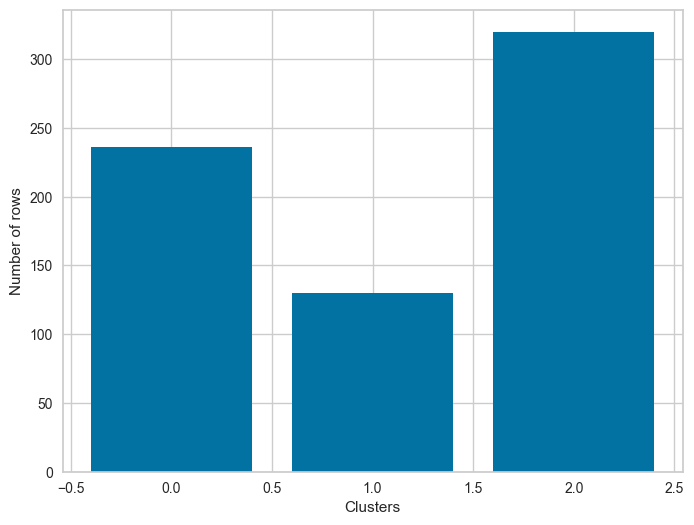

In [207]:
# We create a bar graph for the df where the Y axis is the number of rows belonging to a cluster and the X axis are the clusters
plt.figure(figsize=(8,6))
plt.bar(coordinates['lab'].value_counts().index, coordinates['lab'].value_counts())
plt.xlabel('Clusters')
plt.ylabel('Number of rows')

### Feature Importance

In [208]:
X = df_employed_condition.copy()
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [209]:
### Cluster Analysis
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)


clusters=pd.DataFrame(X,columns=df_employed_condition.columns)
clusters['label']=lab
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

# DF (self-employed, condition)

# Feature Selection

## Remove Features with Low Variance

In [210]:
df_self_employed_condition.head()

Unnamed: 0  Are you self-employed?  \
0           9                       1   
1          40                       1   
2          43                       1   
3          63                       1   
4          76                       1   

   How many employees does your company or organization have?  \
0                                                  1            
1                                                  1            
2                                                  1            
3                                                  1            
4                                                  1            

   Is your primary role within your company related to tech/IT?  \
0                                                  1              
1                                                  1              
2                                                  1              
3                                                  1              
4                                                  1              

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     
1                                                  0                                                                                     
2                                                  0                                                                                     
3                                                  0                                                                                     
4                                                  0                                                                                     

   Do you know local or online resources to seek help for a mental health disorder?  \
0                                                  1                                  
1                                                  1                                  
2                                                  1                                  
3                                                  1                                  
4                                                  1                                  

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?  \
0                                                  0                                                                              
1                                                  0                                                                              
2                                                  0                                                                              
3                                                  0                                                                              
4                                                  0                                                                              

   If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?  \
0                                                  0                                                                              
1                                                  1                                                                              
2                                                  0                                                                              
3                                                  0                                                                              
4                                                  1                                                                              

   If you have been diagnosed or tre

In [211]:
with pd.option_context("display.max_columns", None):
    display(df_self_employed_condition.head(1))

Unnamed: 0  Are you self-employed?  \
0           9                       1   

   How many employees does your company or organization have?  \
0                                                  1            

   Is your primary role within your company related to tech/IT?  \
0                                                  1              

   Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?  \
0                                                  0                                                                                     

   Do you know local or online resources to seek help for a mental health disorder?  \
0                                                  1                                  

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?  \
0                                                  0                                                                              

   If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?  \
0                                                  0                                                                              

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?  \
0                                                  1                                                                        

   If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?  \
0                                                  0                                                                        

   Do you believe your productivity is ever affected by a mental health issue?  \
0                                                  1                             

   If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?  \
0                                                  1                                                                                      

   Do you have previous employers?  \
0                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  1                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              

   Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
0                                                  1                                                                 

   Do you think that discussing a physical health issue with previous employers would have negative consequences?  \
0                                                  1                                                                

   Would you have been willing to discuss a mental health issue with your previous co-workers?  \
0                                                  1                                             

   Would you have been willing to discuss a mental health issue with your direct supervisor(s)  \
0                                                  1                                             

   Did you hear of or observe negative consequences for co-workers with mental health issu

In [212]:
# We assign a threshold to the data and fit the df to the threshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df_self_employed_condition)

VarianceThreshold(threshold=0)

In [213]:
# We check the columns which fullfill the criteria of variance = 0 (True = Not Variance 0, False = Variance 0)
var_thres.get_support()

array([ True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

In [214]:
# We drop all columns which have the variance 0
df_self_employed_condition = df_self_employed_condition.drop([column for column in df_self_employed_condition.columns if column not in df_self_employed_condition.columns[var_thres.get_support()]], axis = 1)

In [215]:
with pd.option_context("display.max_columns", None):
    display(df_self_employed_condition.head(1))

Unnamed: 0  \
0           9   

   Do you know local or online resources to seek help for a mental health disorder?  \
0                                                  1                                  

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?  \
0                                                  0                                                                              

   If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?  \
0                                                  0                                                                              

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?  \
0                                                  1                                                                        

   If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?  \
0                                                  0                                                                        

   Do you believe your productivity is ever affected by a mental health issue?  \
0                                                  1                             

   If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?  \
0                                                  1                                                                                      

   Do you have previous employers?  \
0                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  1                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              

   Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
0                                                  1                                                                 

   Do you think that discussing a physical health issue with previous employers would have negative consequences?  \
0                                                  1                                                                

   Would you have been willing to discuss a mental health issue with your previous co-workers?  \
0                                                  1                                             

   Would you have been willing to discuss a mental health issue with your direct supervisor(s)  \
0                                                  1                                             

   Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?  \
0                                                  0                                                                        

   Would you bring up a mental health issue with a potential employer in an interview?  \
0                                                  0                                     

   How willing would you be to share with friends and family that you have a mental illness?  \
0                                                  4                                           

   Have you observed or experienced an unsupportive or b

In [216]:
df_self_employed_condition = df_self_employed_condition.drop(['Unnamed: 0'], axis=1)

In [217]:
df_self_employed_condition.head()

Do you know local or online resources to seek help for a mental health disorder?  \
0                                                  1                                  
1                                                  1                                  
2                                                  1                                  
3                                                  1                                  
4                                                  1                                  

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?  \
0                                                  0                                                                              
1                                                  0                                                                              
2                                                  0                                                                              
3                                                  0                                                                              
4                                                  0                                                                              

   If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?  \
0                                                  0                                                                              
1                                                  1                                                                              
2                                                  0                                                                              
3                                                  0                                                                              
4                                                  1                                                                              

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?  \
0                                                  1                                                                        
1                                                  1                                                                        
2                                                  1                                                                        
3                                                  0                                                                        
4                                                  0                                                                        

   If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?  \
0                                                  0                                                                        
1                                                  0                                                                        
2                                                  0                                                                        
3                                                  0                                                                        
4                                                  0                                                                        

   Do you believe your productivity is ever affected by a mental health issue?  \
0                                                  1                             
1                                                  1                             
2                                                  1                             
3                                                  0                        

# Renaming of Columns

In [218]:
with pd.option_context("display.max_columns", None):
    display(df_self_employed_condition.head(1))

Do you know local or online resources to seek help for a mental health disorder?  \
0                                                  1                                  

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?  \
0                                                  0                                                                              

   If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?  \
0                                                  0                                                                              

   If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?  \
0                                                  1                                                                        

   If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?  \
0                                                  0                                                                        

   Do you believe your productivity is ever affected by a mental health issue?  \
0                                                  1                             

   If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?  \
0                                                  1                                                                                      

   Do you have previous employers?  \
0                                1   

   Were you aware of the options for mental health care provided by your previous employers?  \
0                                                  1                                           

   Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?  \
0                                                  0                                                                                   

   Did your previous employers provide resources to learn more about mental health issues and how to seek help?  \
0                                                  0                                                              

   Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
0                                                  1                                                                 

   Do you think that discussing a physical health issue with previous employers would have negative consequences?  \
0                                                  1                                                                

   Would you have been willing to discuss a mental health issue with your previous co-workers?  \
0                                                  1                                             

   Would you have been willing to discuss a mental health issue with your direct supervisor(s)  \
0                                                  1                                             

   Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?  \
0                                                  0                                                                        

   Would you bring up a mental health issue with a potential employer in an interview?  \
0                                                  0                                     

   How willing would you be to share with friends and family that you have a mental illness?  \
0                                                  4                                           

   Have you observed or experienced an unsupportive or badly handled response to a mental h

In [219]:
# Column rename
old_names_employed = df_self_employed_condition.columns
renamed_columns = [ 'resources_mental_health_employer', 'mental_health_reveal_client','mental_health_reveal_client_impact', 
                   'mental_health_reveal_coworkers_employees', 'mental_health_reveal_coworkers_employees_impact',
                   'mental_health_productivity', 'mental_health_productivity_impact',
                   'previous_companies', 'previous_companies_mental_health_benefits_awareness','previous_companies_mental_health_discussion', 
                   'previous_companies_mental_health_resources', 'previous_companies_mental_health_discussion_negative_impact', 
                   'previous_companies_physical_health_discussion_negative_impact',
                  'previous_companies_mental_coworkers_health_discussion', 'previous_companies_mental_supervisor_health_discussion', 
                'previous_company_mental_health_coworker_discussion_negative_impact','future_company_mental_health_interview',
                  'mental_health_reveal_family&friends', 'company_mental_health_bad_response_experienced', 
                   'company_mental_health_bad_response_experienced_others', 'mental_health_family_history',
                  'mental_health_disorder_past', 'mental_health_disorder_current',
                   'mental_health_disorder_diagnosis', 'mental_health_proffesional_treatment', 'mental_health_interference_treatment','mental_health_interference_no_treatment','age', 'remote_work', 'back_end_developer',
                   'front_end_developer', 'dev_ops_sys_admin', 'dev_evangelist_advocate', 'work_america',
                   'live_america', 'mental_condition_believed', 'male', 'female','other']
    
df_self_employed_condition.columns = renamed_columns

In [220]:
with pd.option_context("display.max_columns", None):
    display(df_self_employed_condition.head(1))

resources_mental_health_employer  mental_health_reveal_client  \
0                                 1                            0   

   mental_health_reveal_client_impact  \
0                                   0   

   mental_health_reveal_coworkers_employees  \
0                                         1   

   mental_health_reveal_coworkers_employees_impact  \
0                                                0   

   mental_health_productivity  mental_health_productivity_impact  \
0                           1                                  1   

   previous_companies  previous_companies_mental_health_benefits_awareness  \
0                   1                                                  1     

   previous_companies_mental_health_discussion  \
0                                            0   

   previous_companies_mental_health_resources  \
0                                           0   

   previous_companies_mental_health_discussion_negative_impact  \
0                                                  1             

   previous_companies_physical_health_discussion_negative_impact  \
0                                                  1               

   previous_companies_mental_coworkers_health_discussion  \
0                                                  1       

   previous_companies_mental_supervisor_health_discussion  \
0                                                  1        

   previous_company_mental_health_coworker_discussion_negative_impact  \
0                                                  0                    

   future_company_mental_health_interview  \
0                                       0   

   mental_health_reveal_family&friends  \
0                                    4   

   company_mental_health_bad_response_experienced  \
0                                               0   

   company_mental_health_bad_response_experienced_others  \
0                                                  0       

   mental_health_family_history  mental_health_disorder_past  \
0                             1                            1   

   mental_health_disorder_current  mental_health_disorder_diagnosis  \
0                               1                                 1   

   mental_health_proffesional_treatment  mental_health_interference_treatment  \
0                                     1                                     1   

   mental_health_interference_no_treatment   age  remote_work  \
0                                        3  30.0            2   

   back_end_developer  front_end_developer  dev_ops_sys_admin  \
0                   1                    1                  0   

   dev_evangelist_advocate  work_america  live_america  \
0                        0             1             1   

   mental_condition_believed  male  female  other  
0                          0     1       0      0

# Dimensionality Reduction

## MCA

In [221]:
# We load the dataframe into X
X = df_self_employed_condition
X.head()

resources_mental_health_employer  mental_health_reveal_client  \
0                                 1                            0   
1                                 1                            0   
2                                 1                            0   
3                                 1                            0   
4                                 1                            0   

   mental_health_reveal_client_impact  \
0                                   0   
1                                   1   
2                                   0   
3                                   0   
4                                   1   

   mental_health_reveal_coworkers_employees  \
0                                         1   
1                                         1   
2                                         1   
3                                         0   
4                                         0   

   mental_health_reveal_coworkers_employees_impact  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   mental_health_productivity  mental_health_productivity_impact  \
0                           1                                  1   
1                           1                                  2   
2                           1                                  3   
3                           0                                  0   
4                           1                                  2   

   previous_companies  previous_companies_mental_health_benefits_awareness  \
0                   1                                                  1     
1                   1                                                  0     
2                   1                                                  0     
3                   1                                                  0     
4                   0                                                  0     

   previous_companies_mental_health_discussion  ...  back_end_developer  \
0                                            0  ...                   1   
1                                            0  ...                   1   
2                                            0  ...                   1   
3                                            0  ...                   1   
4                                            0  ...                   1   

   front_end_developer  dev_ops_sys_admin  dev_evangelist_advocate  \
0                    1                  0                        0   
1                    0                  1                        0   
2                    0                  1                        0   
3                    1                  0                        0   
4                    0                  0                        0   

   work_america  live_america  mental_condition_believed  male  female  other  
0             1             1                          0     1       0      0  
1             1             1                          0     1       0      0  
2             0             0                          0     1       0      0  
3             0             0                          1     1       0      0  
4             0             0                          0     1       0      0  

[5 rows x 39 columns]

In [222]:
# We create a variable from the MCA class
mca = prince.MCA(n_components=39).fit(X)

In [223]:
mca.eigenvalues_

[0.03324818094790832,
 0.02938224753222368,
 0.024934071175766213,
 0.02061048069799255,
 0.018756421019665997,
 0.01749242719668597,
 0.016516384253443667,
 0.015319125423163892,
 0.013554987164242612,
 0.011793023842917354,
 0.011180263208352519,
 0.010516328703443868,
 0.009538266374175638,
 0.008530933559063663,
 0.007264673612255593,
 0.006964098247671421,
 0.006820803948838721,
 0.006016914778006039,
 0.005867630334529067,
 0.005212504082696844,
 0.0046882596137510285,
 0.00392819124361088,
 0.003724982517971979,
 0.003208405271021846,
 0.0031143186737779974,
 0.0028766743206403845,
 0.0023485594884146673,
 0.0018815513598715353,
 0.0016809839871702718,
 0.0014356361056309865,
 0.0011330185707851825,
 0.0010612799615887297,
 0.0007316769758554571,
 0.0006552866979282063,
 0.00026227564767801877,
 0.00013614261790591395,
 0.00010964469123074229,
 4.295066345578579e-05,
 1.2426825203105345e-32]

In [224]:
# We calculate the sum of mca.eigenvalues_
sum(mca.eigenvalues_)

0.3125396045113332

In [225]:
mca.total_inertia_ = sum(mca.eigenvalues_)

In [226]:
mca.total_inertia_

0.3125396045113332

In [227]:
mca.explained_inertia_

[0.10638069693565087,
 0.09401127763684179,
 0.0797789170263766,
 0.06594518070827461,
 0.06001294155661433,
 0.05596867387106348,
 0.05284573223693561,
 0.04901498946706575,
 0.04337046239447419,
 0.0377328942402553,
 0.03577230868335313,
 0.03364798749229404,
 0.030518584641741828,
 0.027295528105636662,
 0.023244009742746582,
 0.0222822904590285,
 0.021823806808430858,
 0.01925168743786471,
 0.018774037753401893,
 0.01667789940045128,
 0.015000529680330558,
 0.01256861910269819,
 0.011918433581549199,
 0.010265595862765303,
 0.009964556903587772,
 0.009204191338048716,
 0.007514438024859997,
 0.006020201384760206,
 0.005378467121946193,
 0.004593453389293349,
 0.0036251999888356466,
 0.0033956655293273267,
 0.002341069628597822,
 0.0020966517153970625,
 0.0008391757201078439,
 0.00043560117163000115,
 0.00035081855114706394,
 0.0001374247066157925,
 3.976080158716246e-32]

Text(0, 0.5, 'Explained Inertia')

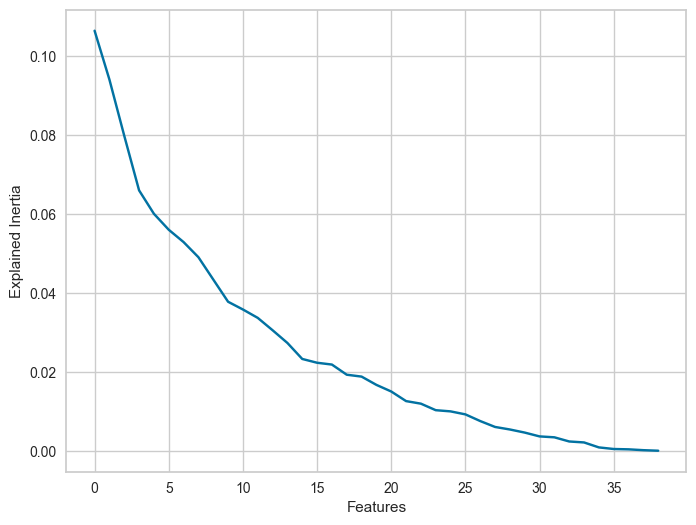

In [228]:
# We plot the mca.explained_intertia_
plt.figure(figsize=(8,6))
plt.plot(mca.explained_inertia_)
plt.xlabel('Features')
plt.ylabel('Explained Inertia')

In [229]:
# We calculate the sum of mca.explained_inertia_ that reaches above the value 0.9
sum(mca.explained_inertia_[0:21]) # We can explain about 90% of our data with 21 features

0.9093504362788326

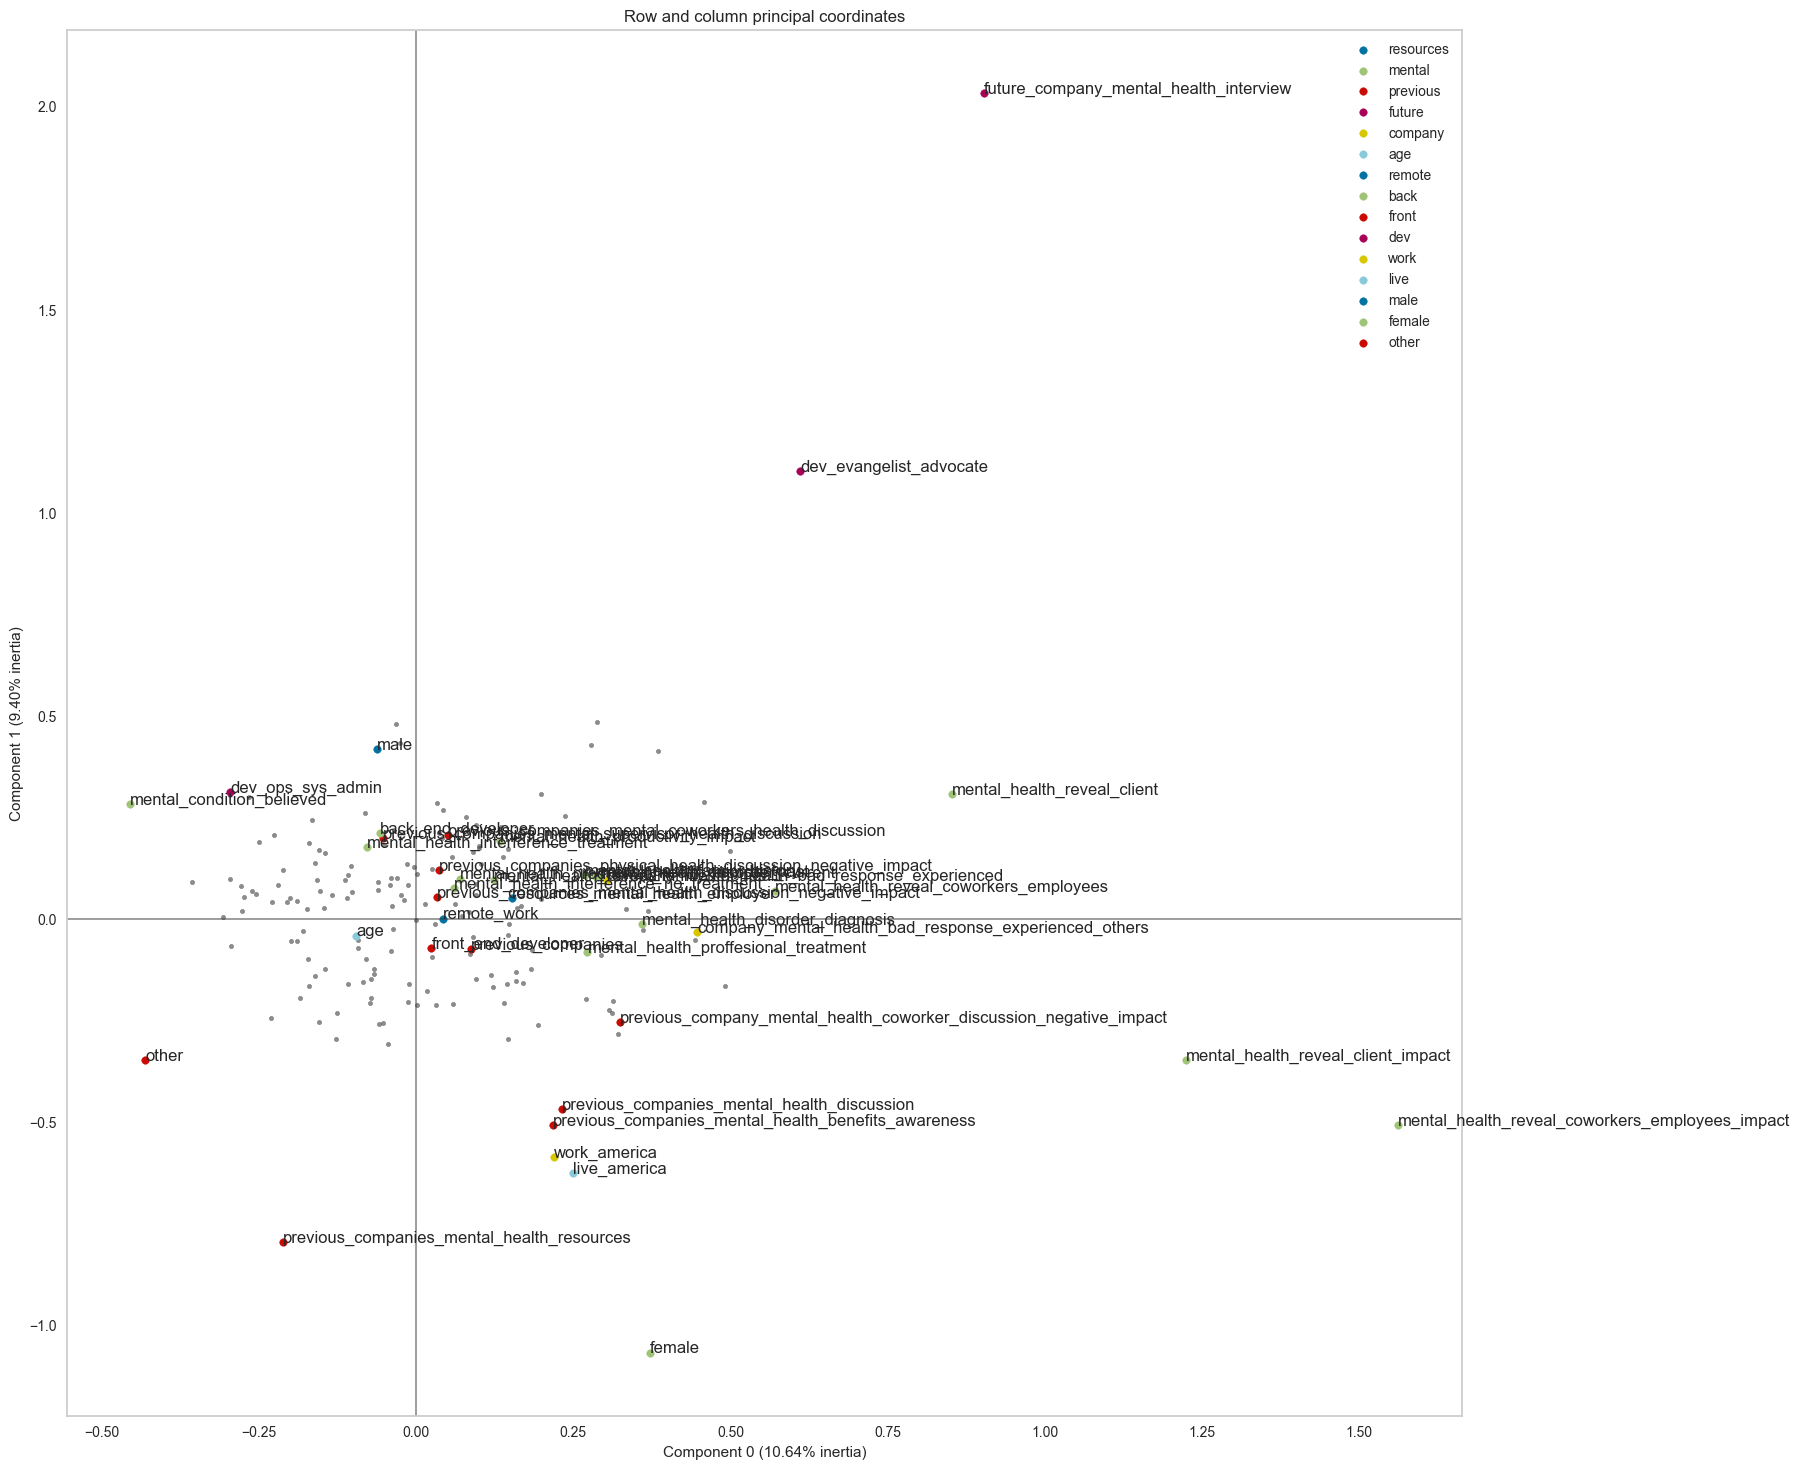

In [230]:
ax = mca.plot_coordinates(X=X,
...     ax=None,
...     figsize=(18, 18),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=True,
...     legend_n_cols=1
... )

In [231]:
# We create a new mca variable from the MCA class with only 20 features
mca = prince.MCA(n_components=21).fit(X)

In [232]:
# We create a new dataframe from the mca variable
df_mca = mca.transform(X)

df_mca.head()

0         1         2         3         4         5         6   \
0  0.090531 -0.045300  0.169828  0.138222  0.099607 -0.103571 -0.102526   
1  0.085987 -0.085597 -0.043104 -0.117317  0.165785 -0.033364  0.111279   
2  0.042050  0.199705 -0.075528 -0.031201  0.019718 -0.055393  0.074432   
3 -0.103826  0.130131 -0.293654 -0.057716 -0.042361  0.074733 -0.233815   
4  0.236587  0.252836 -0.418148  0.022374  0.002527 -0.041813 -0.046441   

         7         8         9   ...        11        12        13        14  \
0 -0.086518  0.053248 -0.001785  ... -0.025633 -0.165770 -0.022801 -0.017845   
1 -0.215706 -0.011756 -0.033971  ...  0.060503  0.212089  0.090713 -0.015302   
2 -0.065293  0.084345 -0.126916  ...  0.203977  0.021506 -0.045980 -0.089789   
3 -0.083979  0.088984 -0.011267  ... -0.191700 -0.037424 -0.076226  0.062105   
4 -0.252091 -0.168031 -0.262669  ...  0.007519  0.018411  0.094907  0.179628   

         15        16        17        18        19        20  
0 -0.161459  0.007426  0.020763  0.034896  0.022862  0.048625  
1 -0.149525  0.148570 -0.168100  0.038164  0.167256 -0.072325  
2  0.020236  0.052732 -0.084866 -0.017958 -0.090037  0.014673  
3 -0.043960 -0.091934  0.013987  0.007248  0.090002  0.028808  
4 -0.192909  0.077417  0.000743  0.020184  0.088804 -0.182572  

[5 rows x 21 columns]

In [233]:
mca.total_inertia_ = sum(mca.eigenvalues_)

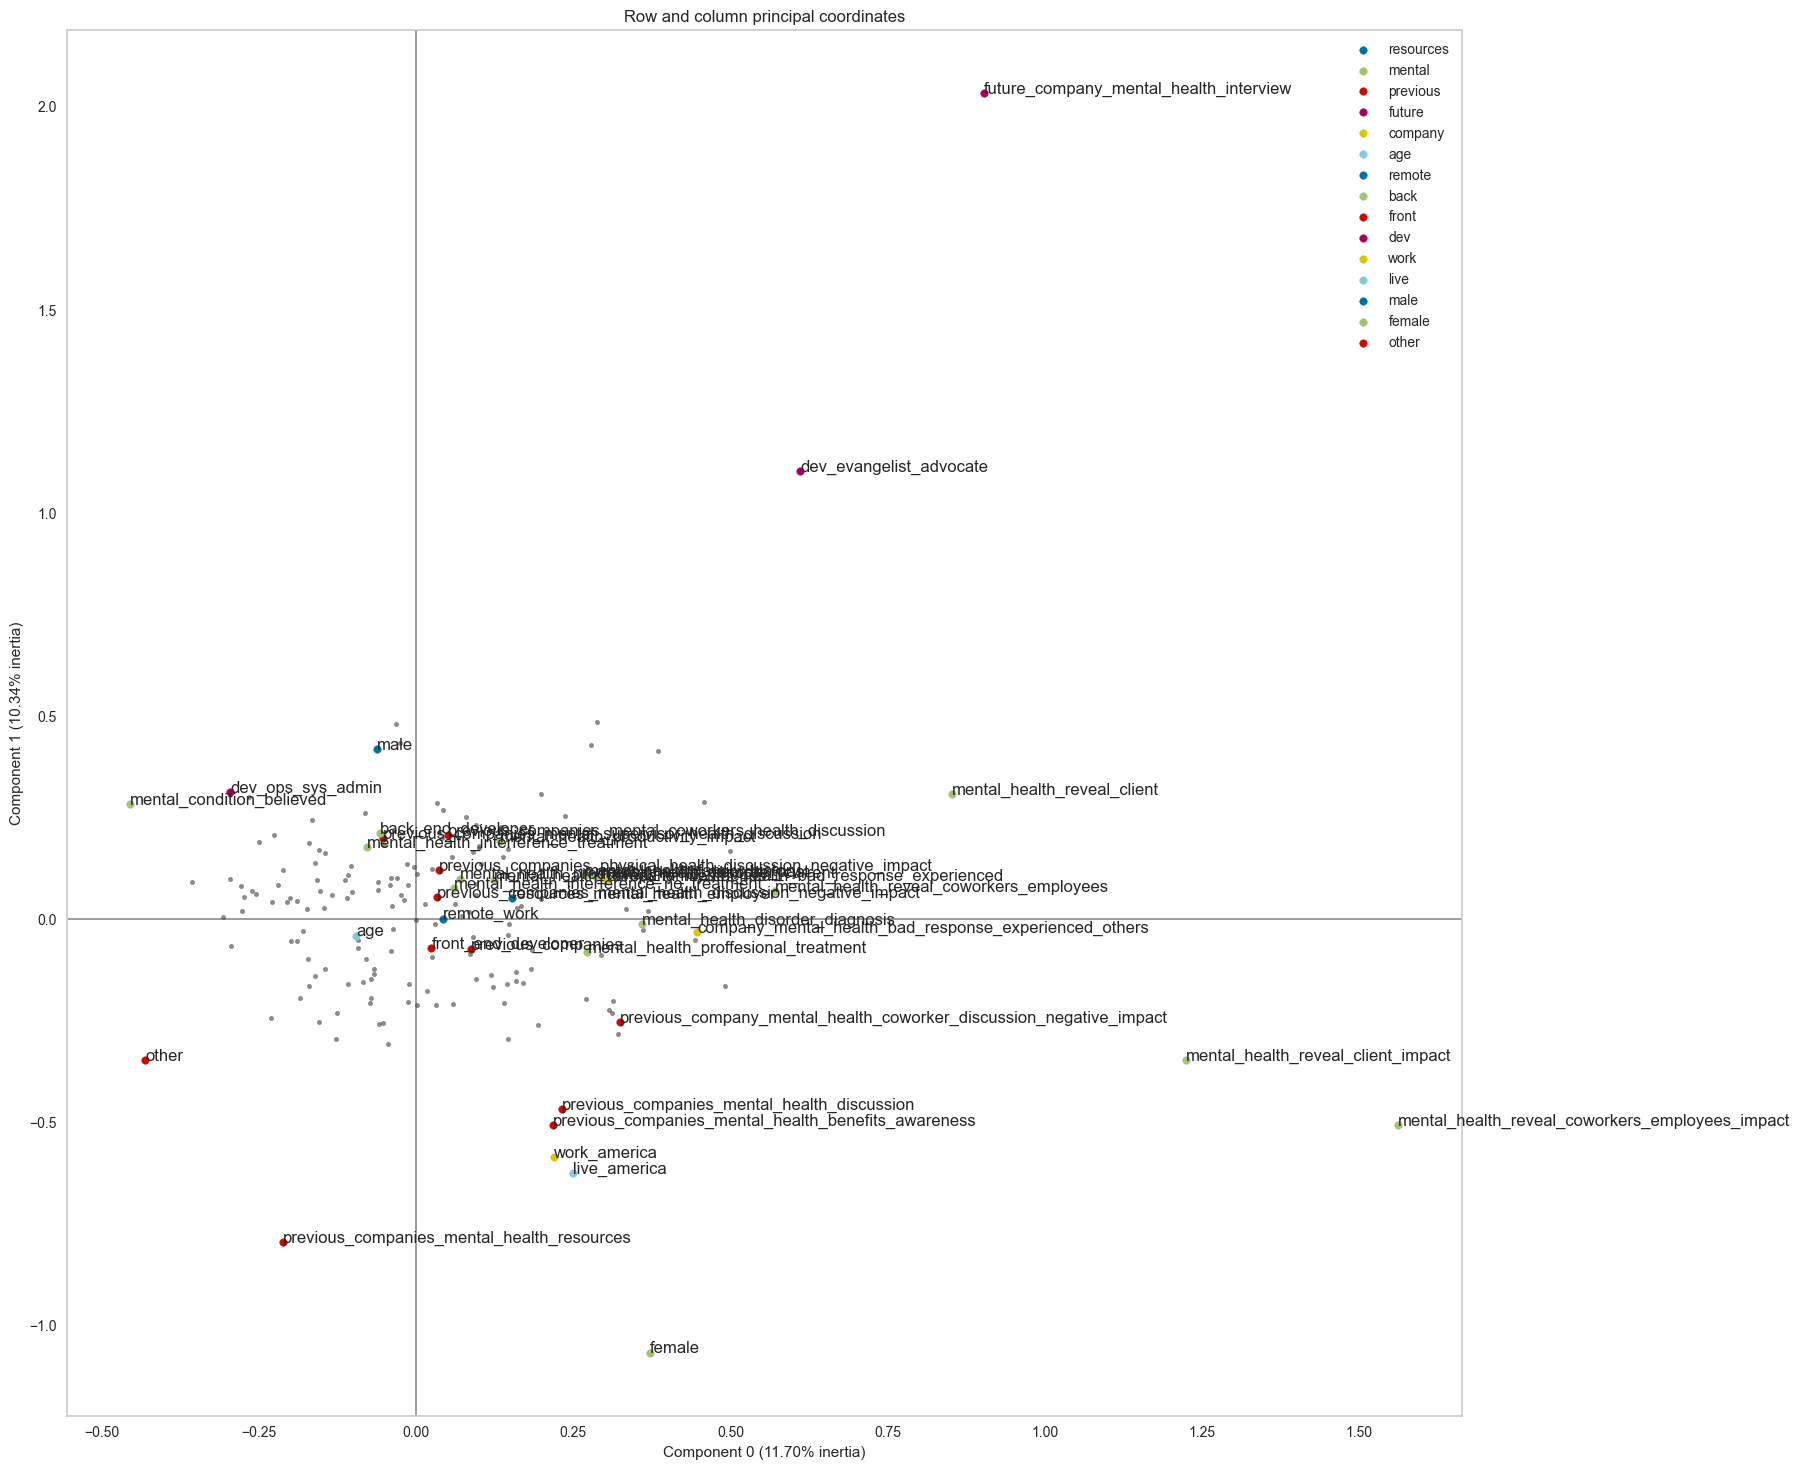

In [234]:
ax = mca.plot_coordinates(X=X,
...     ax=None,
...     figsize=(18, 18),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=True,
...     legend_n_cols=1
... )

In [235]:
# We get all coordinates of ax and store them in a df
coordinates = ax.get_children()[2].get_offsets()

coordinates = pd.DataFrame(coordinates, columns=['x', 'y'])

coordinates.head()

x         y
0  0.090531 -0.045300
1  0.085987 -0.085597
2  0.042050  0.199705
3 -0.103826  0.130131
4  0.236587  0.252836

Text(0, 0.5, 'Second Principal Component')

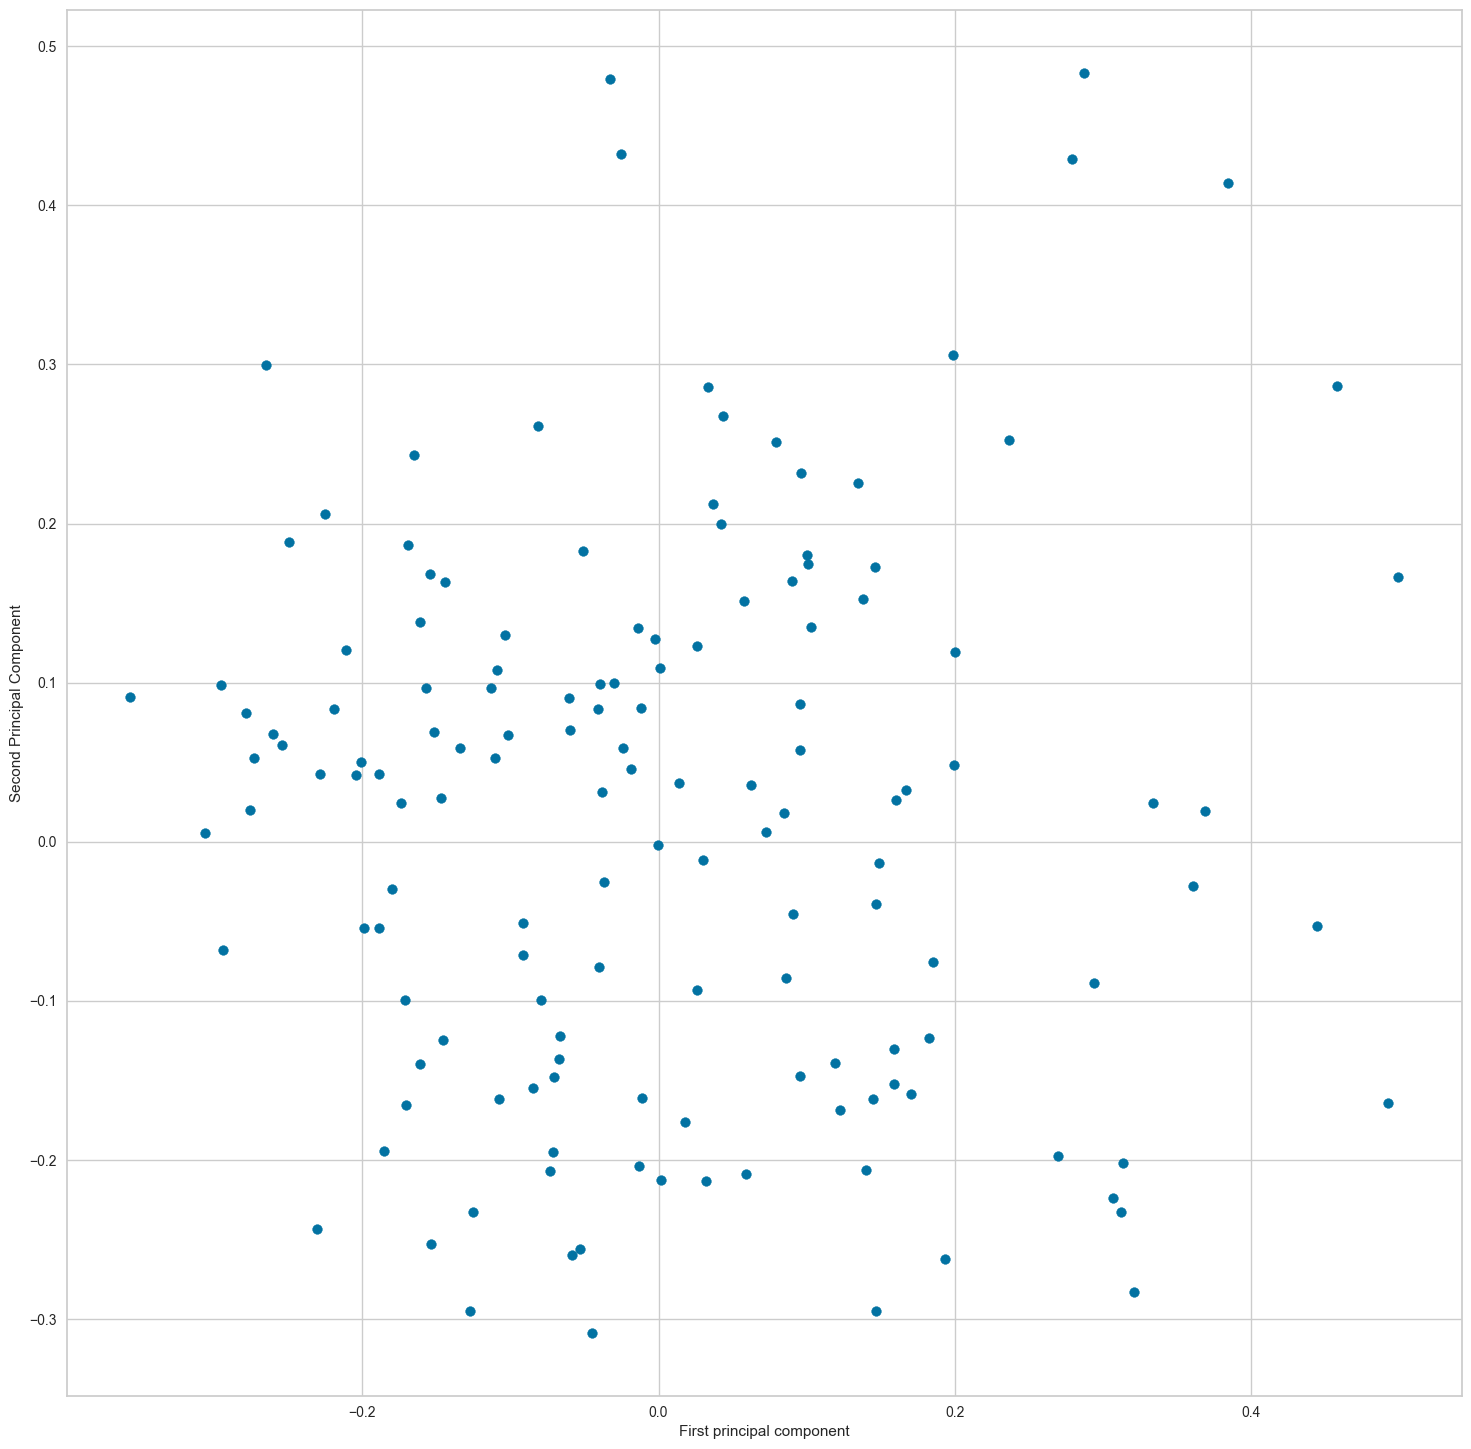

In [236]:
# We plot the coordinates variable on 2 dimensions
plt.figure(figsize=(18,18))
plt.scatter(coordinates['x'],coordinates['y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Clustering

# Cluster Selection

## Elbow Method

In [237]:
# create a k-Means model an Elbow-Visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8), timings=False)

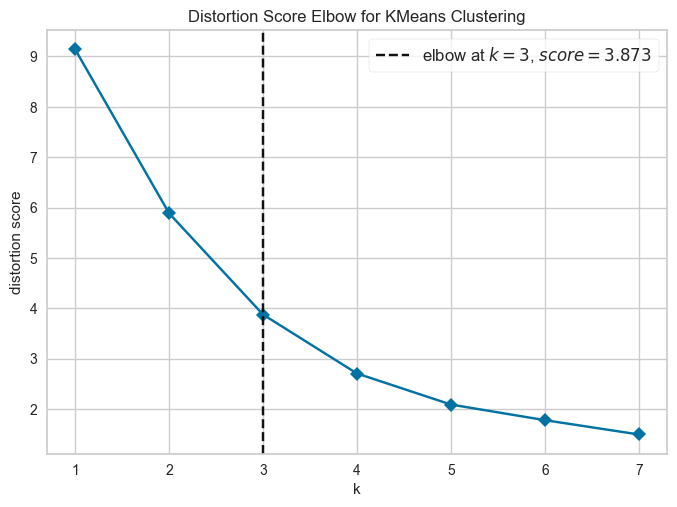

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [238]:
# fit the visualizer and show the plot
visualizer.fit(coordinates)
visualizer.show() 

## Silhouette Score

In [239]:
# We appyl k-Means clustering
model = KMeans(n_clusters=3, random_state=0).fit(coordinates)

In [240]:
# extract labels, i.e. cluster associations
lab=model.labels_

In [241]:
# calculate the overall Silhouette score
S = silhouette_score(coordinates, lab)
print(S)

0.3650495099329412


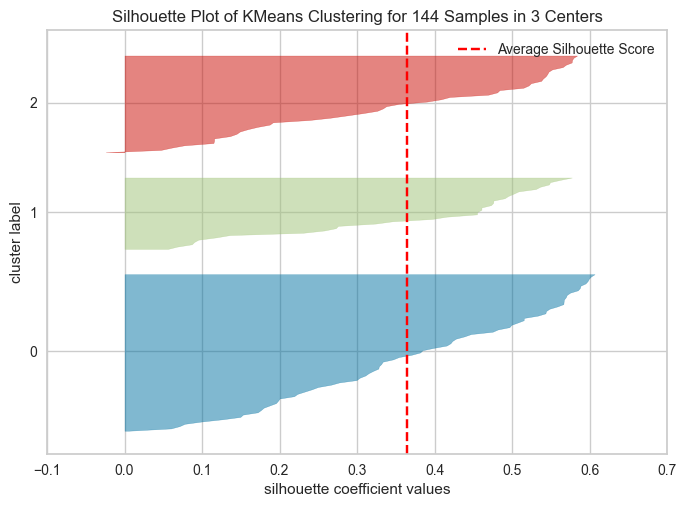

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 144 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [242]:
# generate, fit and show a Silhouette visualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(coordinates) 
visualizer.show()

In [243]:
# We get the "best" results when using 3 clusters and 21 features

## K-Means Clustering

### Cluster Visualization

In [244]:
# clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(coordinates)

In [245]:
print(kmeans.inertia_)

3.872487160517962


In [246]:
# extract centroids of clusters into a dataframe
centers = kmeans.cluster_centers_
centroids = pd.DataFrame(centers,columns=['xpt','ypt'])

In [247]:
# extract cluster labels
lab = kmeans.labels_

In [248]:
lab

array([2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0,
       0, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 0])

In [249]:
coordinates['lab'] = lab

In [250]:
coordinates

x         y  lab
0    0.090531 -0.045300    2
1    0.085987 -0.085597    2
2    0.042050  0.199705    1
3   -0.103826  0.130131    0
4    0.236587  0.252836    1
..        ...       ...  ...
139 -0.091371 -0.051324    0
140  0.444094 -0.052861    2
141  0.119071 -0.139354    2
142  0.079574  0.251175    1
143 -0.225110  0.205970    0

[144 rows x 3 columns]

In [251]:
radii = [cdist(coordinates[lab == i].iloc[:,[0,1]], [center]).max() for i, center in enumerate(centers)]

In [252]:
print(radii)

[0.31726543189050493, 0.3866779858561279, 0.33555383756584445]


Text(0, 0.5, 'Second Principal Component')

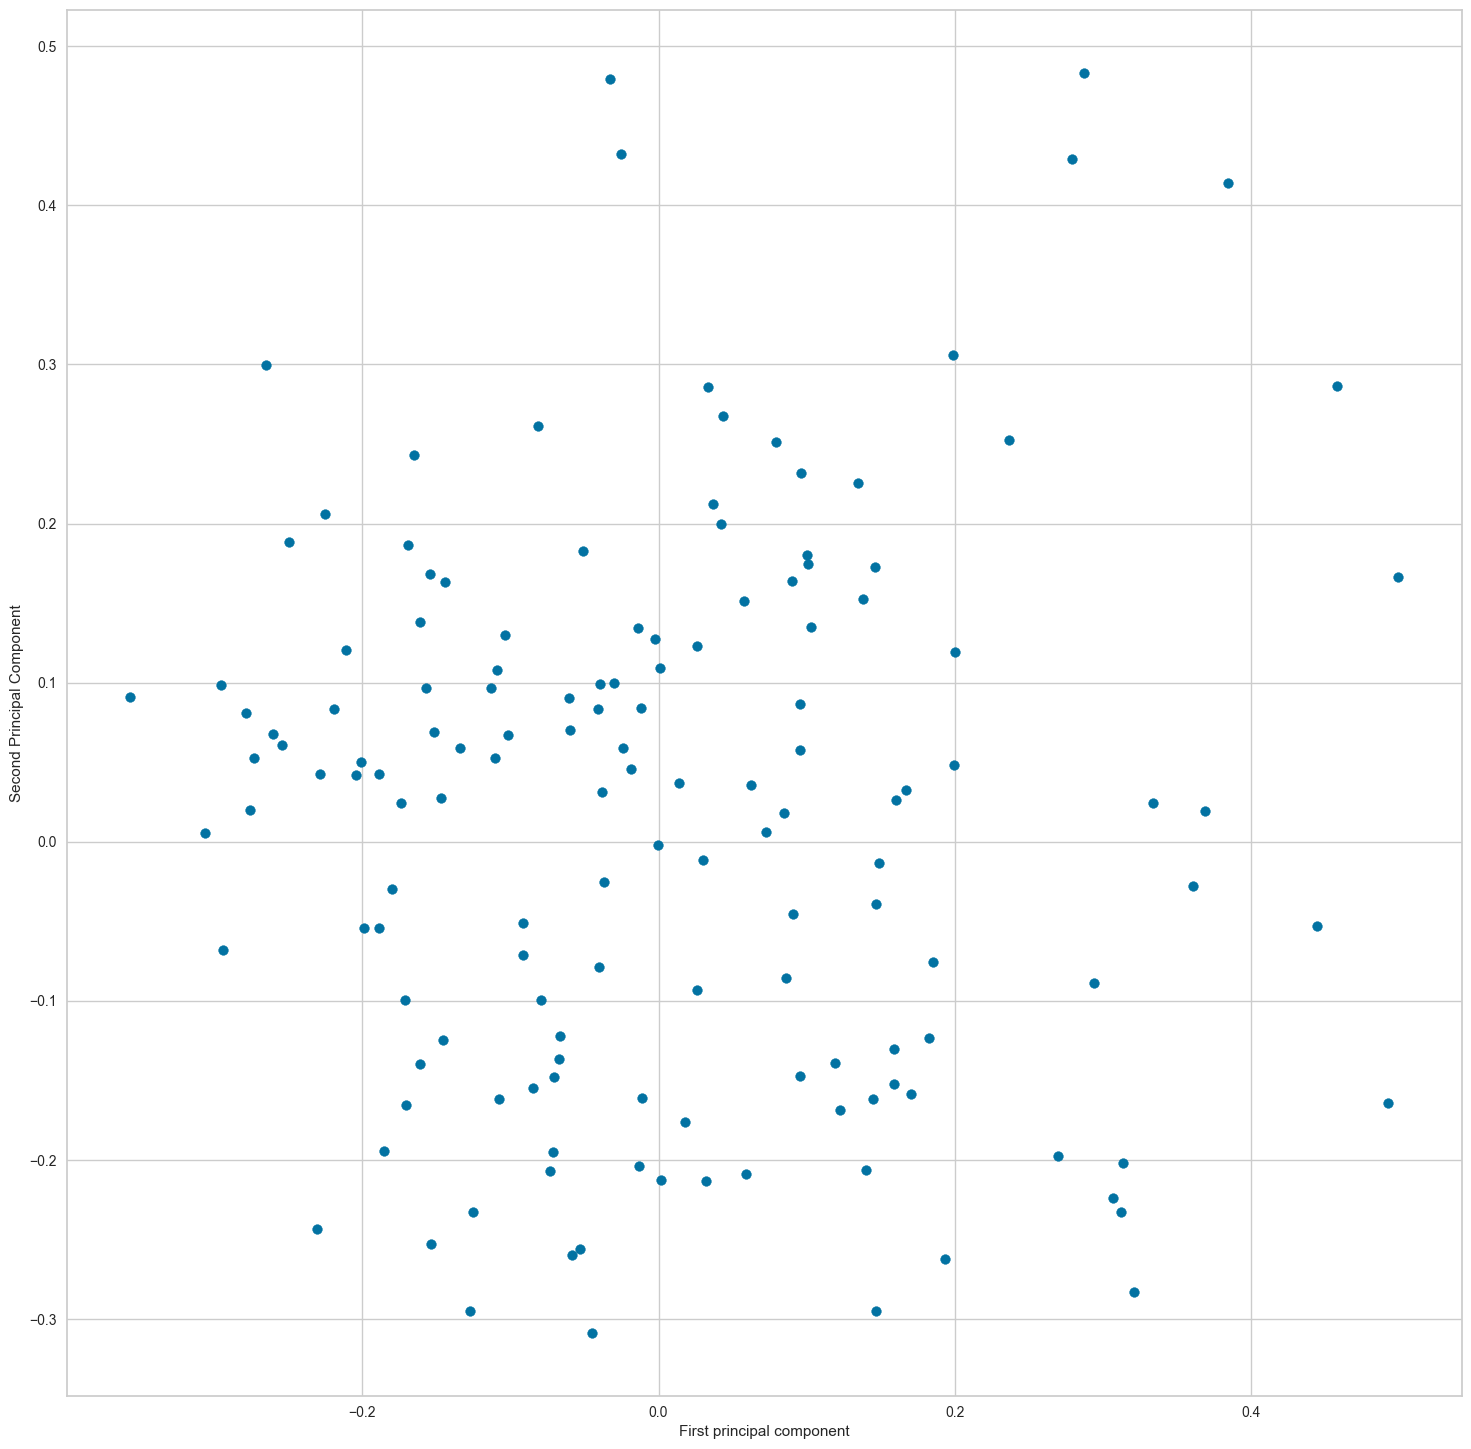

In [253]:
# We plot the coordinates variable on 2 dimensions
plt.figure(figsize=(18,18))
plt.scatter(coordinates['x'],coordinates['y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

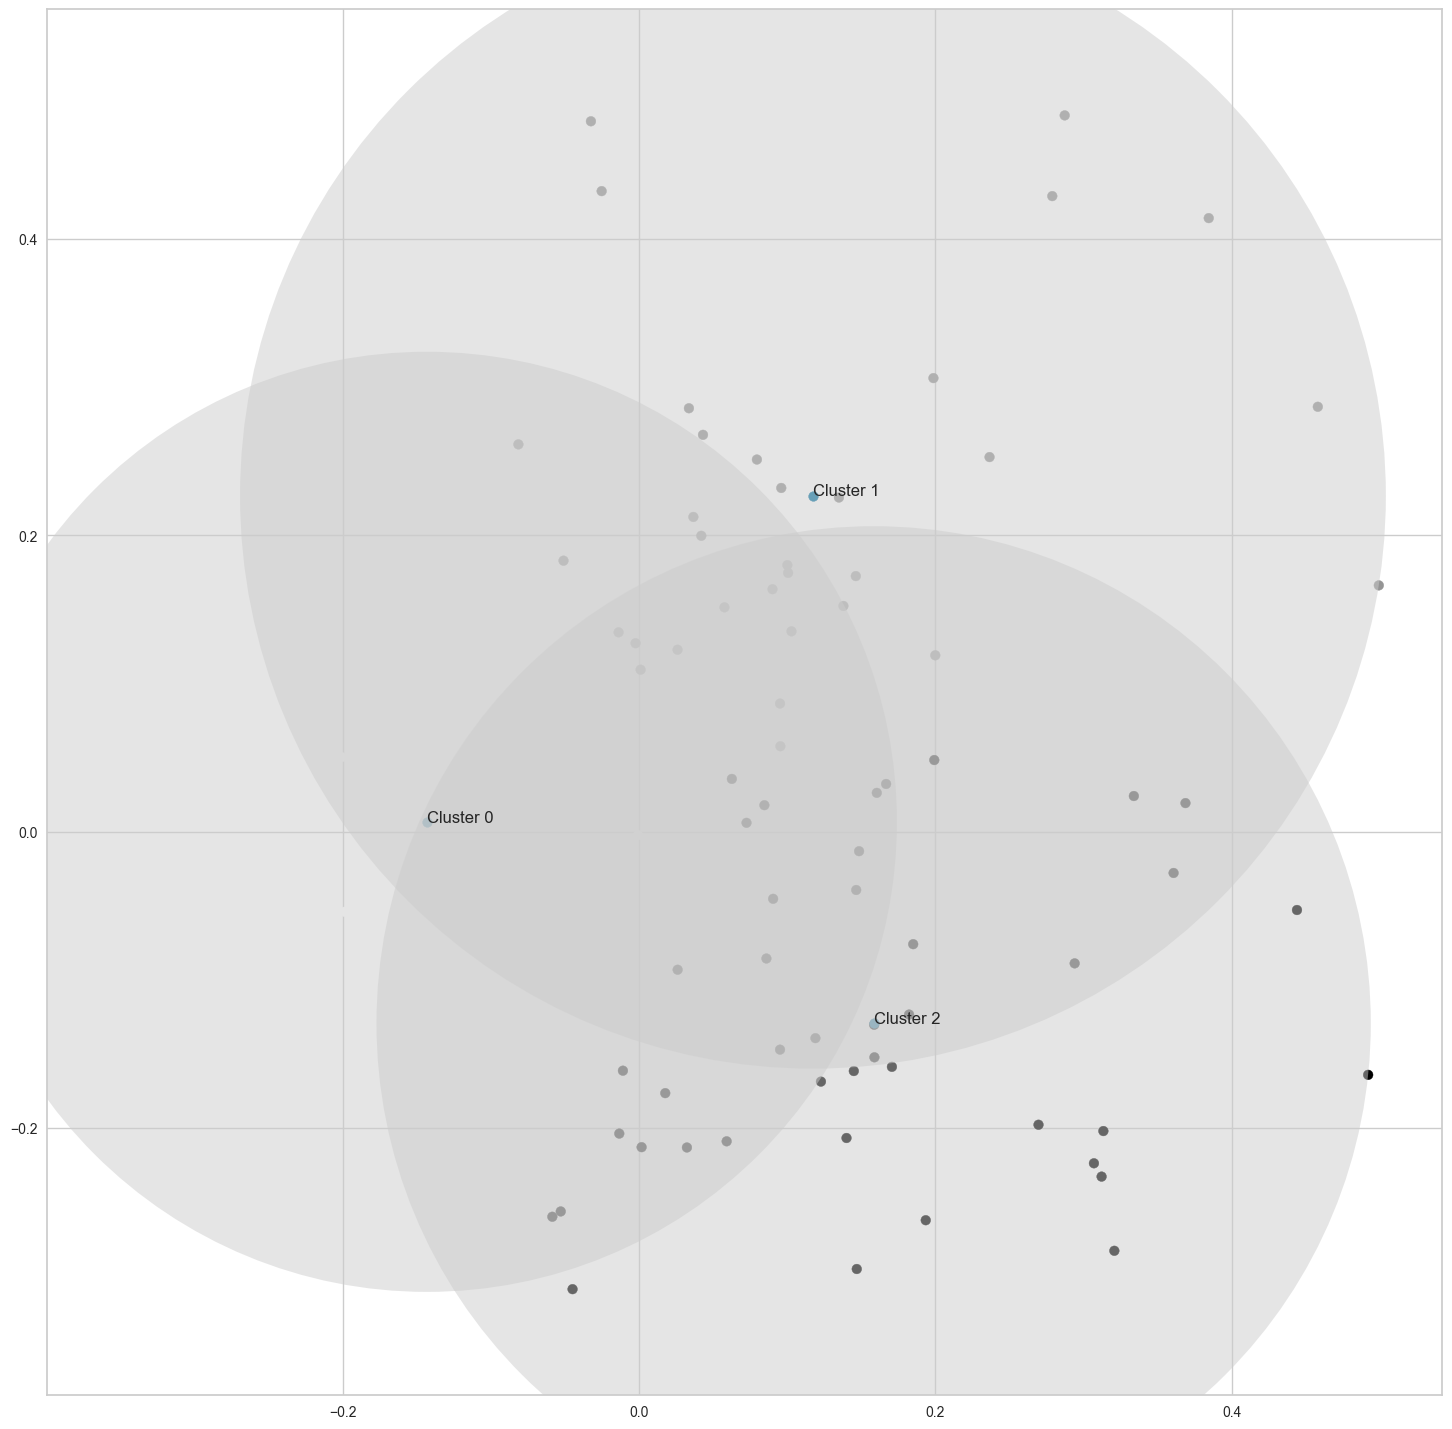

In [254]:
# create a figure and axes
fig, ax = plt.subplots(figsize=(18,18))
# add data points
ax.scatter(x=coordinates['x'], y=coordinates['y'], c=coordinates['lab'])
# add cluster centroids
ax.scatter(centroids['xpt'], centroids['ypt'])
# set the axis scale on both axes equally
ax.axis('equal')
# draw a circle around each cluster centroid
for c, r in zip(centers, radii):
 ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', \
 lw=3, alpha=0.5)) 
# we assign a name to the cluster based on their index
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
# We plot the clusters with their name
for i, txt in enumerate(labels):
    ax.annotate(txt, (centroids['xpt'][i], centroids['ypt'][i]))
# show the plot 
plt.show()

### Number of Data points in Cluster

Text(0, 0.5, 'Number of rows')

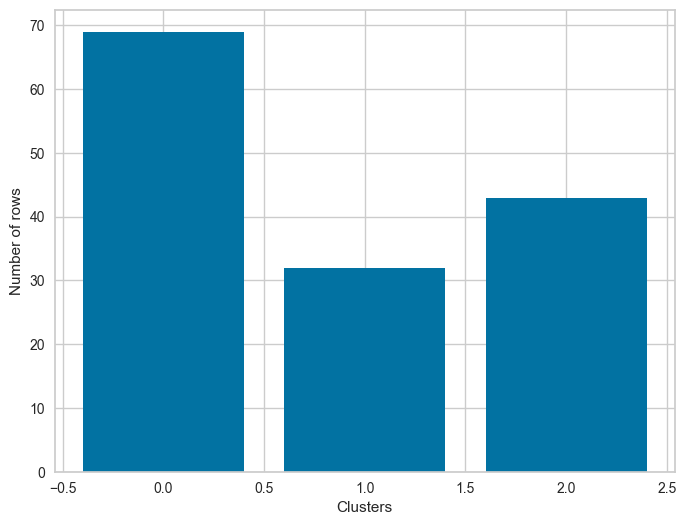

In [255]:
# We create a bar graph for the df where the Y axis is the number of rows belonging to a cluster and the X axis are the clusters
plt.figure(figsize=(8,6))
plt.bar(coordinates['lab'].value_counts().index, coordinates['lab'].value_counts())
plt.xlabel('Clusters')
plt.ylabel('Number of rows')

### Feature Importance

In [256]:
X = df_self_employed_condition.copy()
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [257]:
### Cluster Analysis
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)


clusters=pd.DataFrame(X,columns=df_self_employed_condition.columns)
clusters['label']=lab
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()